# **Churn Prediction: TELCO Customer Classification**

**Ec. Octavio Berruti**

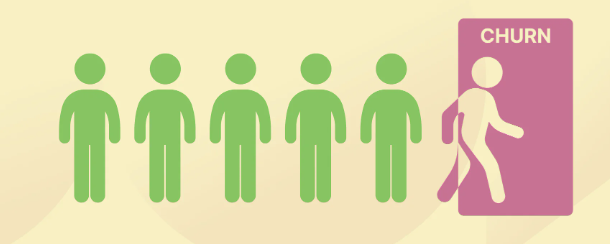

## **Telco Customer Churn**

El conjunto de datos utilizado en este artículo está disponible en Kaggle  y contiene diecinueve columnas (variables independientes) que indican las características de los clientes de una corporación de telecomunicaciones ficticia. La columna de Churn (variable de respuesta) indica si el cliente se fue en el último mes o no.

La clase "No" incluye a los clientes que no abandonaron la empresa el mes pasado, mientras que la clase "Sí" contiene a los clientes que decidieron terminar sus relaciones con la empresa. El objetivo del análisis es obtener la relación entre las características del cliente y la rotación.

Atributos del Conjunto de Datos:

* **customerID
gender**: ID del cliente
* **customerID
gender**: Si el cliente es hombre o mujer
* **SeniorCitizen
Partner**: Si el cliente es un adulto mayor o no (1, 0)
* **SeniorCitizen
Partner**: Si el cliente tiene pareja o no (Sí, No)
* **Dependents**: Si el cliente tiene dependientes o no (Sí, No)
* **tenure**: Número de meses que el cliente ha estado con la empresa
* **PhoneService**: Si el cliente tiene servicio telefónico o no (Sí, No)
* **MultipleLines**: Si el cliente tiene múltiples líneas o no (Sí, No, Sin servicio telefónico)
* **InternetService**: Proveedor de servicios de internet del cliente (DSL, Fibra óptica, No)
* **OnlineSecurity**: Si el cliente tiene seguridad en línea o no (Sí, No, Sin servicio de internet)
* **OnlineBackup**: Si el cliente tiene respaldo en línea o no (Sí, No, Sin servicio de internet)
* **DeviceProtection**: Si el cliente tiene protección de dispositivo o no (Sí, No, Sin servicio de internet)
* **TechSupport**: Si el cliente tiene soporte técnico o no (Sí, No, Sin servicio de internet)
* **StreamingTV**: Si el cliente tiene TV en streaming o no (Sí, No, Sin servicio de internet)
* **StreamingMovies**: Si el cliente tiene películas en streaming o no (Sí, No, Sin servicio de internet)
* **Contract**: El plazo del contrato del cliente (Mensual, Un año, Dos años)
* **PaperlessBilling**: Si el cliente tiene facturación sin papel o no (Sí, No)
* **PaymentMethod**: El método de pago del cliente (Cheque electrónico, Cheque enviado por correo, Transferencia bancaria (automática), Tarjeta de crédito (automática))
* **MonthlyCharges**: La cantidad cobrada al cliente mensualmente
* **TotalCharges**: La cantidad total cobrada al cliente
* **Churn**: Si el cliente se fue o no (Sí o No)

**Importamos las librerias necesarias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Librerias para el modelo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

#Librerias para el "sampling"
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

In [3]:
#Cargamos los datos
data = pd.read_csv(r'C:\Users\octav\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()


#Veemos las primeras 5 filas
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

**Tamaño del conjunto de datos:**

In [4]:
data.shape

(7043, 21)

**Vemos el nombre de sus columnas:**

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Vemos la informacion sobre valores "null" y tipo de dato:**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Analizamos los valores del conjunto de datos**

In [7]:
#Realizamos una iteracion sobre las columnas para ver la cantidad de valores unicos.

for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

customerID: 7043 distinct values
gender: 2 distinct values
SeniorCitizen: 2 distinct values
Partner: 2 distinct values
Dependents: 2 distinct values
tenure: 73 distinct values
PhoneService: 2 distinct values
MultipleLines: 3 distinct values
InternetService: 3 distinct values
OnlineSecurity: 3 distinct values
OnlineBackup: 3 distinct values
DeviceProtection: 3 distinct values
TechSupport: 3 distinct values
StreamingTV: 3 distinct values
StreamingMovies: 3 distinct values
Contract: 3 distinct values
PaperlessBilling: 2 distinct values
PaymentMethod: 4 distinct values
MonthlyCharges: 1585 distinct values
TotalCharges: 6531 distinct values
Churn: 2 distinct values


**Calidad de los datos:**

In [8]:
#Manejamos los valores duplicados

duplicate_rows_data = data[data.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_data.shape)

Number of duplicated rows:  (0, 21)


**Veemos los estadisticos de los datos:**

In [9]:
data.describe().T

count  mean   std   min   25%   50%   75%    max
SeniorCitizen  7043.00  0.16  0.37  0.00  0.00  0.00  0.00   1.00
tenure         7043.00 32.37 24.56  0.00  9.00 29.00 55.00  72.00
MonthlyCharges 7043.00 64.76 30.09 18.25 35.50 70.35 89.85 118.75


* El conjunto de datos tiene demasiadas columnas con datos de texto y probablemente son columnas categóricas. 
* **"Total Charges"** es una característica con valores numéricos pero se almacenan en el tipo de dato de cadena. Primero, convertiremos esta columna a tipo flotante.

**Transformaciones de columnas:**

In [10]:
#Convertimos las columnas del data frame de "string" a "float" usando el siguiente codigo:

l1 = [len(i.split()) for i in data['TotalCharges']]
list_2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index positions with empty spaces : ', *list_2)

for i in list_2:
    data.loc[i, 'TotalCharges'] = data.loc[(i-1),'TotalCharges']


data['TotalCharges'] = data['TotalCharges'].astype(float)
data.drop(columns= ['customerID'], inplace=True)

Index positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


* Mientras se convertía TotalCharges a tipo float, ocurrió un error con el mensaje que describe que no se pudo convertir una cadena a tipo float.

* Este mensaje apareció debido a las cadenas vacías presentes en las posiciones de índice mostradas arriba de la columna TotalCharges. Como estos elementos estaban definidos como cadenas, no aparecían como valores nulos y, por lo tanto, el mapa de calor para valores faltantes no mostraba nada. Por ejemplo: a = ' '

* Por lo tanto, dividimos los elementos individuales de TotalCharges y almacenamos los valores de índice de los elementos cuya longitud de cadena dividida no es igual a 1.

* Esto creó una lista con números de índice de las cadenas vacías que se llenan con su valor precedente y, finalmente, toda la columna se convierte en float usando la función astype.

* También eliminamos la columna customerID



**Dividamos las características en características numéricas y categóricas.**

También ejecutaremos la transformación de codificación de etiquetas para características categóricas.

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features:
    df[i] = le.fit_transform(df[i])
    print(i, ' : ',df[i].unique(), ' = ', le.inverse_transform(df[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


Estamos creando una copia profunda del conjunto de datos original y codificando las variables de texto.
Las modificaciones en el conjunto de datos original no se destacarán en esta copia profunda.

Por lo tanto, usamos esta copia profunda del conjunto de datos que tiene todas las características convertidas en valores numéricos para fines de visualización y modelado.
Ahora, nuevamente obtenemos las estadísticas descriptivas de los datos.

**Veemos las estadistica de los datos**

In [12]:
df.describe()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
count 7043.00        7043.00  7043.00     7043.00 7043.00       7043.00   
mean     0.50           0.16     0.48        0.30   32.37          0.90   
std      0.50           0.37     0.50        0.46   24.56          0.30   
min      0.00           0.00     0.00        0.00    0.00          0.00   
25%      0.00           0.00     0.00        0.00    9.00          1.00   
50%      1.00           0.00     0.00        0.00   29.00          1.00   
75%      1.00           0.00     1.00        1.00   55.00          1.00   
max      1.00           1.00     1.00        1.00   72.00          1.00   

       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
count        7043.00          7043.00         7043.00       7043.00   
mean            0.94             0.87            0.79          0.91   
std             0.95             0.74            0.86          0.88   
min             0.00             0.00            0.00          0.00   
25%             0.00             0.00            0.00          0.00   
50%             1.00             1.00            1.00          1.00   
75%             2.00             1.00            2.00          2.00   
max             2.00             2.00            2.00          2.00   

       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
count           7043.00      7043.00      7043.00          7043.00   7043.00   
mean               0.90         0.80         0.99             0.99      0.69   
std                0.88         0.86         0.89             0.89      0.83   
min                0.00         0.00         0.00             0.00      0.00   
25%                0.00         0.00         0.00             0.00      0.00   
50%                1.00         1.00         1.00             1.00      0.00   
75%                2.00         2.00         2.00             2.00      1.00   
max                2.00         2.00         2.00             2.00      2.00   

       PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges   Churn  
count           7043.00        7043.00         7043.00       7043.00 7043.00  
mean               0.59           1.57           64.76       2285.17    0.27  
std                0.49           1.07           30.09       2267.54    0.44  
min                0.00           0.00           18.25         18.80    0.00  
25%                0.00           1.00           35.50        401.68    0.00  
50%                1.00           2.00           70.35       1398.25    0.00  
75%                1.00           2.00           89.85       3803.05    1.00  
max                1.00           3.00          118.75       8684.80    1.00

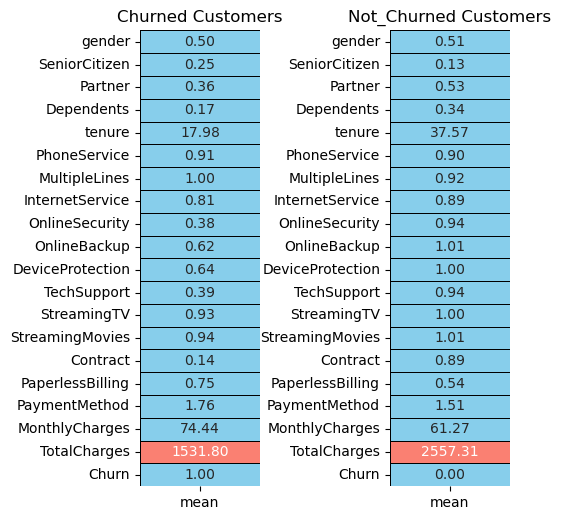

In [13]:
#Realizamos una gráfica para ver los promedios de las variables segun si abandono o no el servicio

colors = ['skyblue', 'salmon']

churn = df[df['Churn'] == 1].describe().T
not_churn = df[df['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)


 **Análisis de los resultados:**

**Promedios de todas las características para clientes que se han dado de baja y clientes que no se han dado de baja.**

**1.** Claramente, los clientes que se dieron de baja tenían una baja tasa media de permanencia de 17.98 meses en comparación con aquellos que continuaron con un período de permanencia promedio de 37.57 meses.

**2.** Los valores medios de **OnlineSecurity, OnlineBackup, DeviceProtection y TechSupport** son más altos para los clientes que no se dieron de baja que para los clientes que se dieron de baja. **¡Esto puede servir como un buen indicador o punto en el que enfocarse!**

**3.** El **valor del contrato** de los clientes que se dieron de baja es mucho más bajo que el de los clientes que no se dieron de baja.

**4.** El **promedio de los cargos mensuales de los clientes que se dieron de baja, 74.44, es mayor que el de los clientes que no se dieron de baja, 61.27.**

**5.** Los **TotalCharges de los clientes que no se dieron de baja, 2557.31, son más altos que los de los clientes que se dieron de baja, 1531.80.**

**6.** A partir de estos valores medios, podemos decir que algunas de las características muestran una diferencia clara que puede ayudar a enfocarse más en los clientes que se dieron de baja para asegurarse de que retengan los servicios.

**7.** El conjunto de datos tiene demasiadas características categóricas, por lo que los valores medios de las características están cerca de 0.



**Ahora pasaremos a la sección de EDA y analizaremos las características con más detalle.**

# **3. Análisis exploratorio de datos (EDA)**

**3.1 Dividimos las variables entre numéricas y categóricas** 

In [14]:
columns = list(df.columns)

categorical_features = []
numerical_features = []

for feature in columns:
    if data[feature].nunique() > 6:
        numerical_features.append(feature)
    else:
        categorical_features.append(feature)
        
print('Categorical Features:')
print(', '.join(categorical_features))
print('Numerical Features:')
print(', '.join(numerical_features))

Categorical Features:
gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn
Numerical Features:
tenure, MonthlyCharges, TotalCharges


**Aquí, las características categóricas se definen si el atributo tiene menos de 6 elementos únicos, de lo contrario, es una característica numérica. El enfoque típico para esta división de características también puede basarse en los tipos de datos de los elementos del atributo respectivo.**

*Por ejemplo: tipo de datos = entero -> atributo = característica numérica; tipo de datos = cadena -> atributo = característica categórica.*

**Para este conjunto de datos, como el número de características es menor, también podemos verificar manualmente el conjunto de datos.**

**3.2 Visualización de la variable objetivo.**

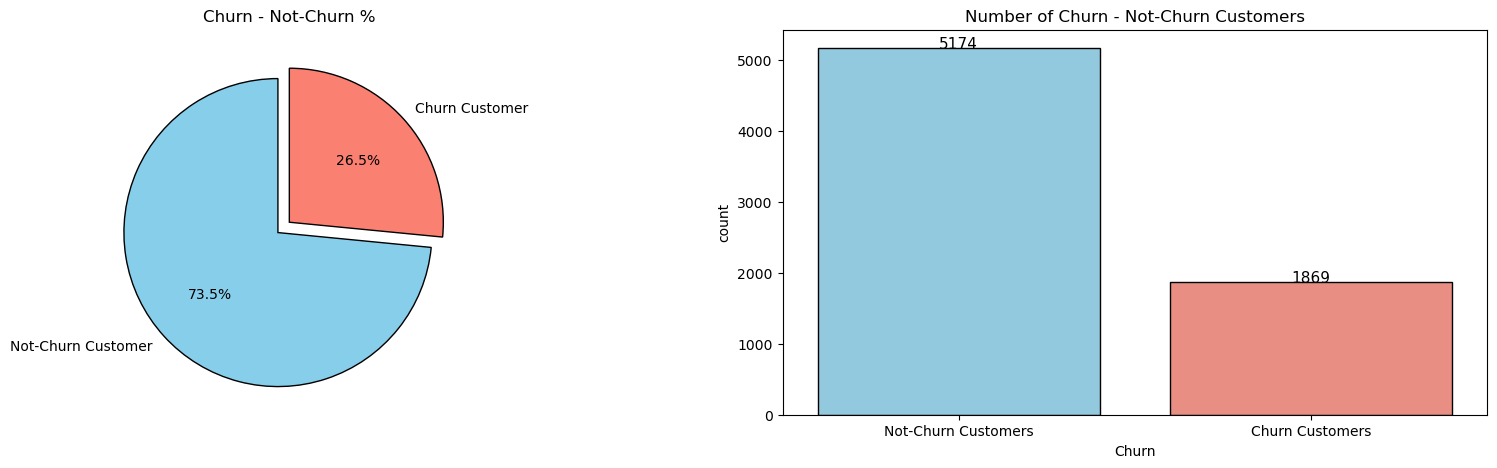

In [15]:
cant = list(df['Churn'].value_counts())
circle = [cant[0] / sum(cant) * 100,cant[1] / sum(cant) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.subplot(1, 2, 2)
ax = sns.countplot(x='Churn', data=df, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['Not-Churn Customers', 'Churn Customers'])

plt.title('Number of Churn - Not-Churn Customers')
plt.show()


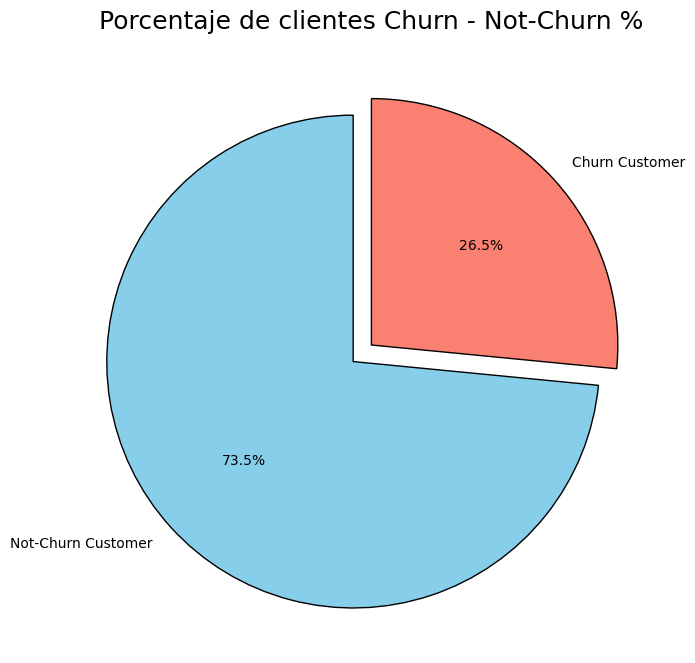

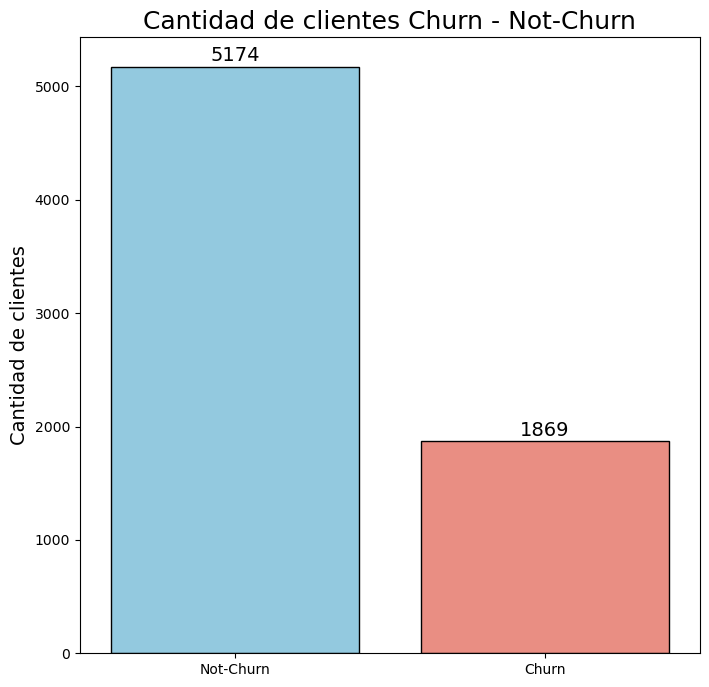

In [16]:
# Datos simulados para los gráficos
cant = [5174, 1869]  # Not-Churn y Churn
circle = [cant[0] / sum(cant) * 100, cant[1] / sum(cant) * 100]
colors = ['skyblue', 'salmon']

# Gráfico 1: Pie Chart - Distribución porcentual de Churn
plt.figure(figsize=(8, 8))
plt.pie(circle, labels=['Not-Churn Customer', 'Churn Customer'], autopct='%1.1f%%',
        startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Porcentaje de clientes Churn - Not-Churn %', fontsize=18)
plt.show()

# Gráfico 2: Countplot - Conteo de Churn vs No-Churn
plt.figure(figsize=(8, 8))
ax = sns.barplot(x=['Not-Churn', 'Churn'], y=cant, palette=colors, edgecolor='black')
for i, rect in enumerate(ax.patches):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 50, cant[i],
            horizontalalignment='center', fontsize=14)
plt.title('Cantidad de clientes Churn - Not-Churn', fontsize=18)
plt.ylabel('Cantidad de clientes', fontsize=14)
plt.show()

**El conjunto de datos está desequilibrado en una proporción cercana a 3:1 para clientes No-Churn : Churn.**

**Debido a esto, las predicciones estarán sesgadas hacia los clientes No-Churn.**

**¡Las visualizaciones también mostrarán este sesgo!**

**3.3 Variables Categoricas vs Variable Objetivo (Churn):**

In [17]:
categorical_features.remove('Churn')

****Vamos a eliminar la variable "Churn", la variable objetivo de la lista de características categóricas con fines de visualización.****

A su vez, en vistas de mejorar la visualizacion, continuamos agrupando las variables categoricas en 3 grupos.

In [18]:
list_1 = ['gender','SeniorCitizen','Partner','Dependents'] # Informacion del cliente

list_2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
          'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Servicios del usuario

list_3 = ['Contract','PaperlessBilling','PaymentMethod'] # Informacion del metodo de pago

**Grupo 1: Informacion del cliente**

gender | SeniorCitizen | Partner | Dependents |

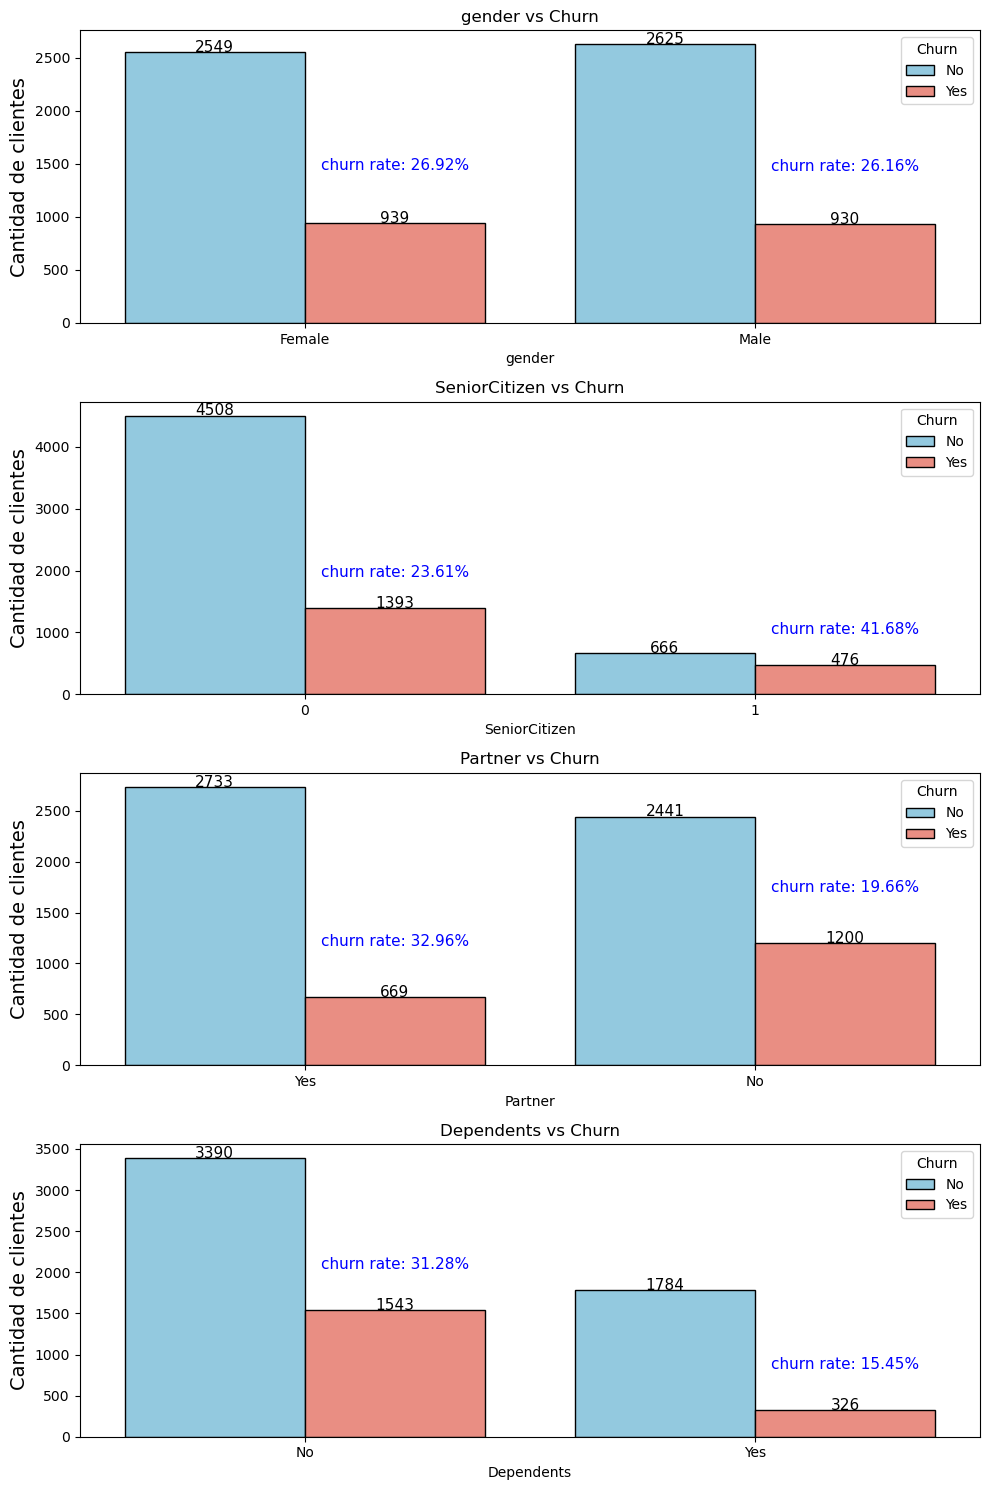

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))

for idx, feature in enumerate(list_1):
    ax = axes[idx]
    sns.countplot(x=feature, data=data, hue="Churn", palette=colors, edgecolor='black', ax=ax)
    
    # Agrupamos para obtener el conteo de "Churn" para cada subcategoría
    grouped = data.groupby(feature)['Churn'].value_counts().unstack(fill_value=0)
    churn_label = "Yes" if "Yes" in grouped.columns else grouped.columns[1]
    
    # Obtenemos las etiquetas de la leyenda para identificar cada grupo (hue)
    handles, legend_labels = ax.get_legend_handles_labels()
    
    for container_index, container in enumerate(ax.containers):
        hue_label = legend_labels[container_index]
        for j, rect in enumerate(container):
            count = int(rect.get_height())
            x_pos = rect.get_x() + rect.get_width() / 2
            y_pos = rect.get_height() + 2
            # Anotamos el conteo de clientes
            ax.text(x_pos, y_pos, f'{count}', horizontalalignment='center', fontsize=11)
            # Si la barra corresponde a "Yes", calculamos y anotamos la tasa de churn
            if hue_label == "Yes":
                cat = grouped.index[j]
                total = grouped.loc[cat].sum()
                churn_count = grouped.loc[cat][churn_label]
                churn_rate = churn_count / total if total > 0 else 0
                # Se aumenta el offset a +20 y se añade el texto "tasa de churn: "
                ax.text(x_pos, y_pos + 500, f'churn rate: {churn_rate:.2%}', horizontalalignment='center', fontsize=11, color='blue')
    
    ax.set_ylabel('Cantidad de clientes', fontsize=14)
    ax.set_title(f'{feature} vs Churn')

plt.tight_layout()
plt.show()

**Análisis de los resultados:**

**1.** La deserción de clientes para clientes masculinos y femeninos es muy similar entre sí. 

**2.** Del mismo modo, el número de clientes SeniorCitizen es bastante bajo. De ese total, podemos observar que cerca del 40% de los clientes SeniorCitizen se dan de baja. Esto representa un total de 476 clientes de un total de 1142 clientes Senior Citizen. 

**3.** Los clientes que viven con una pareja tienen menos probabilidad de darse de baja en comparación con aquellos que no viven con una pareja. 

**4.** De manera similar, la deserción es alta para los clientes que no tienen dependientes con ellos.

**Grupo 2: Servicios del Usuario**

PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

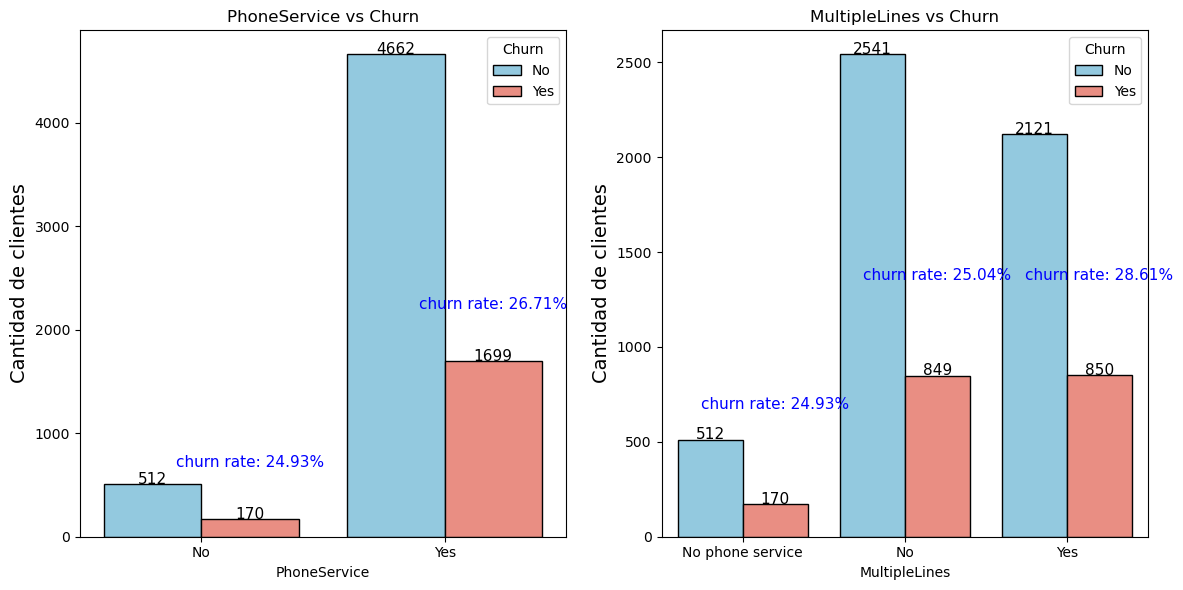

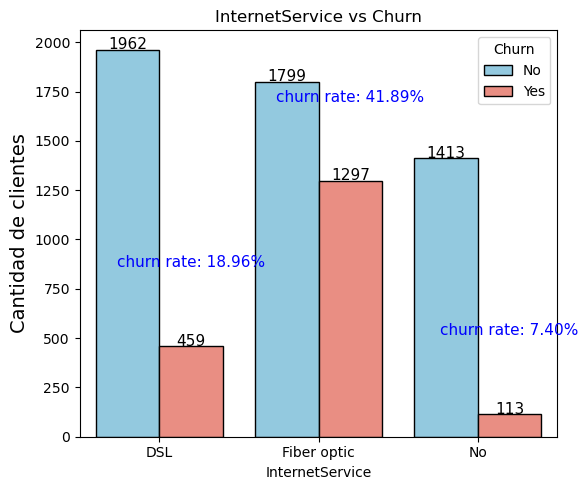

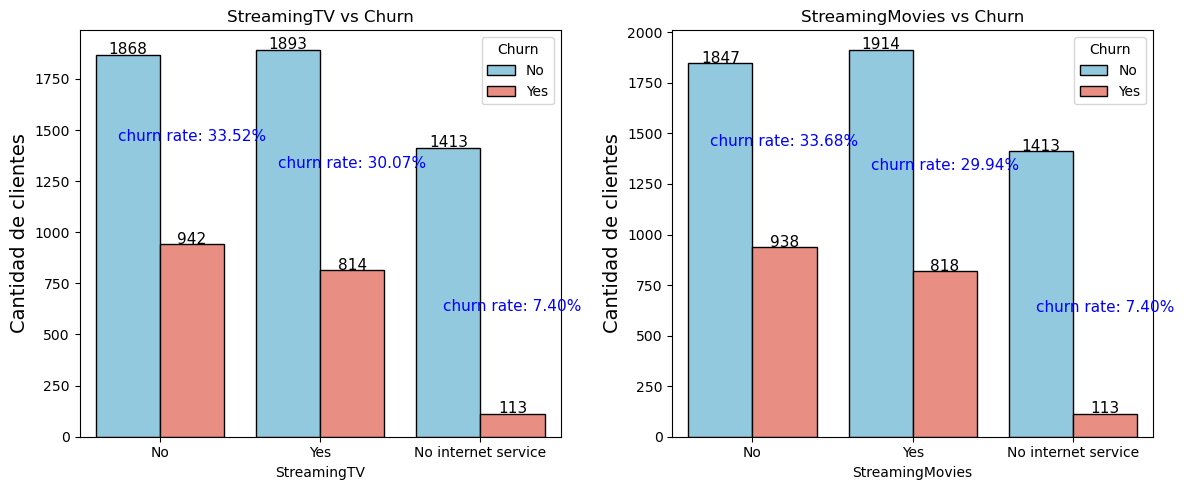

In [20]:
############################################################################
# Bloque 1: Primeras dos variables de list_2
############################################################################
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i, feature in enumerate(list_2[:2]):
    ax = axes[i]
    sns.countplot(x=feature, data=data, hue="Churn", palette=colors, edgecolor='black', ax=ax)
    
    # Obtenemos el orden de categorías que Seaborn está usando en el eje X
    x_labels = [tick.get_text() for tick in ax.get_xticklabels()]
    
    # Agrupamos para calcular la tasa de churn
    grouped = data.groupby(feature)['Churn'].value_counts().unstack(fill_value=0)
    # Reindexamos 'grouped' para que coincida con el orden real de las barras
    grouped = grouped.reindex(x_labels)
    
    # Determinamos cuál es la columna de "Yes"
    churn_label = "Yes" if "Yes" in grouped.columns else grouped.columns[1]
    
    # Obtenemos los labels de la leyenda para saber cuál contenedor es "Yes" o "No"
    handles, legend_labels = ax.get_legend_handles_labels()
    
    for container_index, container in enumerate(ax.containers):
        hue_label = legend_labels[container_index]  # "Yes" o "No"
        for j, rect in enumerate(container):
            count = int(rect.get_height())
            x_pos = rect.get_x() + rect.get_width() / 2
            y_pos = rect.get_height() + 2
            # Anotamos el conteo total de clientes
            ax.text(x_pos, y_pos, f'{count}', horizontalalignment='center', fontsize=11)
            
            # Si la barra corresponde a "Yes", anotamos la tasa de churn
            if hue_label == "Yes":
                cat = x_labels[j]  # Categoría real en el eje X
                total = grouped.loc[cat].sum()
                churn_count = grouped.loc[cat][churn_label]
                churn_rate = churn_count / total if total > 0 else 0
                ax.text(x_pos, y_pos + 500, f'churn rate: {churn_rate:.2%}',
                        horizontalalignment='center', fontsize=11, color='blue')
    
    ax.set_title(f"{feature} vs Churn")
    ax.set_ylabel('Cantidad de clientes', fontsize=14)

plt.tight_layout()
plt.show()


############################################################################
# Bloque 2: Tercera variable de list_2
############################################################################
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))

sns.countplot(x=list_2[2], data=data, hue="Churn", palette=colors, edgecolor='black', ax=ax)

# Orden real de categorías en el eje X
x_labels = [tick.get_text() for tick in ax.get_xticklabels()]

grouped = data.groupby(list_2[2])['Churn'].value_counts().unstack(fill_value=0)
grouped = grouped.reindex(x_labels)

churn_label = "Yes" if "Yes" in grouped.columns else grouped.columns[1]

handles, legend_labels = ax.get_legend_handles_labels()
for container_index, container in enumerate(ax.containers):
    hue_label = legend_labels[container_index]
    for j, rect in enumerate(container):
        count = int(rect.get_height())
        x_pos = rect.get_x() + rect.get_width() / 2
        y_pos = rect.get_height() + 2
        ax.text(x_pos, y_pos, f'{count}', horizontalalignment='center', fontsize=11)
        if hue_label == "Yes":
            cat = x_labels[j]
            total = grouped.loc[cat].sum()
            churn_count = grouped.loc[cat][churn_label]
            churn_rate = churn_count / total if total > 0 else 0
            ax.text(x_pos, y_pos + 400, f'churn rate: {churn_rate:.2%}',
                    horizontalalignment='center', fontsize=11, color='blue')

ax.set_title(f"{list_2[2]} vs Churn")
ax.set_ylabel('Cantidad de clientes', fontsize=14)

plt.tight_layout()
plt.show()


############################################################################
# Bloque 3: Últimas dos variables de list_2
############################################################################
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i, feature in enumerate(list_2[3:5]):
    ax = axes[i]
    sns.countplot(x=feature, data=data, hue="Churn", palette=colors, edgecolor='black', ax=ax)
    
    x_labels = [tick.get_text() for tick in ax.get_xticklabels()]
    
    grouped = data.groupby(feature)['Churn'].value_counts().unstack(fill_value=0)
    grouped = grouped.reindex(x_labels)
    
    churn_label = "Yes" if "Yes" in grouped.columns else grouped.columns[1]
    
    handles, legend_labels = ax.get_legend_handles_labels()
    for container_index, container in enumerate(ax.containers):
        hue_label = legend_labels[container_index]
        for j, rect in enumerate(container):
            count = int(rect.get_height())
            x_pos = rect.get_x() + rect.get_width() / 2
            y_pos = rect.get_height() + 2
            ax.text(x_pos, y_pos, f'{count}', horizontalalignment='center', fontsize=11)
            if hue_label == "Yes":
                cat = x_labels[j]
                total = grouped.loc[cat].sum()
                churn_count = grouped.loc[cat][churn_label]
                churn_rate = churn_count / total if total > 0 else 0
                ax.text(x_pos, y_pos + 500, f'churn rate: {churn_rate:.2%}',
                        horizontalalignment='center', fontsize=11, color='blue')
    
    ax.set_title(f"{feature} vs Churn")
    ax.set_ylabel('Cantidad de clientes', fontsize=14)

plt.tight_layout()
plt.show()

**Análisis de los resultados:**


**1.** Para PhoneService, a pesar de no tener servicio telefónico, se retuvieron más clientes en comparación con la cantidad de clientes que dejaron los servicios. 

**2.** En el caso de MultipleLines, la tasa de abandono es la misma independientemente de si hay múltiples líneas o no. 

**3.** Un gran número de clientes ha mostrado resistencia hacia el uso de cables de fibra óptica para proporcionar el servicio de Internet. Por el contrario, según el gráfico anterior, los clientes prefieren usar DSL para su servicio de Internet. 

**4.** StreamingTV y StreamingMovies muestran un gráfico idéntico. 
Independientemente de estar suscrito a StreamingTV y StreamingMovies, muchos clientes han abandonado. Parece que el contenido de streaming no fue completamente culpable.






**Grupo 2: Servicios del Usuario**

OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

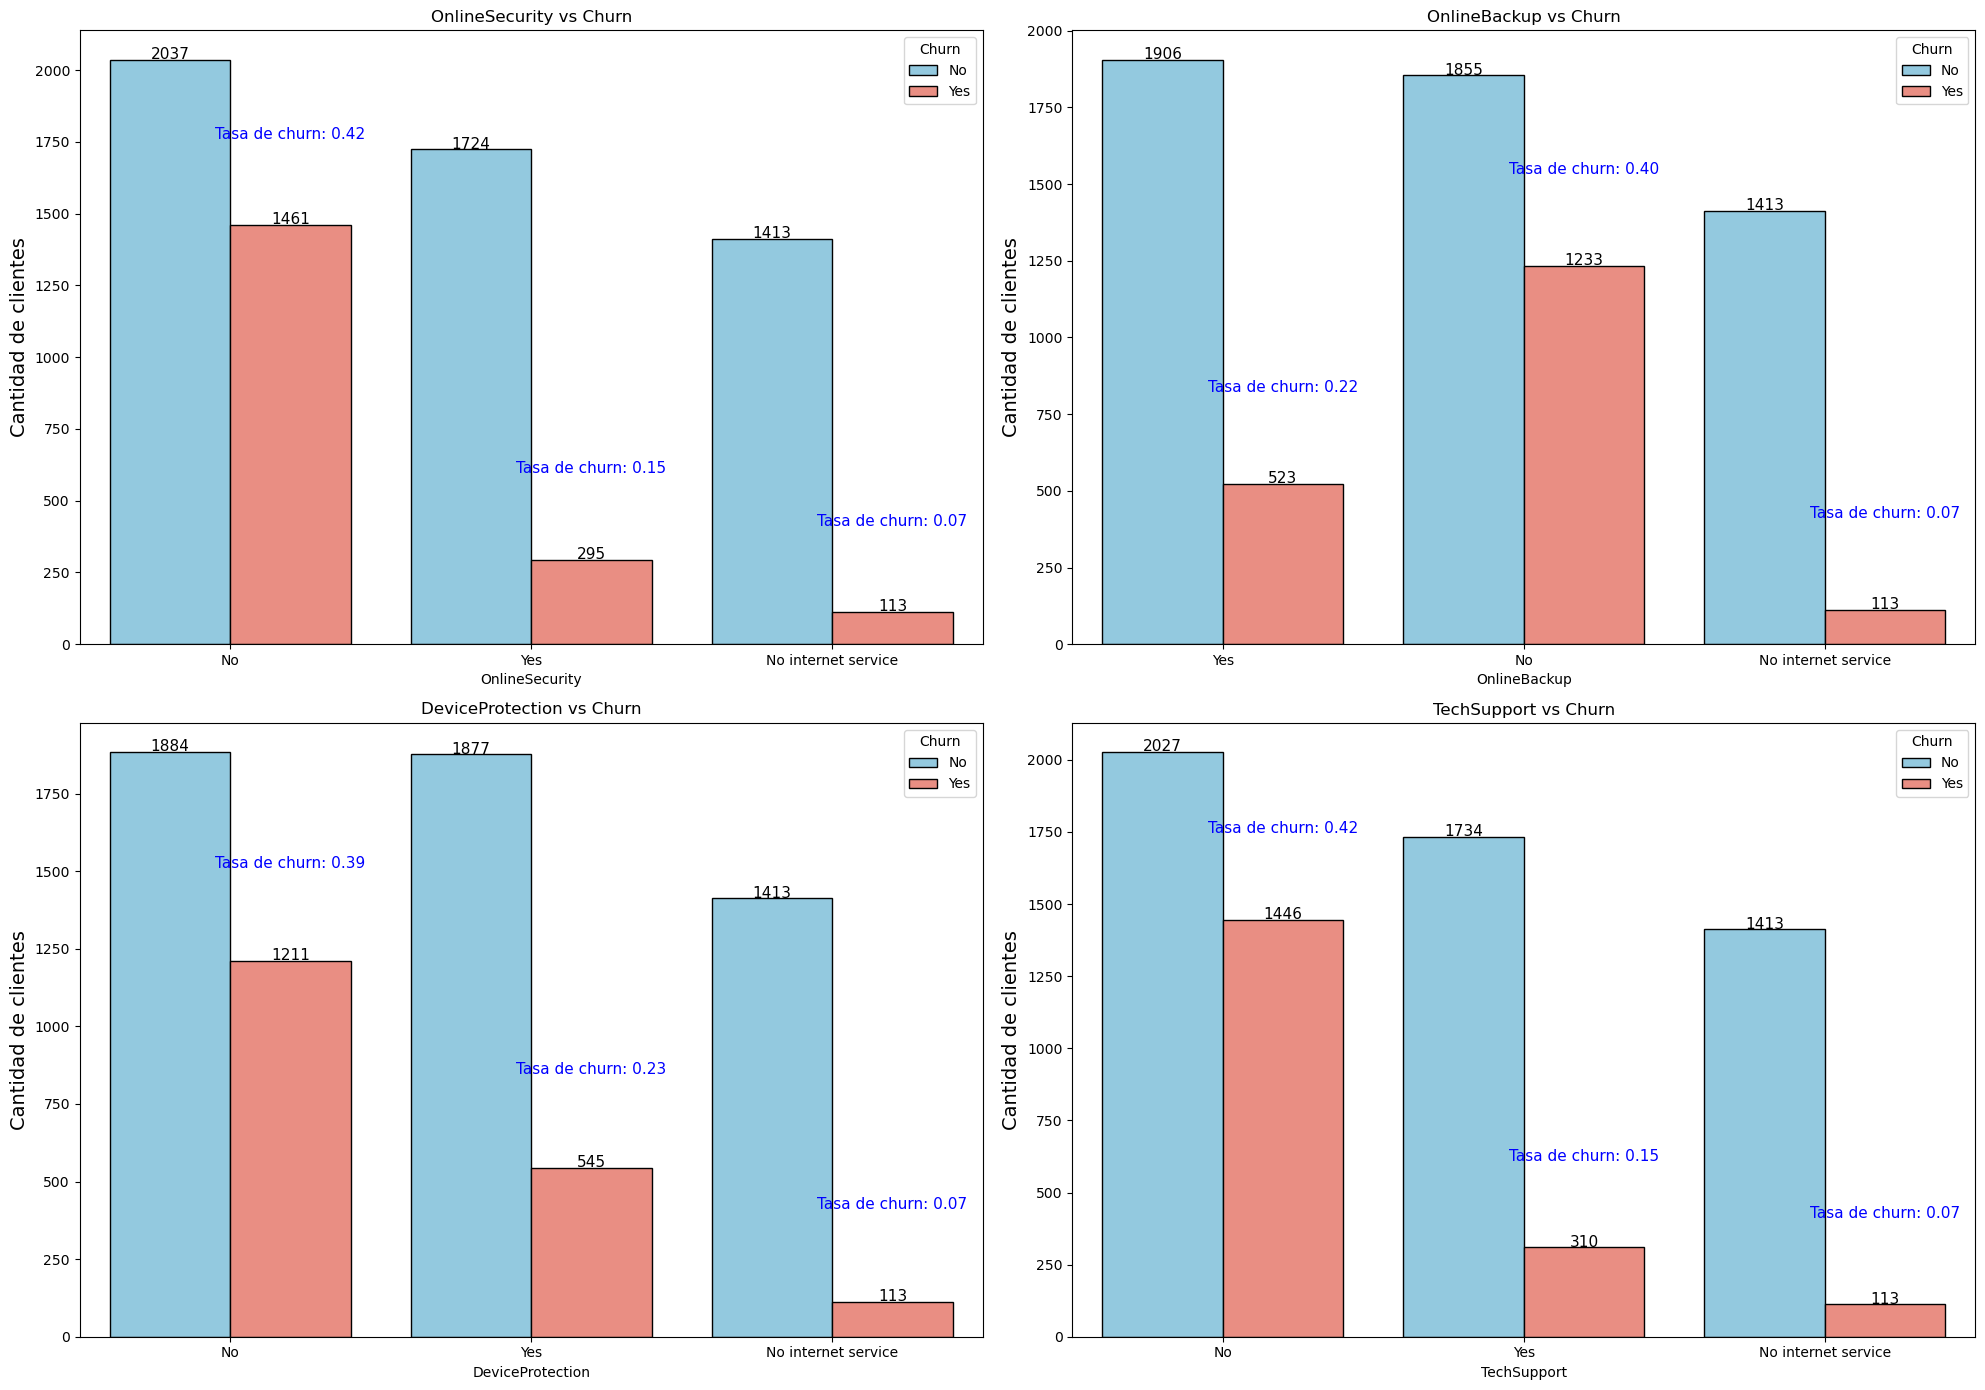

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for idx, feature in enumerate(list_2[-4:]):
    # Ubicamos el subplot manualmente
    plt.subplot(2, 2, idx + 1)

    # Dibujamos el countplot con hue_order=["No", "Yes"]
    ax = sns.countplot(
        x=feature,
        data=data,
        hue="Churn",
        palette=colors,
        edgecolor='black',
        hue_order=["No", "Yes"]
    )

    # Anotamos la cantidad de clientes sobre cada barra
    for rect in ax.patches:
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 2,
            int(rect.get_height()),
            horizontalalignment='center',
            fontsize=11
        )

    # -- 1) Obtenemos el orden de categorías del eje X tal cual se dibuja --
    x_labels = [tick.get_text() for tick in ax.get_xticklabels()]

    # -- 2) Calculamos la tabla con los conteos [feature, Churn] --
    grouped = data.groupby([feature, 'Churn']).size().unstack(fill_value=0)


    grouped = grouped.reindex(x_labels)


    churn_col = "Yes" if "Yes" in grouped.columns else grouped.columns[1]

  
    handles, legend_labels = ax.get_legend_handles_labels()
    for c_index, container in enumerate(ax.containers):
        hue_label = legend_labels[c_index]  # "No" o "Yes"
        if hue_label == "Yes":
            for j, rect in enumerate(container):
                # 'j' indica la posición de la barra, que coincide con x_labels[j]
                cat = x_labels[j]
                count_total = grouped.loc[cat].sum()  # Suma "No" + "Yes"
                count_churn = grouped.loc[cat][churn_col]
                churn_rate = count_churn / count_total if count_total > 0 else 0

                # Posicionamos el texto de la tasa de churn
                x_pos = rect.get_x() + rect.get_width() / 2
                y_pos = rect.get_height() + 300
                ax.text(
                    x_pos,
                    y_pos,
                    f'Tasa de churn: {churn_rate:.2f}',
                    horizontalalignment='center',
                    fontsize=11,
                    color='blue'
                )

    plt.title(f"{feature} vs Churn")
    plt.ylabel('Cantidad de clientes', fontsize=14)

plt.tight_layout()
plt.show()


**Análisis de resultados**

**1.** Cuando se trata de atender a los clientes, los servicios relacionados con la seguridad en línea **(OnlineSecurity)**, respaldo en línea **(OnlineBackup)**, protección de dispositivos **(DeviceProtection)** y soporte técnico **(TechSupport)** son cruciales según las visualizaciones anteriores. 

**2.** Un gran número de clientes han cambiado de proveedor de servicios cuando se trata de servicios deficientes con las características mencionadas anteriormente.

**Grupo 3: Informacion sobre metodo de pago**

Contract | PaperlessBilling | PaymentMethod |

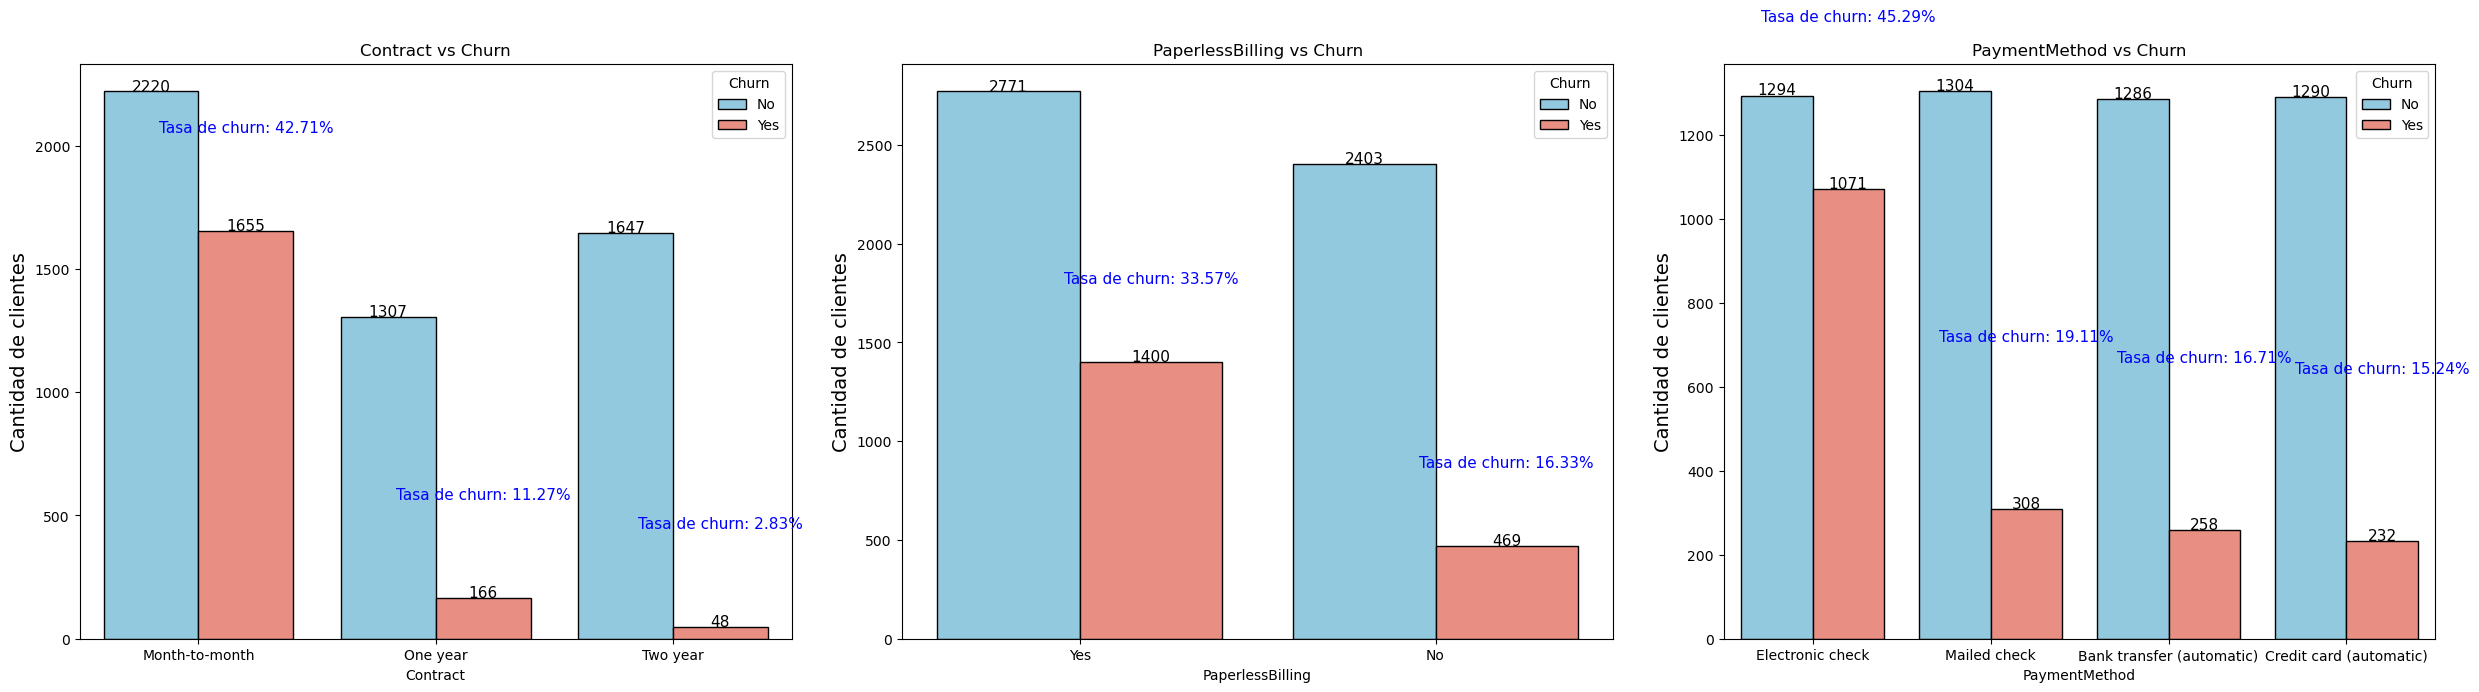

In [22]:
fig = plt.figure(figsize=(25,7))

# Subgráfico 1: list_3[0]
plt.subplot(1,3,1)
feature = list_3[0]
ax = sns.countplot(x=feature, hue="Churn", data=data, palette=colors, edgecolor='black')
# Anotamos el conteo
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2,
            rect.get_height() + 2,
            int(rect.get_height()),
            horizontalalignment='center',
            fontsize=11)
# Obtenemos el orden real de categorías en el eje X
x_labels = [tick.get_text() for tick in ax.get_xticklabels()]
# Calculamos la tabla de conteos y la reindexamos
grouped = data.groupby(feature)['Churn'].value_counts().unstack(fill_value=0)
grouped = grouped.reindex(x_labels)
churn_label = "Yes" if "Yes" in grouped.columns else grouped.columns[1]
handles, legend_labels = ax.get_legend_handles_labels()
# Anotamos la tasa de churn sobre las barras de "Yes"
for container_index, container in enumerate(ax.containers):
    hue_label = legend_labels[container_index]
    if hue_label == "Yes":
        for j, rect in enumerate(container):
            cat = x_labels[j]
            total = grouped.loc[cat].sum()
            churn_count = grouped.loc[cat][churn_label]
            churn_rate = churn_count / total if total > 0 else 0
            x_pos = rect.get_x() + rect.get_width()/2
            y_pos = rect.get_height() + 400  
            ax.text(x_pos, y_pos, f'Tasa de churn: {churn_rate:.2%}',
                    horizontalalignment='center', fontsize=11, color='blue')
plt.ylabel('Cantidad de clientes', fontsize=14)
plt.title(f"{feature} vs Churn")

# Subgráfico 2: list_3[1]
plt.subplot(1,3,2)
feature = list_3[1]
ax = sns.countplot(x=feature, hue="Churn", data=data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2,
            rect.get_height() + 2,
            int(rect.get_height()),
            horizontalalignment='center',
            fontsize=11)
x_labels = [tick.get_text() for tick in ax.get_xticklabels()]
grouped = data.groupby(feature)['Churn'].value_counts().unstack(fill_value=0)
grouped = grouped.reindex(x_labels)
churn_label = "Yes" if "Yes" in grouped.columns else grouped.columns[1]
handles, legend_labels = ax.get_legend_handles_labels()
for container_index, container in enumerate(ax.containers):
    hue_label = legend_labels[container_index]
    if hue_label == "Yes":
        for j, rect in enumerate(container):
            cat = x_labels[j]
            total = grouped.loc[cat].sum()
            churn_count = grouped.loc[cat][churn_label]
            churn_rate = churn_count / total if total > 0 else 0
            x_pos = rect.get_x() + rect.get_width()/2
            y_pos = rect.get_height() + 400
            ax.text(x_pos, y_pos, f'Tasa de churn: {churn_rate:.2%}',
                    horizontalalignment='center', fontsize=11, color='blue')
plt.ylabel('Cantidad de clientes', fontsize=14)
plt.title(f"{feature} vs Churn")

# Subgráfico 3: list_3[2]
plt.subplot(1,3,3)
feature = list_3[2]
ax = sns.countplot(x=feature, hue="Churn", data=data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2,
            rect.get_height() + 2,
            int(rect.get_height()),
            horizontalalignment='center',
            fontsize=11)
x_labels = [tick.get_text() for tick in ax.get_xticklabels()]
grouped = data.groupby(feature)['Churn'].value_counts().unstack(fill_value=0)
grouped = grouped.reindex(x_labels)
churn_label = "Yes" if "Yes" in grouped.columns else grouped.columns[1]
handles, legend_labels = ax.get_legend_handles_labels()
for container_index, container in enumerate(ax.containers):
    hue_label = legend_labels[container_index]
    if hue_label == "Yes":
        for j, rect in enumerate(container):
            cat = x_labels[j]
            total = grouped.loc[cat].sum()
            churn_count = grouped.loc[cat][churn_label]
            churn_rate = churn_count / total if total > 0 else 0
            x_pos = rect.get_x() + rect.get_width()/2
            y_pos = rect.get_height() + 400
            ax.text(x_pos, y_pos, f'Tasa de churn: {churn_rate:.2%}',
                    horizontalalignment='center', fontsize=11, color='blue')
plt.ylabel('Cantidad de clientes', fontsize=14)
plt.title(f"{feature} vs Churn")

plt.tight_layout()
plt.show()

**Análisis de resultados**

**1.** 
La pérdida de clientes para un contrato basado en Mes a Mes es bastante alta. Esto probablemente se debe a que los clientes están probando los diversos servicios disponibles para ellos y, por lo tanto, para ahorrar dinero, se prueba el servicio de un mes.

**2.** Otra razón puede ser que la experiencia general con el servicio de Internet, el servicio de transmisión y el servicio telefónico no fueron consistentes. Cada cliente tiene una prioridad diferente y, por lo tanto, si uno de los tres estaba a la altura, todo el servicio se cortaba.


**3.** La facturación sin papel muestra un alto número de clientes que abandonan el servicio. Esto probablemente se debe a algún problema de pago o problemas de recibos.

**4.** Los clientes claramente resentían el método de pago mediante cheque electrónico. De los 2365 recibos pagados utilizando cheque electrónico, un impresionante total de 1071 clientes salieron del servicio debido a este método de pago. La empresa definitivamente necesita eliminar el método de cheque electrónico o hacerlo sin complicaciones y fácil de usar.


**3.4 Variables Categoricas vs Variable Objetivo Positivas (Casos que el cliente abandono el servicio):**

Ahora analizamos directamente la distribucion en la variable objetivo en los casos positivos.

**Grupo 1: Informacion del cliente**

gender | SeniorCitizen | Partner | Dependents |

In [23]:
gender = df[df['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]

seniorcitizen = df[df['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = df[df['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = df[df['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

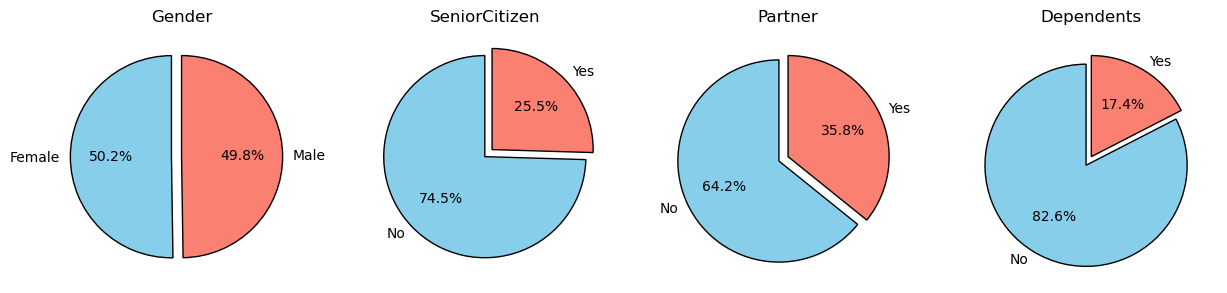

In [24]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');


**Análisis de resultados**

**1.** Podemos observar una división clara del 50% - 50% entre los clientes hombres y mujeres que han cambiado sus servicios. Por lo tanto, la razón del cambio está relacionada con algún aspecto del servicio o algún proceso al que los clientes reaccionaron negativamente.


**2.** ¡El 75% de los clientes que abandonaron el servicio no son personas mayores! Esta es una información importante a la que la empresa debe prestar atención.


**3.** Los clientes que viven solos han cancelado los servicios. Según los datos de Parejas y Dependientes, en promedio, el 73.4% de los clientes que abandonaron el servicio vivían solos.








**Grupo 2: Servicios del Usuario**

PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

In [25]:
phoneservice = df[df['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] 

multiplelines = df[df['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] 

internetservice = df[df['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] 

streamingtv = df[df['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] 

streamingmovies = df[df['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] 

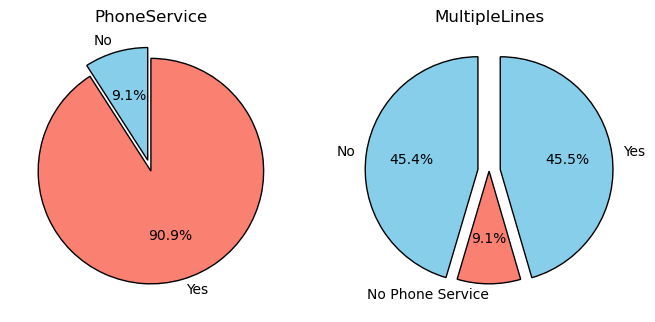

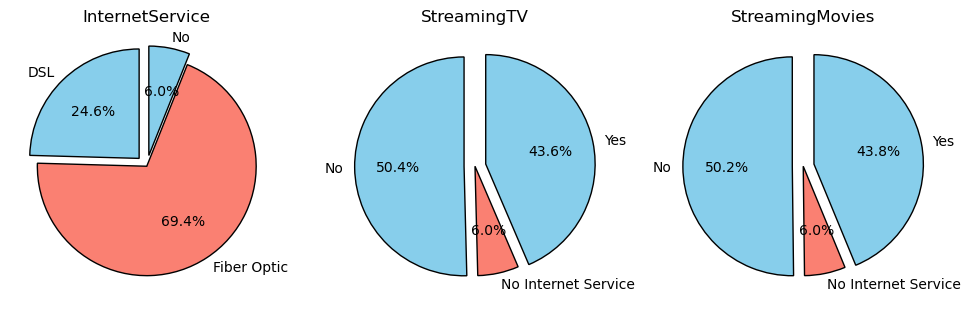

In [26]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');

**Análisis de resultados**

**1.** A pesar de ofrecer el servicio telefónico, un alto porcentaje de clientes han cambiado de proveedor.

**2.** De manera similar, la disponibilidad de múltiples líneas no importó, ya que la cancelación del servicio se llevó a cabo de todos modos.

**3.** ¡Los clientes definitivamente no apreciaron el enfoque de los cables de fibra óptica para proporcionar el servicio de Internet, con un sólido 70% optando por cancelar los servicios!

**4.** Para StreamingTV y StreamingMovies, los clientes sin estos servicios definitivamente cancelaron su suscripción, sin embargo, un promedio del 43.7% de los clientes cambió de proveedor a pesar de consumir el contenido en streaming.









**Grupo 2: Servicios del Usuario**

OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

In [27]:
onlinesecurity = df[df['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] 

onlinebackup = df[df['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] 

deviceprotection = df[df['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] 

techsupport = df[df['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] 

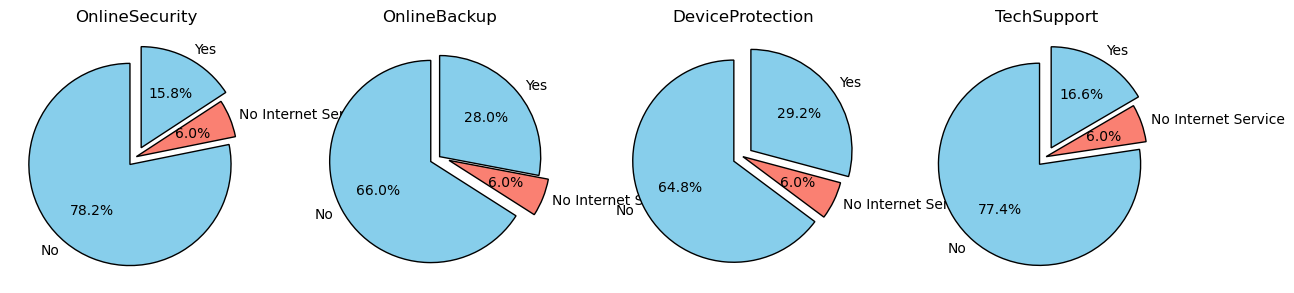

In [28]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');

**Análisis de resultados**

**1.** Los gráficos circulares anteriores destacan la importancia de proporcionar OnlineSecurity, OnlineBackup, DeviceProtection y TechSupport, ya que un promedio del 71.6% de los clientes cancelaron sus servicios debido a la falta de estas características.





**Grupo 3: Informacion sobre metodo de pago**

Contract | PaperlessBilling | PaymentMethod |

In [29]:
contract = df[df['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] 

paperlessbilling = df[df['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] 

paymentmethod = df[df['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 


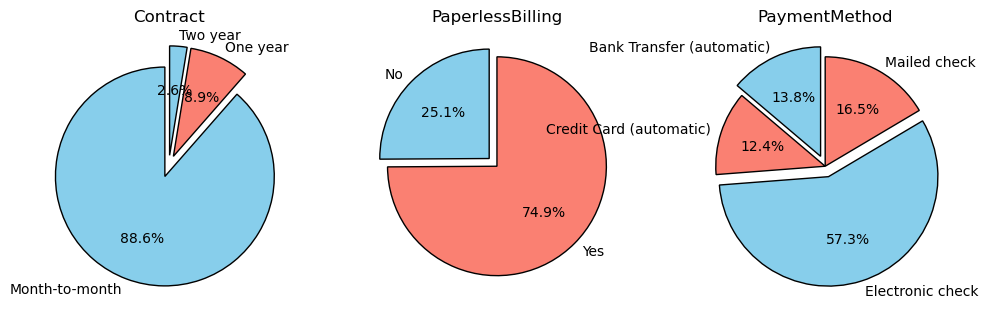

In [30]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');

**Análisis de resultados**

**1.** La duración del contrato mensual tiene la mayor participación cuando se trata de la rotación de clientes, con un enorme 88.6% de los clientes.

**2.** La facturación sin papel parece no ser apreciada por los clientes.

**3.** Definitivamente se necesita resolver el problema con el cheque electrónico, ya que representa el 57.3% de la rotación. Luego le siguen el cheque enviado por correo, la transferencia bancaria (automática) y la tarjeta de crédito (automática).











**3.5 Variables Númericas**



**Distribucion de variables numericas:**

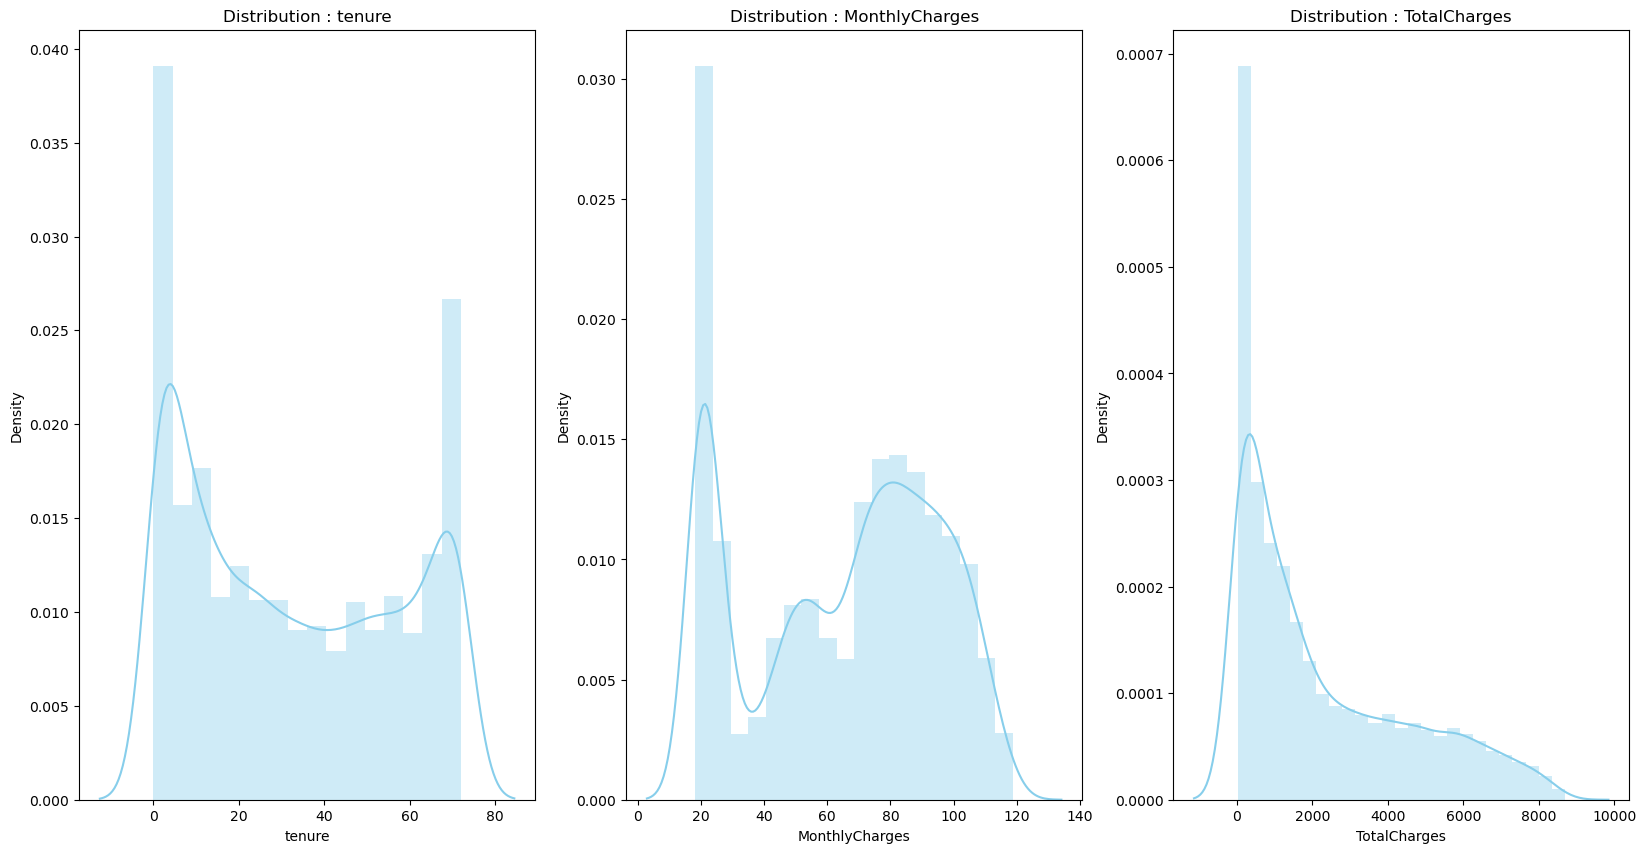

In [31]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (20,10))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

**1.** La tenencia **(tenure)** y los cargos mensuales **(MonthlyCharges)** crean una distribución bimodal con picos presentes en 0 - 70 y 20 - 80 respectivamente. 

**2.** **TotalCharges** muestra una distribución sesgada positivamente o hacia la derecha.

**Relacion de variables númericas con la variable objetivo**

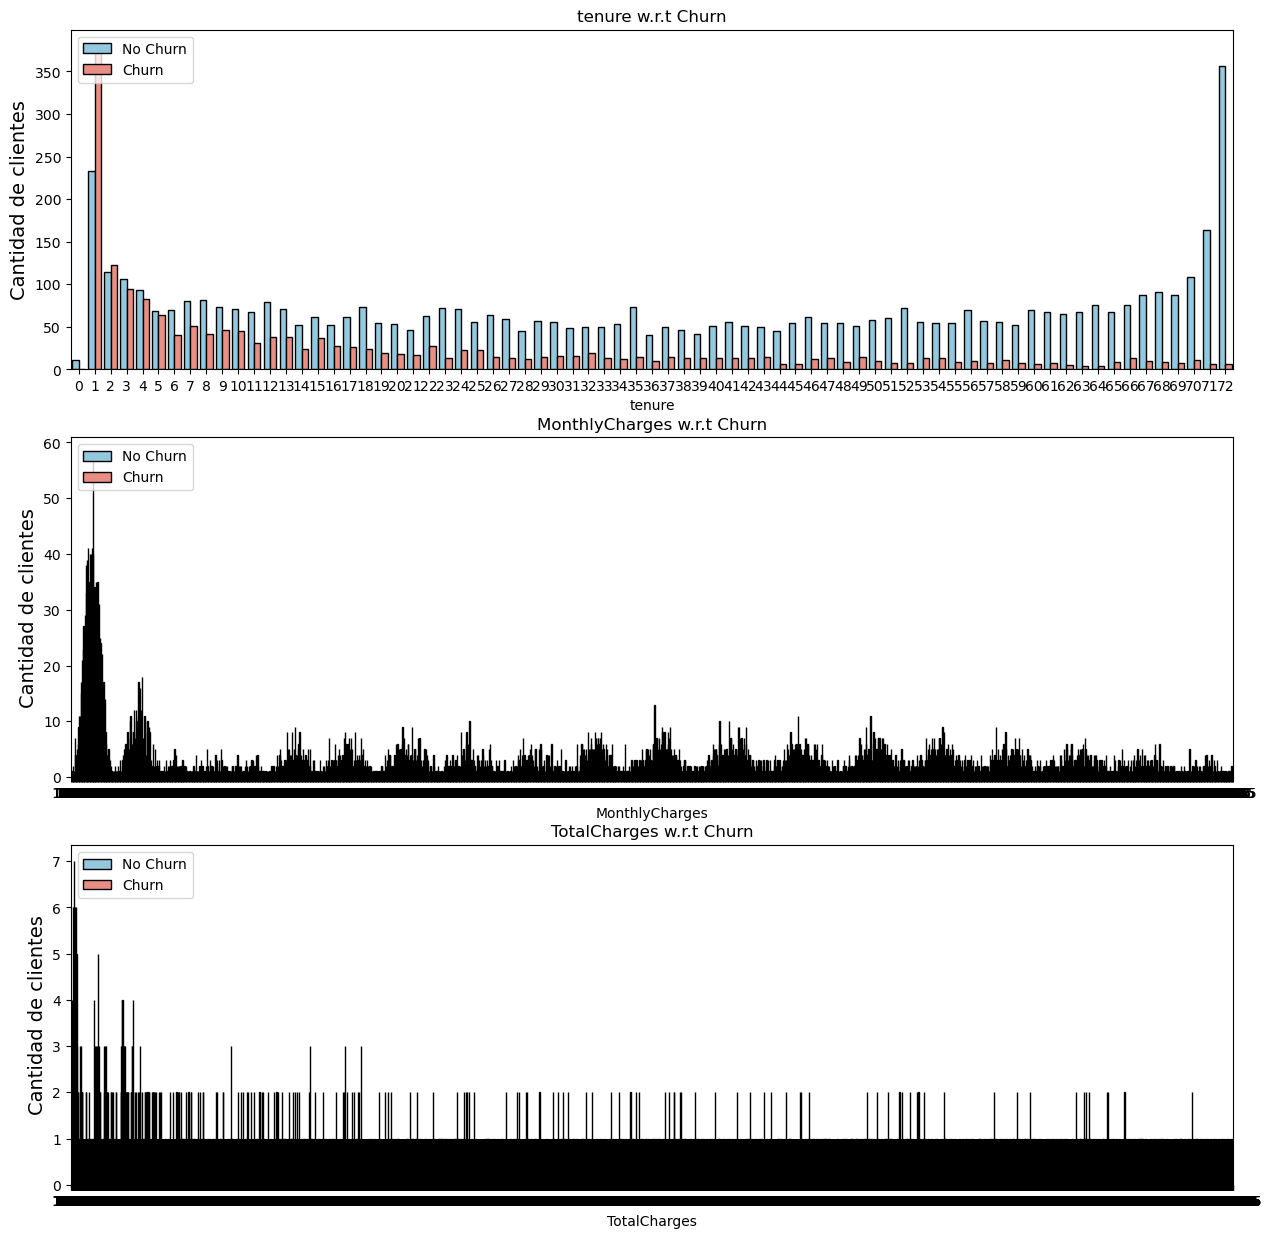

In [32]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(x=numerical_features[i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = numerical_features[i] + ' w.r.t Churn'
    plt.ylabel('Cantidad de clientes', fontsize=14)
    plt.title(title);

* Dado el tiempo de tenencia (tenure), un gran número de clientes han abandonado después del primer mes. Esta alta cancelación de servicios continúa durante 4-5 meses, pero el número de clientes que se dan de baja ha disminuido desde el primer mes. A medida que aumenta la tenencia, la cantidad de clientes que se dan de baja disminuye.

* Esto resulta en una baja cancelación de clientes a medida que aumenta la tenencia. Se muestra un gráfico simétrico con el lado izquierdo dominado por los números de cancelación y el lado derecho dominado por los números de cancelación bajos.

* Debido a la gran cantidad de puntos de datos únicos en MonthlyCharges y TotalCharges, es difícil obtener algún tipo de información. Por lo tanto, escalaremos estas características numéricas para visualización comprensible y para obtener información. Esto lleva los puntos de datos variados a un valor constante que representa un rango de valores.



**Aquí, dividimos los puntos de datos de las características numéricas por 5 o 500 y asignamos su valor de cociente como la constante representativa para ese punto de datos. Las constantes de escala se deciden al examinar los datos y la intuición.**

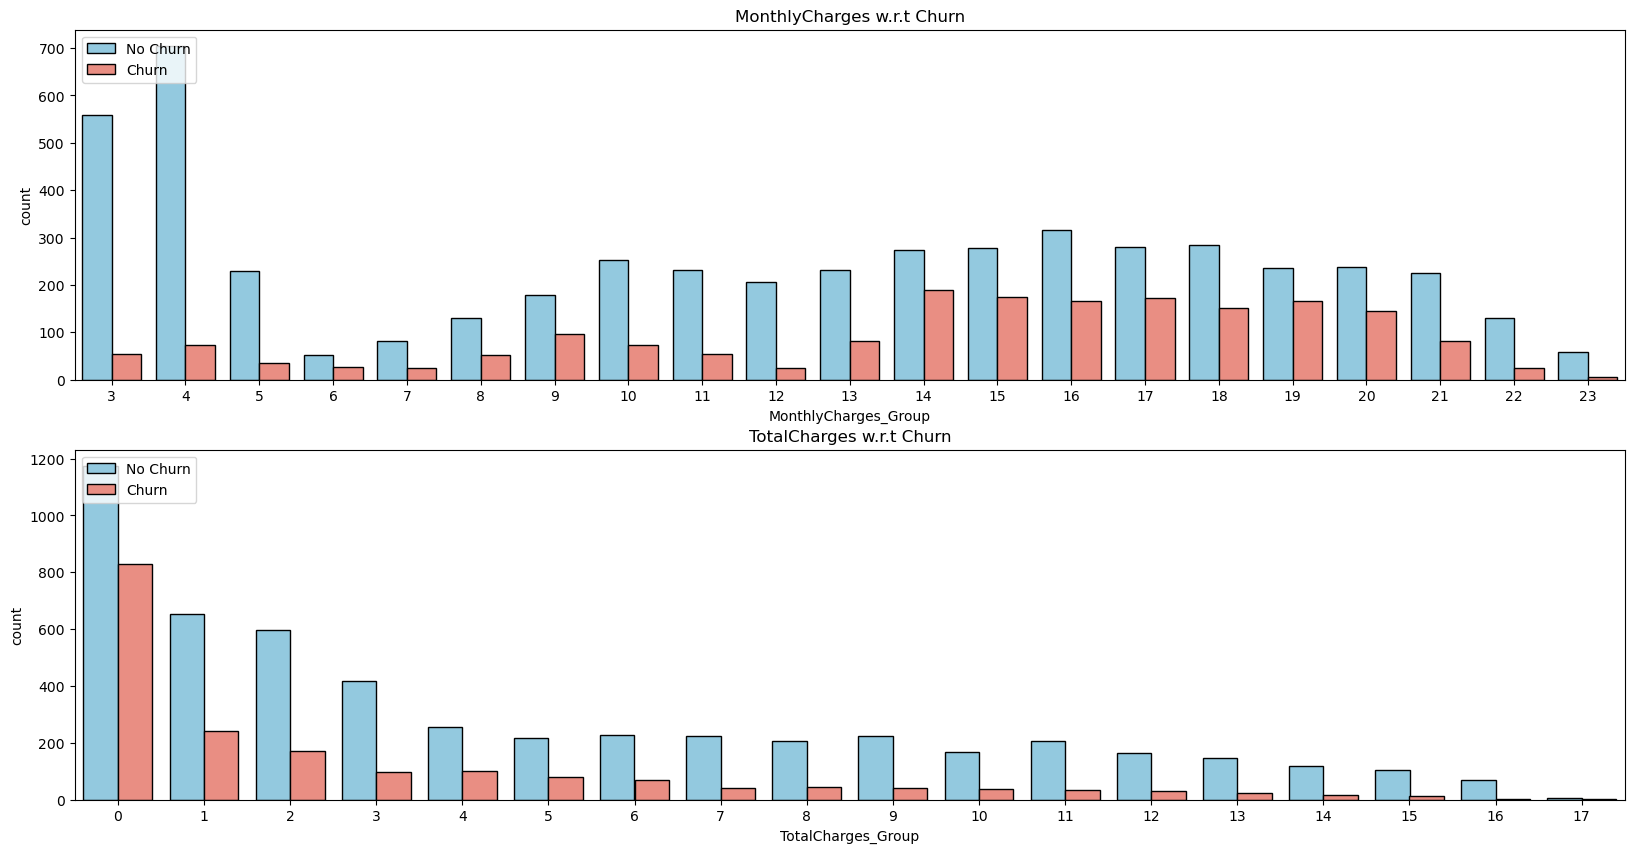

In [33]:
df['MonthlyCharges_Group'] = [int(i/5) for i in df['MonthlyCharges']]
df['TotalCharges_Group'] = [int(i/500) for i in df['TotalCharges']]

fig, ax = plt.subplots(nrows = 2,ncols = 1,figsize = (20,10))
for i in range(len(numerical_features[1:])):
    plt.subplot(2,1,i+1)
    sns.countplot(x=numerical_features[1 + i]+'_Group',data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = numerical_features[1 + i] + ' w.r.t Churn'
    plt.title(title);

* Para el grupo de cargos mensuales (MonthlyCharges), la tasa de cancelación es alta para los valores entre 65 (13x5) y 105 (21x5). Este rango de valores de cargos mensuales causó que los clientes cambiaran de proveedor.

* Un número muy alto de clientes optaron por salir de los servicios para los TotalCharges por debajo de 500. Esta cancelación de clientes continúa para un rango de valores de TotalCharges de 0 (0x500) a 1000 (2x500).

**3.6 Variables Númericas vs Variables Categoricas en relacion a la Variable Objetivo (Churn):**


**Tenure vs Grupo 1: gender | SeniorCitizen | Partner | Dependents |**



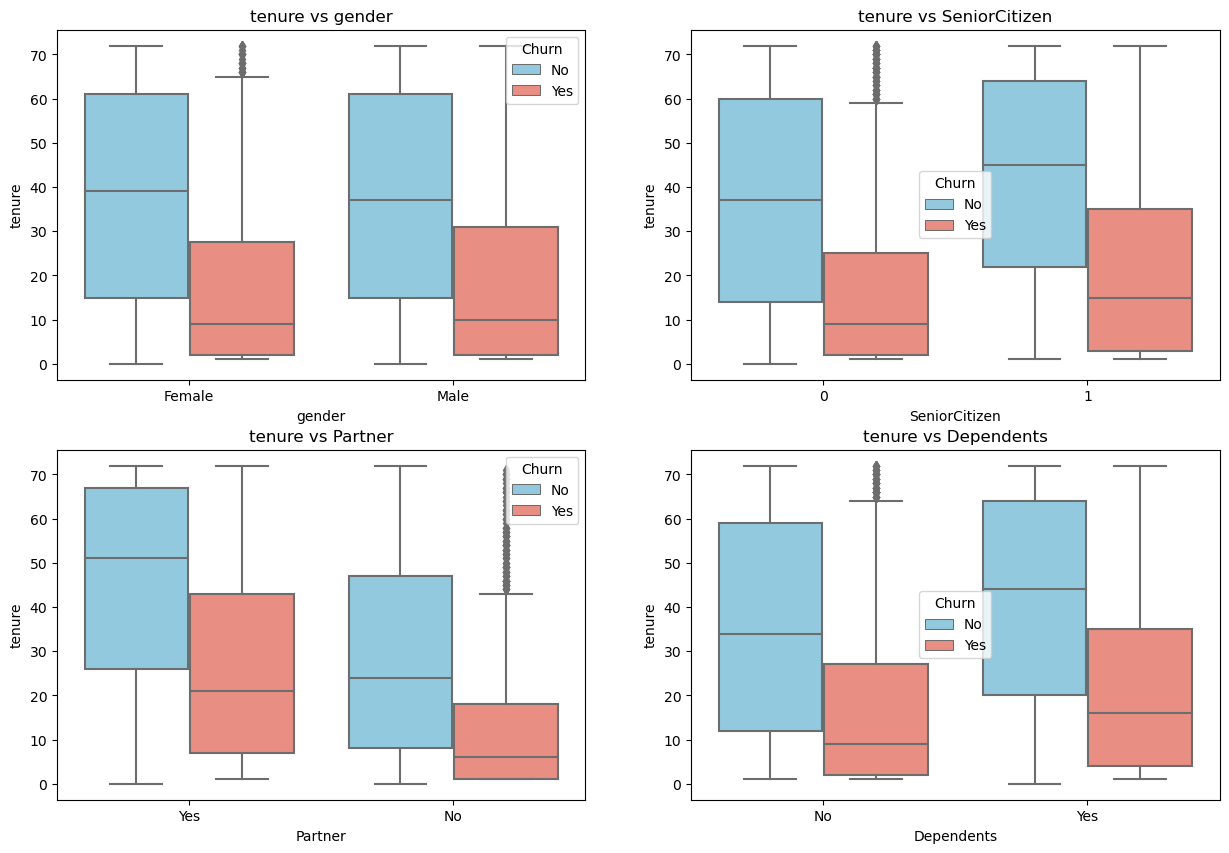

In [34]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = list_1[i],y = 'tenure',data = data,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + list_1[i]);

* Los gráficos de abandono de clientes masculinos y femeninos son muy similares.

* Los clientes SeniorCitizen optaron por salir de los servicios durante un período de permanencia de 0 a 35 meses. De 20 a 35 meses es el período de toma de decisiones sobre si continuar o cambiar para los SeniorCitizen.

* De manera similar, los clientes con parejas continuaron con el servicio durante un período de permanencia de 5 a 45 meses.

**Tenure vs Grupo 2: PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |**






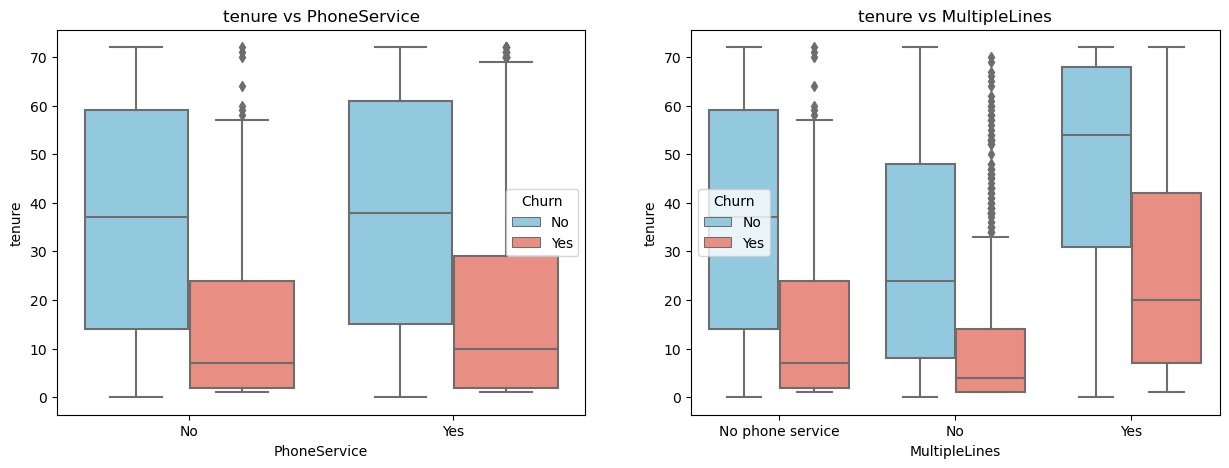

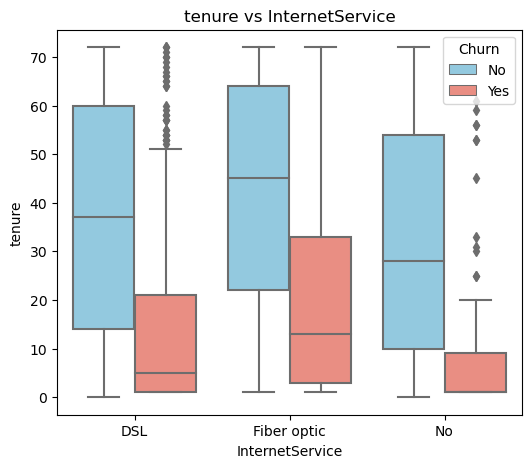

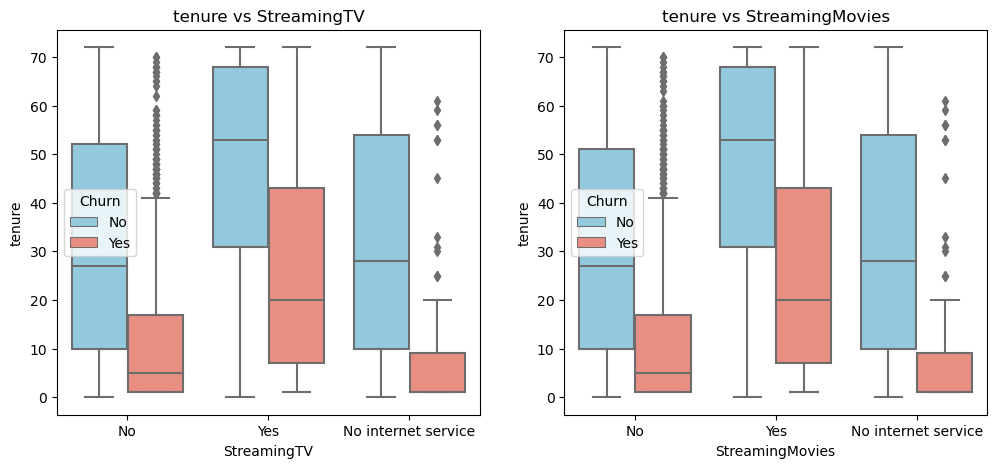

In [35]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(list_2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = list_2[i],y = 'tenure',data = data,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + list_2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = list_2[2],y = 'tenure',data = data,hue = 'Churn',palette = colors);
plt.title('tenure vs ' + list_2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(list_2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = list_2[i + 3],y = 'tenure',data = data,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + list_2[i + 3]);

* La presencia de MultipleLines aumenta la mediana de MonthlyCharges independientemente de si los clientes optan por salir de los servicios o no.

* Para el gráfico de permanencia vs PhoneService, la disponibilidad de PhoneService o no muestra una visualización en espejo. Los clientes probablemente no eran usuarios frecuentes de teléfono (llamadas - mensajes).

* Para InternetService, los clientes parecen ser muy escépticos sobre el uso de cables de fibra óptica, ya que la cancelación duró alrededor de 30 a 35 meses antes de continuar con el servicio o cambiar a otro.

* De manera similar para StreamingTV y StreamingMovies, se puede observar un período de permanencia en el abandono de alrededor de 10 a 40 meses.

**Tenure vs Grupo 2: OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |**




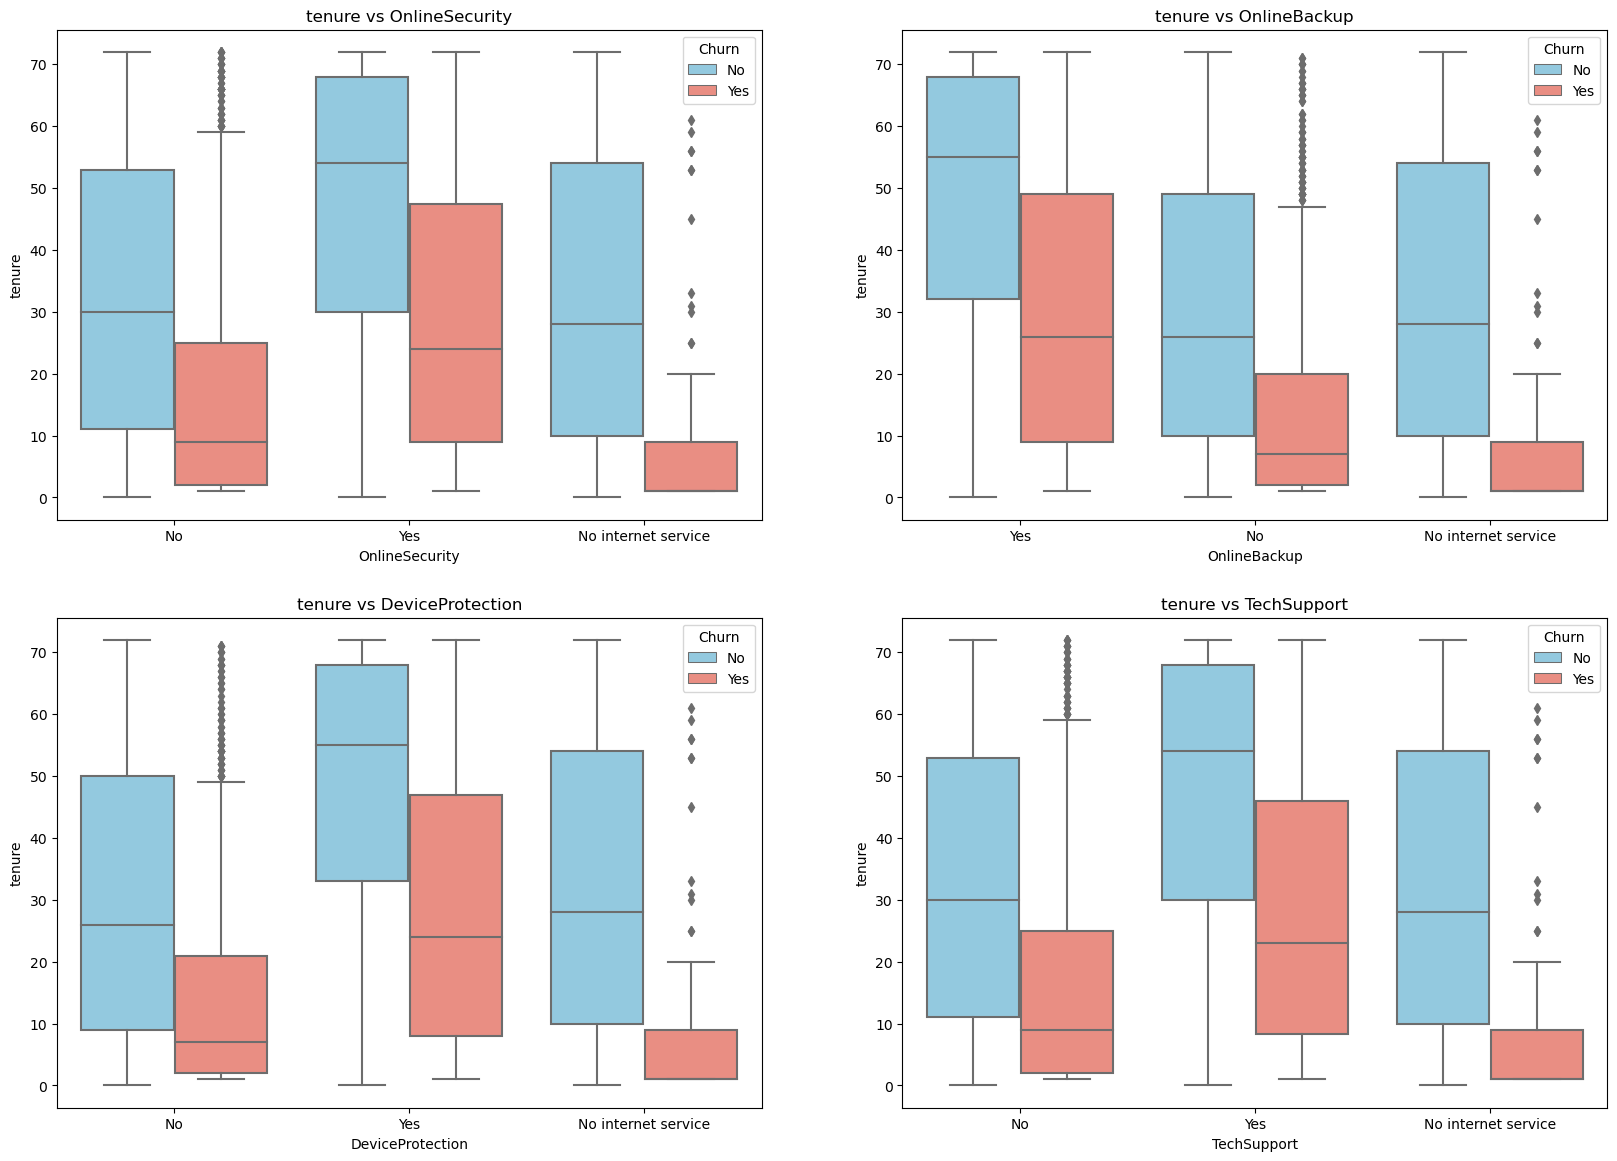

In [36]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(list_2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = list_2[i - 4],y = 'tenure',data = data,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + list_2[i-4]);

* Para OnlineSecurity, OnlineBackup, DeviceProtection y TechSupport, el valor medio de permanencia en la cancelación es de 25 meses. El valor más alto de esta permanencia en la cancelación es de alrededor de 45 meses.

* El período de 30 a 35 meses es cuando los clientes toman una decisión sobre si continuar con los servicios actuales o cambiar con respecto a las características mencionadas anteriormente.

**Tenure vs Grupo 3 : Contract | PaperlessBilling | PaymentMethod |**

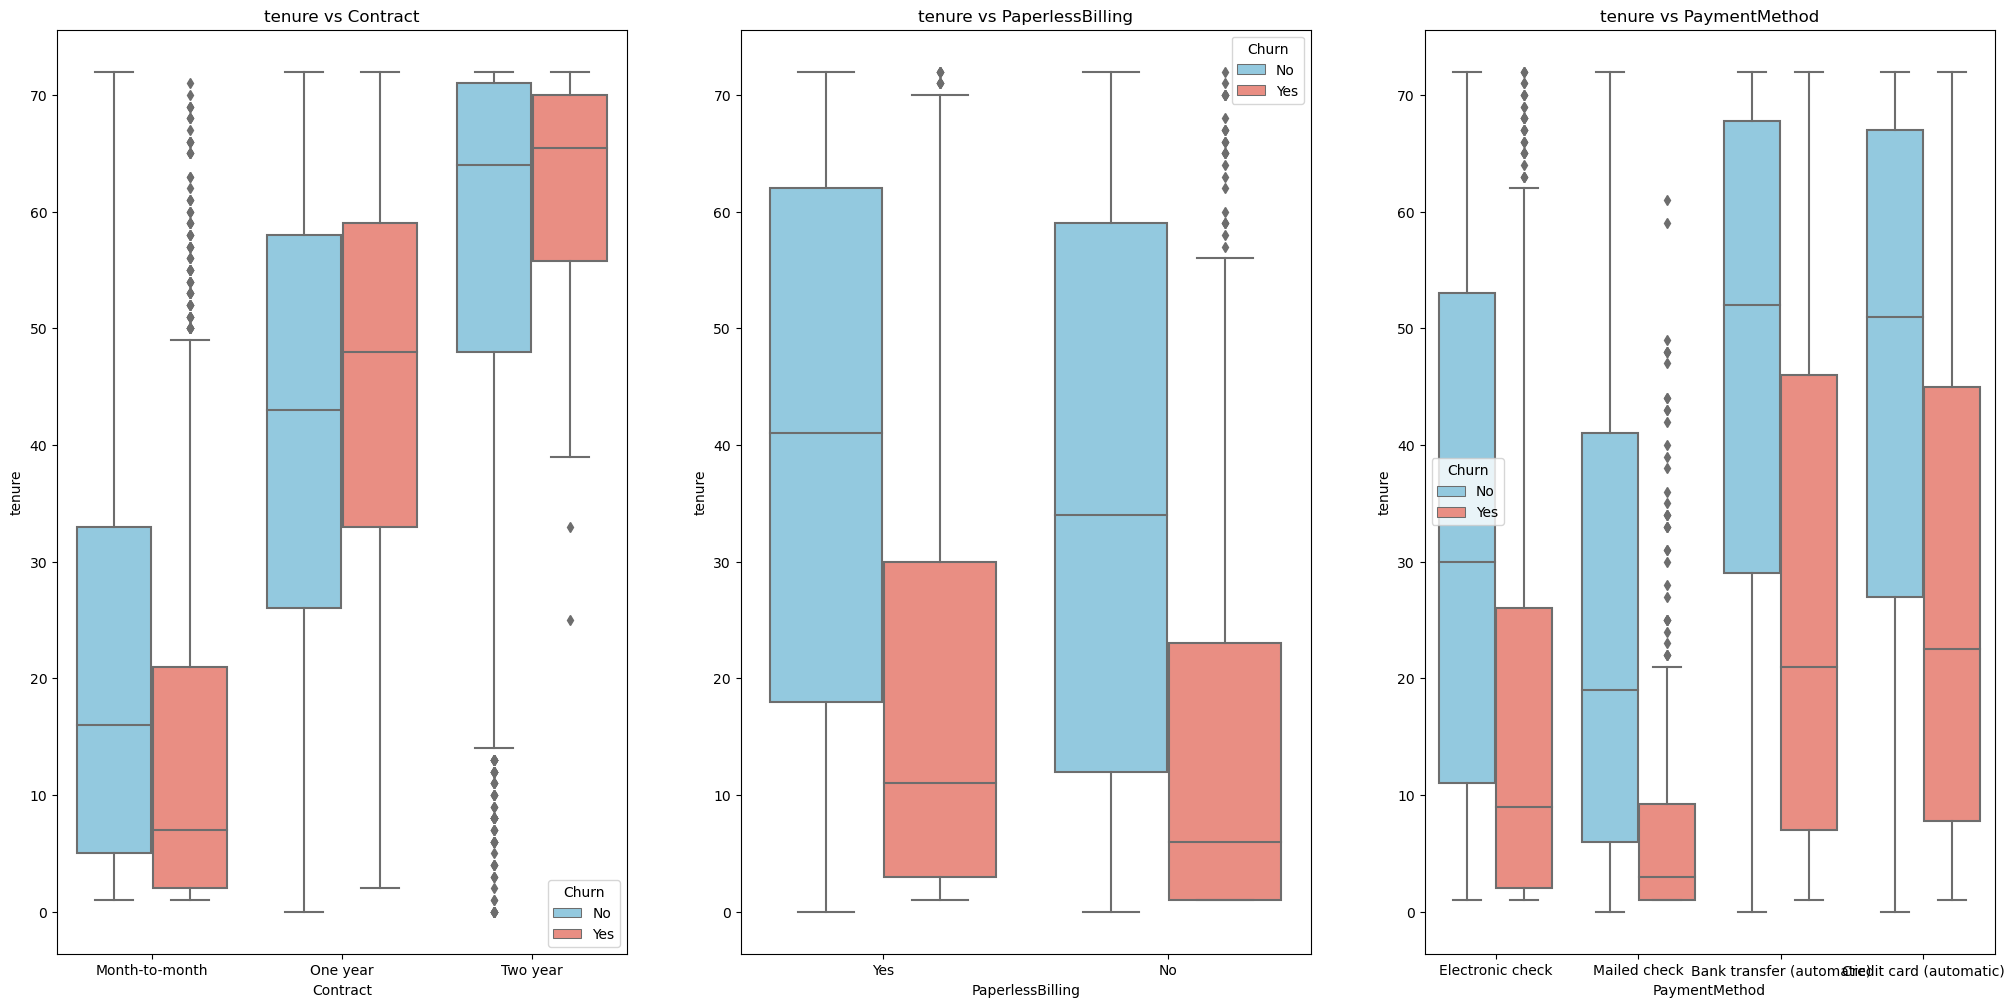

In [37]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,12))
for i in range(len(list_3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = list_3[i],y = 'tenure',data = data,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + list_3[i]);

* Cuando los clientes firman contratos de uno y dos años para los servicios, parecen continuar con los servicios durante aproximadamente 25 y 45 meses respectivamente. Sin embargo, comienzan a cuestionar los servicios y a pensar en cambiar a partir del mes 35 y del mes 55 respectivamente.

* Independientemente del PaperlessBilling, los clientes piensan en cambiar desde el primer mes.

* En cuanto al PaymentMethod, la permanencia mediana en la cancelación de Transferencia bancaria (automática) y Tarjeta de crédito (automática), por encima de los 20 meses, es casi el doble que la de Cheque electrónico y Cheque enviado por correo, alrededor de 10 meses y alrededor de 5 meses respectivamente.

**3.7 Monthly Charges vs Variables Categoricas en relacion a la Variable Objetivo (Churn):**

**MonthlyCharges vs Grupo 1: gender | SeniorCitizen | Partner | Dependents |**

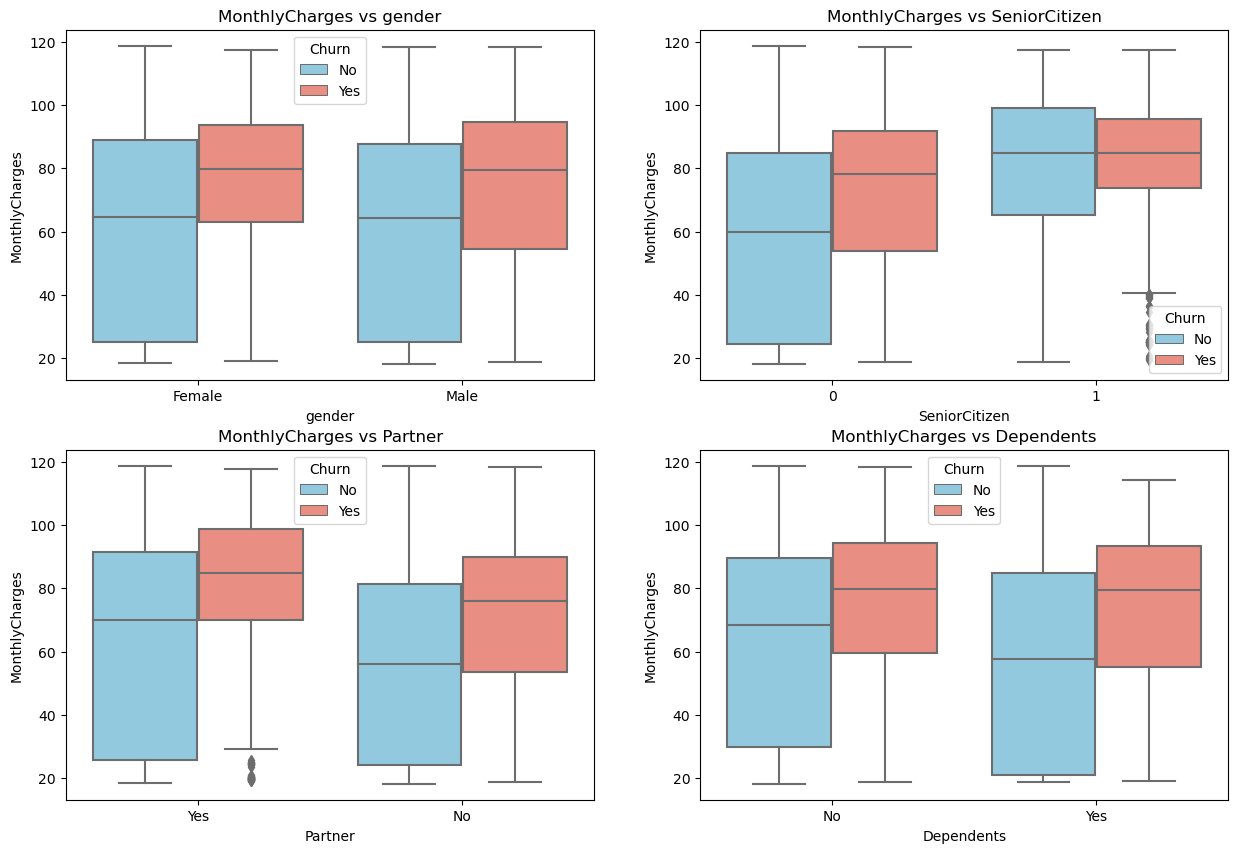

In [38]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = list_1[i],y = 'MonthlyCharges',data = data,hue = 'Churn',palette = colors); 
    plt.title('MonthlyCharges vs ' + list_1[i]);


* Para todas las características mencionadas anteriormente, el valor mediano de los clientes que no se cancelan es muy cercano al límite inferior de los clientes que se cancelan.

* Los clientes masculinos y femeninos tienen el mismo valor mediano de MonthlyCharges, alrededor de 60. 

* Para los SeniorCitizen, este valor se eleva a 80. Los clientes que viven con un socio tienen un límite inferior más alto de cancelación, MonthlyCharges de 70, que aquellos que viven solos, con MonthlyCharges justo por debajo de 60.

**MonthlyCharges vs Grupo 2: PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |**

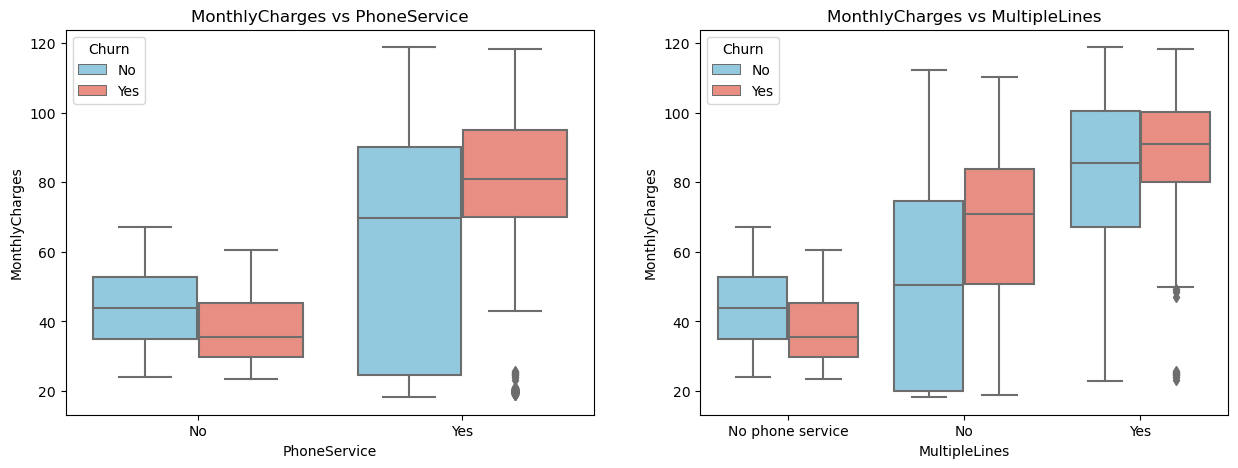

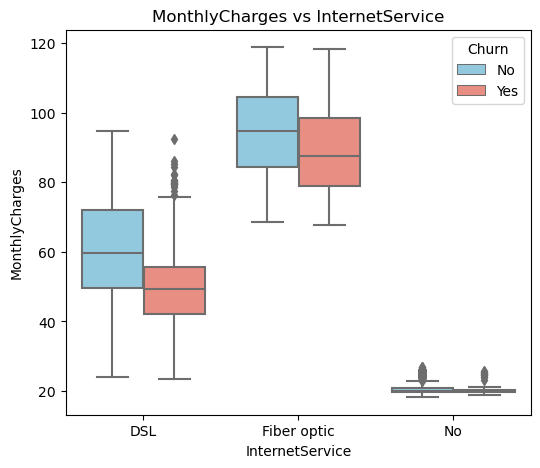

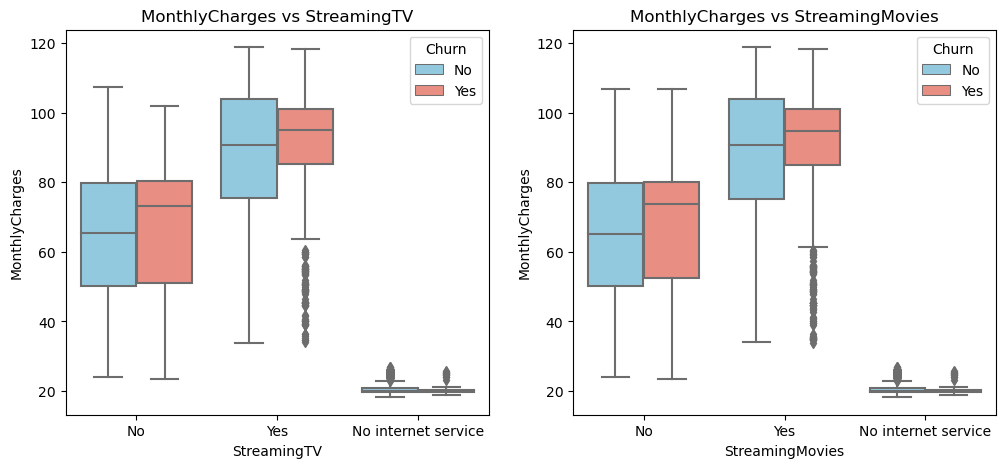

In [39]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(list_2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = list_2[i],y = 'MonthlyCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + list_2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = list_2[2],y = 'MonthlyCharges',data = data,hue = 'Churn',palette = colors);
plt.title('MonthlyCharges vs ' + list_2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(list_2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = list_2[i + 3],y = 'MonthlyCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + list_2[i + 3]);

* El costo mensual de los cables de fibra óptica es muy alto. Por lo tanto, podría ser la razón de la alta cancelación de clientes. 

* Del mismo modo, el costo mensual de StreamingTV y StreamingMovies es bastante alto. 

* El rango de cargos mensuales para el servicio telefónico va de 25 a 85, pero los clientes piensan en cancelar el servicio a partir de un valor de 75 en los cargos mensuales.

**MonthlyCharges vs Grupo 2: OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |**

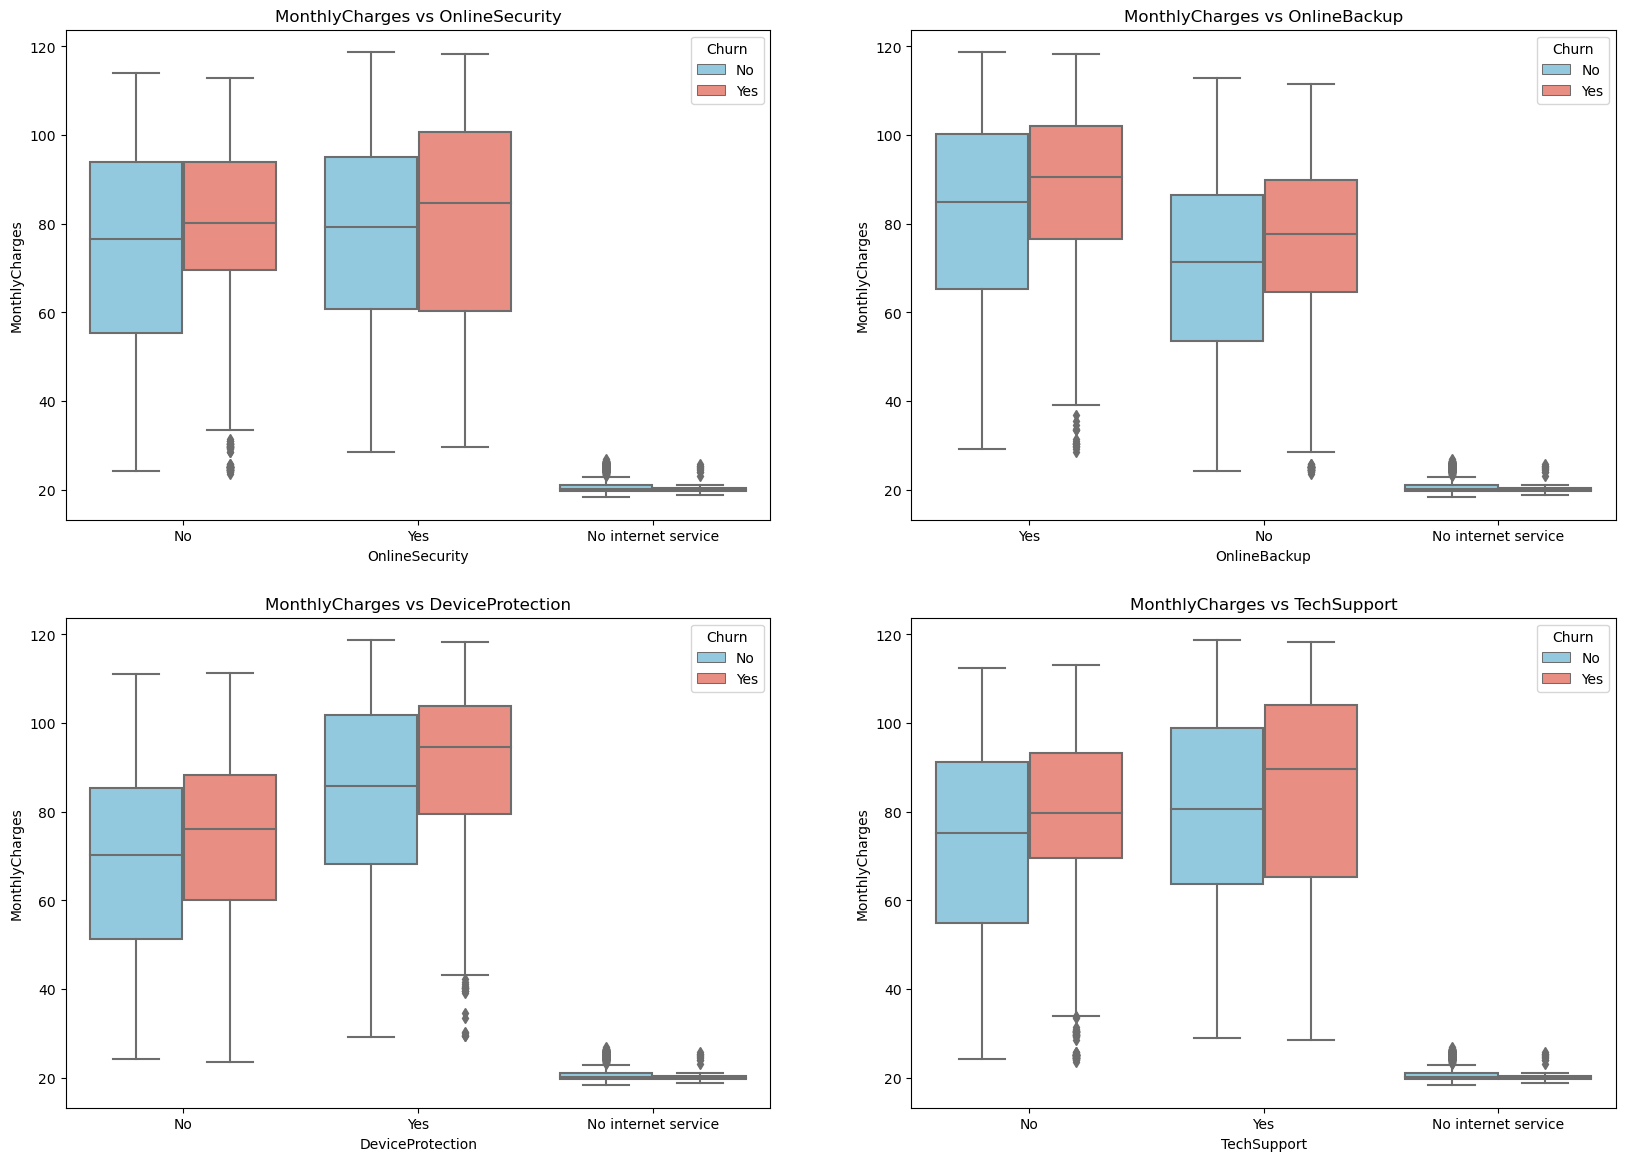

In [40]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(list_2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = list_2[i - 4],y = 'MonthlyCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + list_2[i-4]);


* Para OnlineSecurity, OnlineBackup, DeviceProtection y TechSupport, el rango de valores va desde aproximadamente 50 hasta 100. 

* Los clientes que se suscriben a estos servicios probablemente no piensan en cancelar la suscripción debido a los cargos mensuales, ya que el rango de valores de los clientes que se dan de baja y continúan es casi el mismo.

**MonthlyCharges vs Grupo 3: Contract | PaperlessBilling | PaymentMethod |**

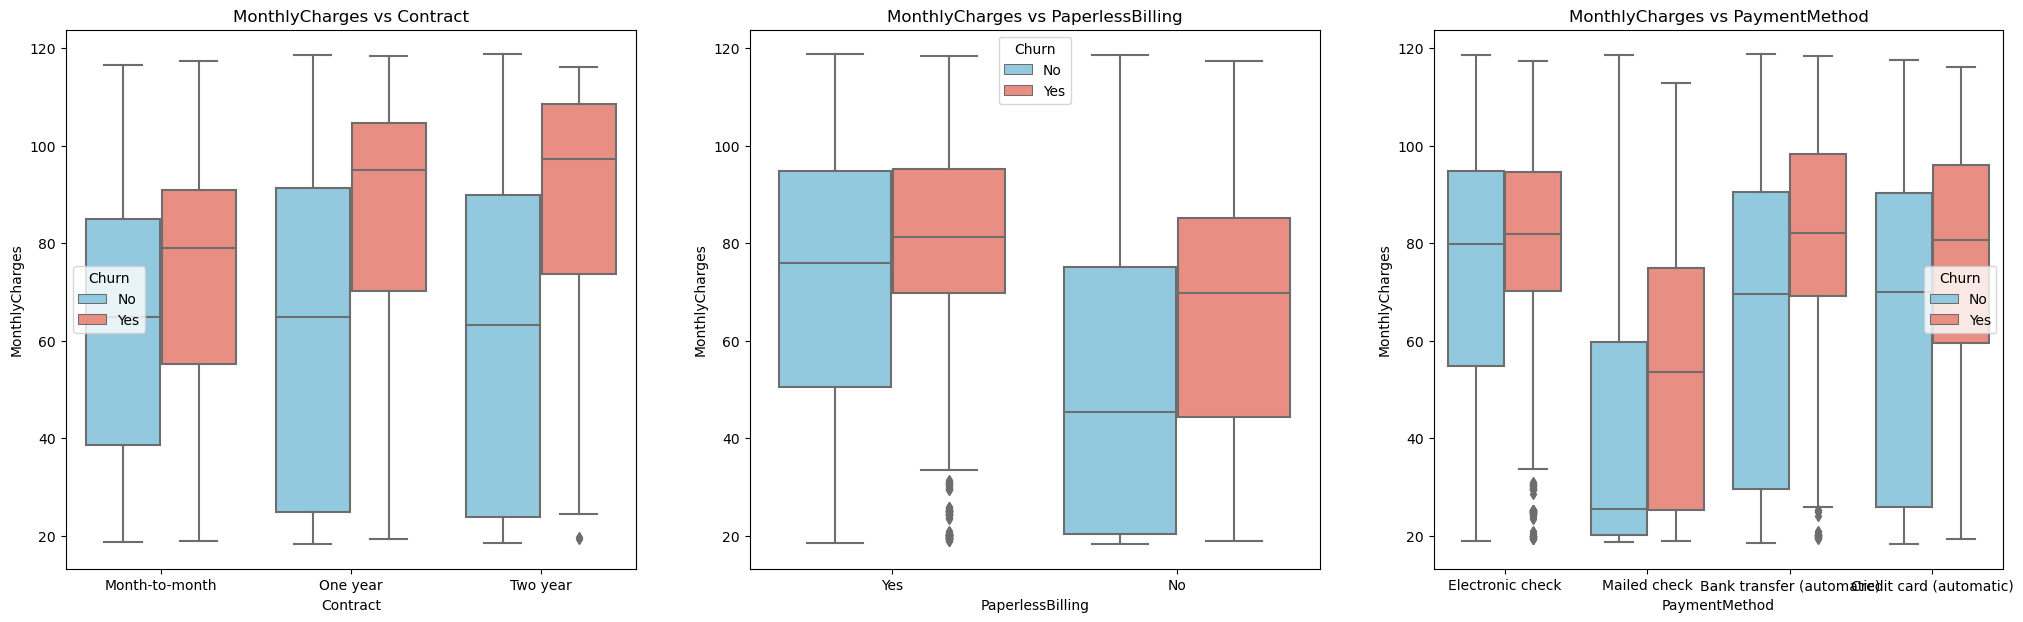

In [41]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

for i in range(len(list_3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = list_3[i],y = 'MonthlyCharges',data = data,hue = 'Churn',palette = colors);
    title = 'MonthlyCharges vs ' + list_3[i]
    plt.title(title);

*  El límite inferior de los cargos mensuales es más alto para el contrato de Mes a Mes que para los contratos de un año y dos años. Sin embargo, el límite inferior de los clientes que interrumpen los servicios es más bajo para el contrato de Mes a Mes.

*  El límite inferior del pago electrónico es muy alto y puede ser un factor importante por el cual los clientes se resisten a usarlo. Mientras que el pago por correo tiene los valores iniciales más bajos de clientes que abandonaron y continuaron.

**3.8 Total Charges vs Variables Categoricas en relacion a la Variable Objetivo (Churn):**

**TotalCharges vs grupo 1: Customer Information : gender | SeniorCitizen | Partner | Dependents |**

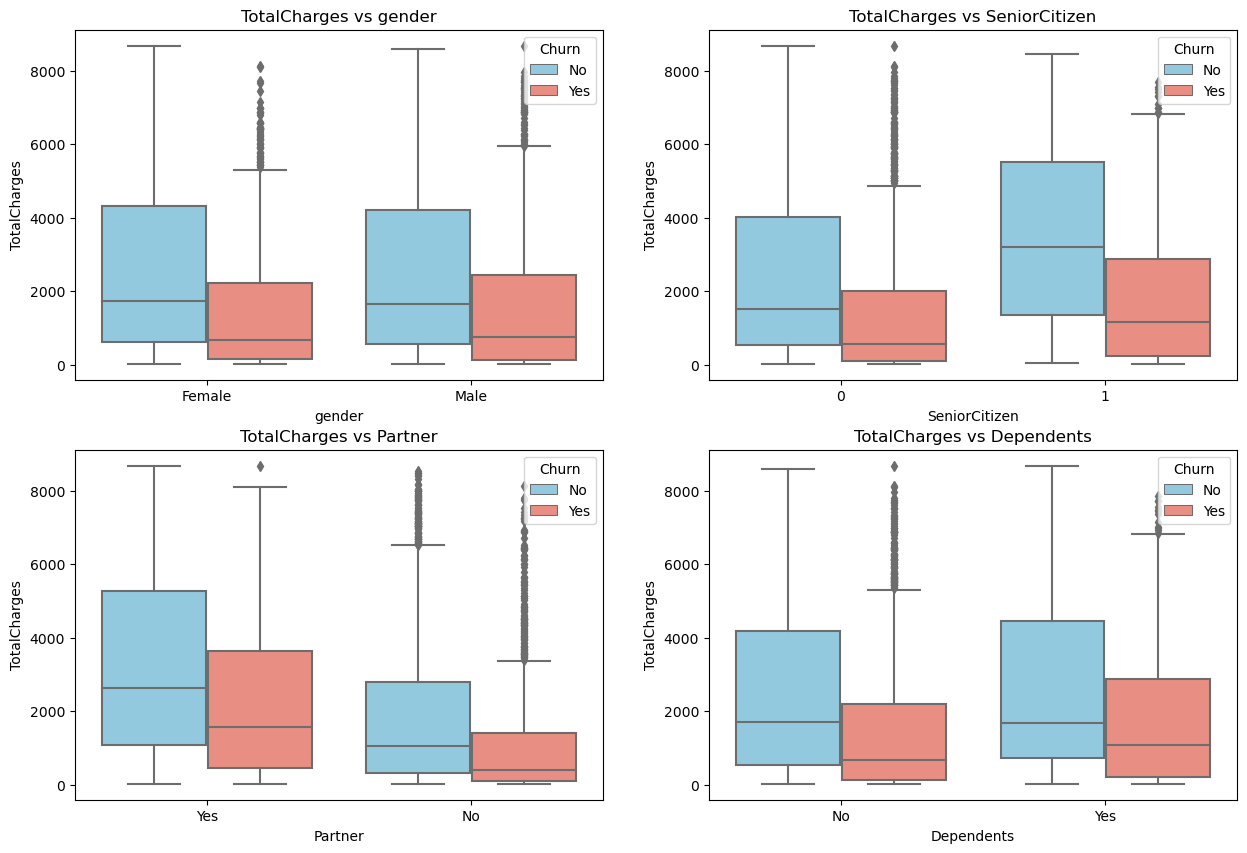

In [42]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = list_1[i],y = 'TotalCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + list_1[i]);


* El total de cargos para clientes masculinos y femeninos es bastante similar. 

* Los clientes ancianos que continuaron con los servicios tienen valores iniciales y finales más altos de TotalCharges. Los clientes que viven con su pareja tienen un valor medio más alto de TotalCharges en comparación con los que viven solos.

**TotalCharges vs Grupo 2: Services Subscribed by the Customer: PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |**

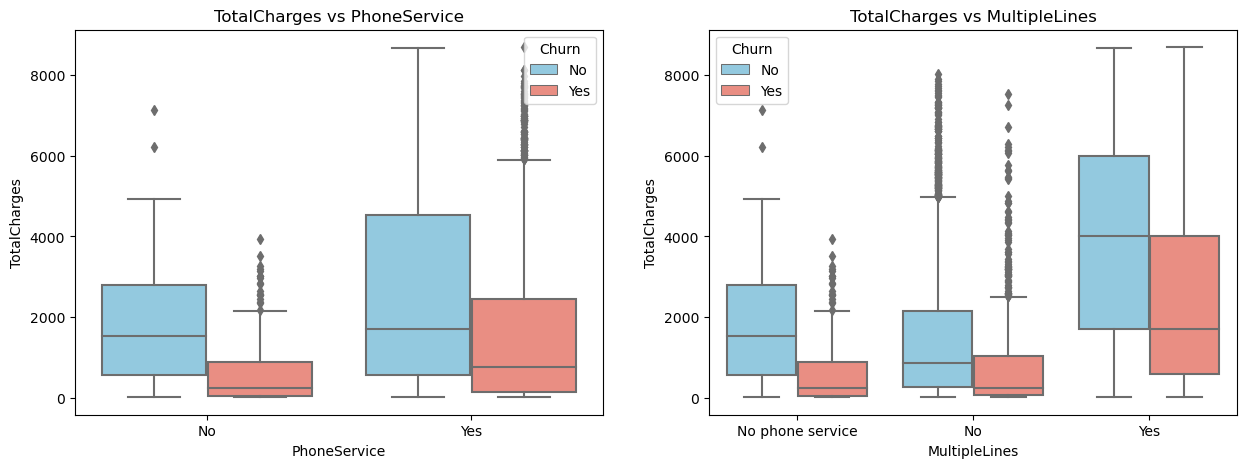

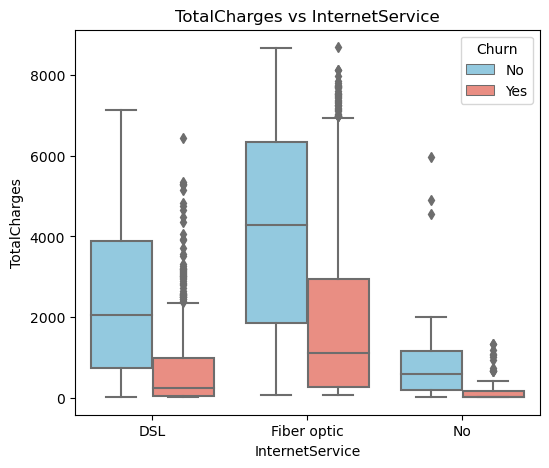

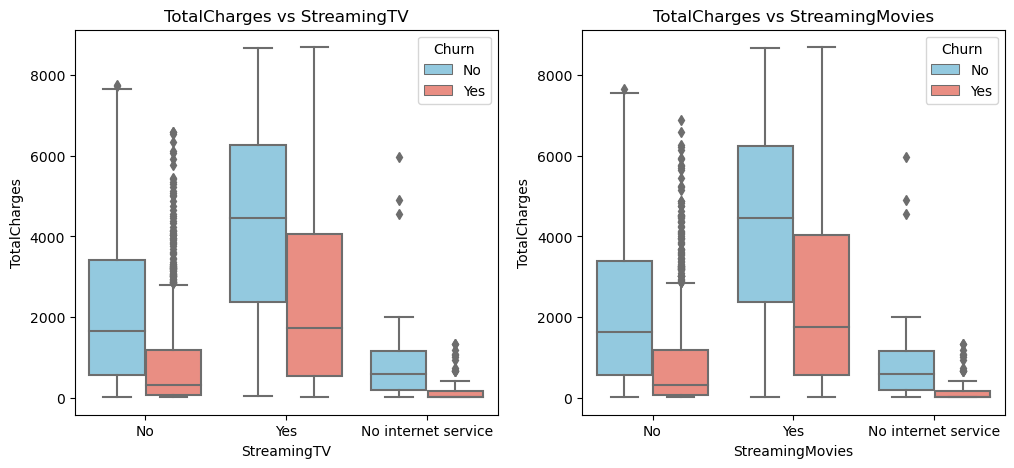

In [43]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(list_2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = list_2[i],y = 'TotalCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + list_2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = list_2[2],y = 'TotalCharges',data = data,hue = 'Churn',palette = colors);
plt.title('TotalCharges vs ' + list_2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(list_2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = list_2[i + 3],y = 'TotalCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + list_2[i + 3]);


* El total de cargos del servicio telefónico oscila entre 0 y 4000. Sin embargo, los clientes comienzan a dudar sobre el servicio telefónico cuando los cargos totales alcanzan alrededor de 1000. 

* Del mismo modo, los clientes comienzan a dudar de pagar alrededor de 2000 por líneas múltiples. Sin embargo, algunos clientes parecen estar desesperados por tener múltiples líneas, ya que pagan un valor de alrededor de 6000 por ellas.

* Cuando se trata de pagar por cables de fibra óptica, los clientes prueban los productos pagando alrededor de 2000. 

* Similar a la fibra óptica, para StreamingTV y StreamingMovies, los clientes que continúan con los servicios pagan de 3000 a 6000.

**TotalCharges vs Grupo 2: OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |**

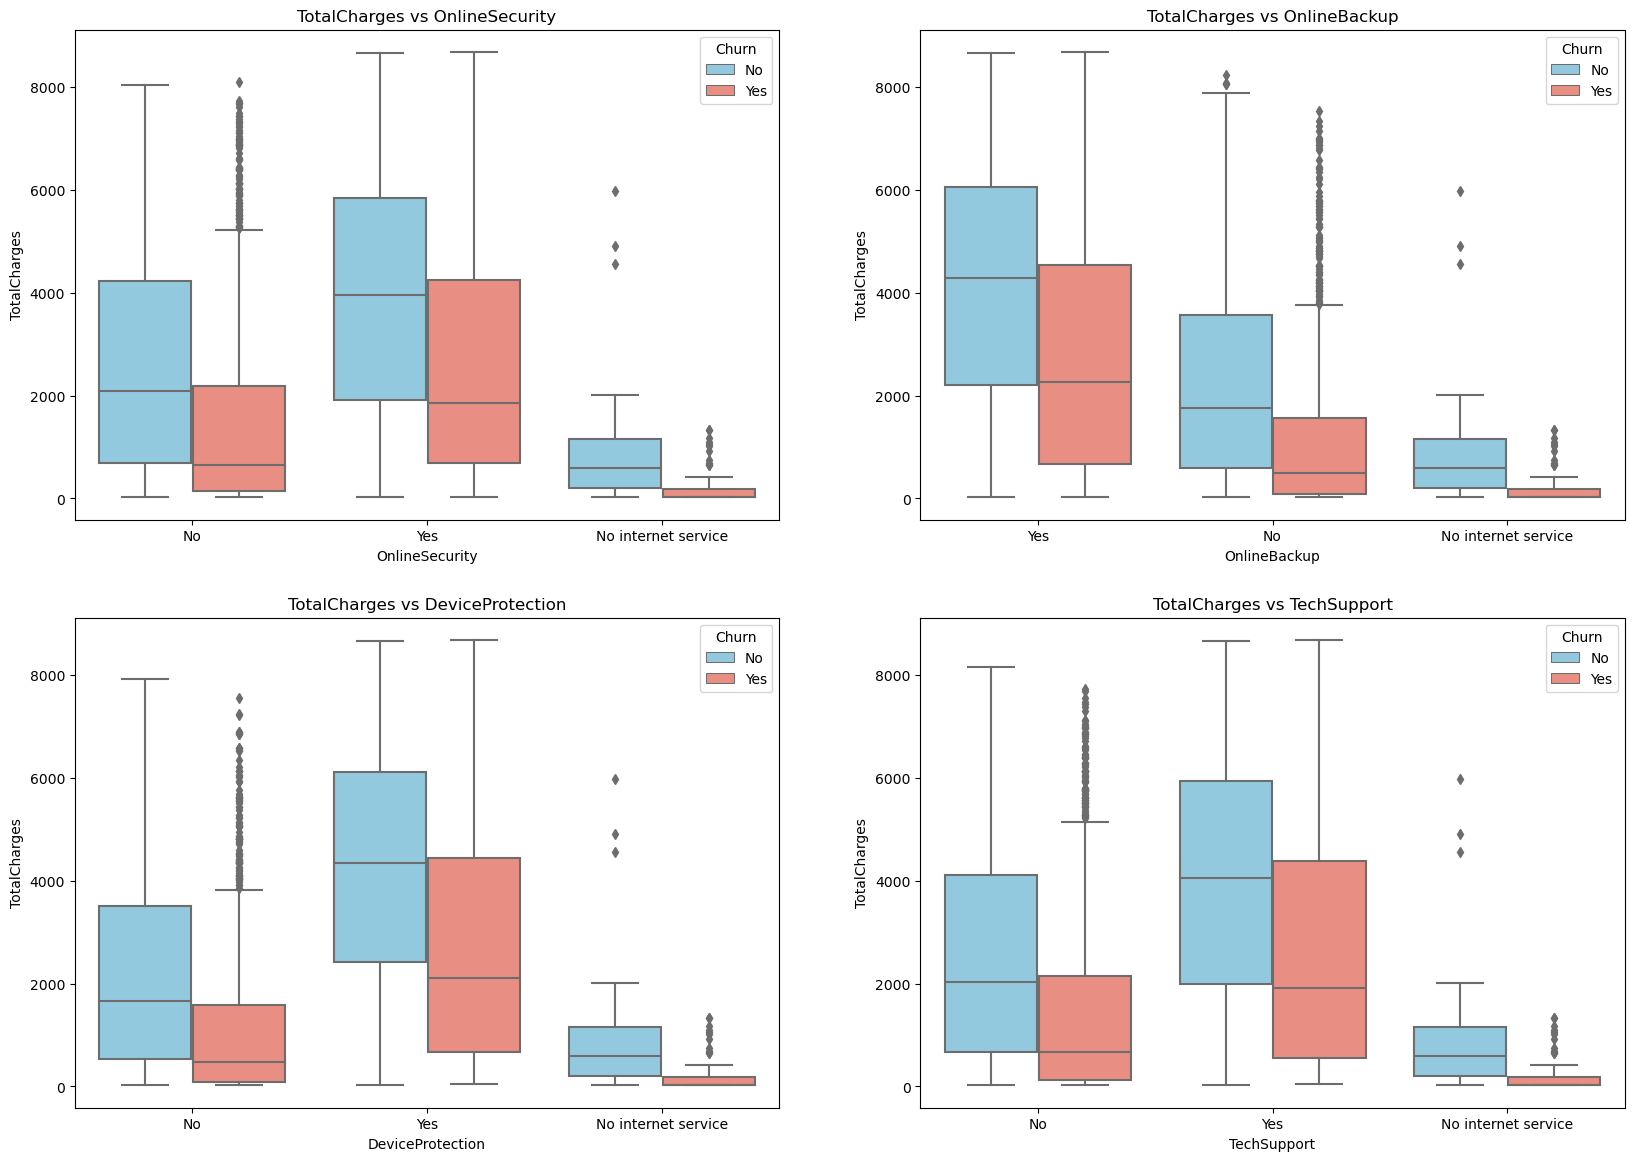

In [44]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(list_2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = list_2[i - 4],y = 'TotalCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + list_2[i-4]);

* Para todas las características mencionadas anteriormente, los clientes comienzan a dudar de pagar alrededor de 2000. Este valor medio de los clientes que cancelan el servicio está muy cerca del límite inferior de los clientes que continúan con este servicio.

* Los clientes que no cancelan están dispuestos a pagar de 2000 a 6000 en cargos totales.

**TotalCharges vs Grupo 3 : Contract | PaperlessBilling | PaymentMethod |**

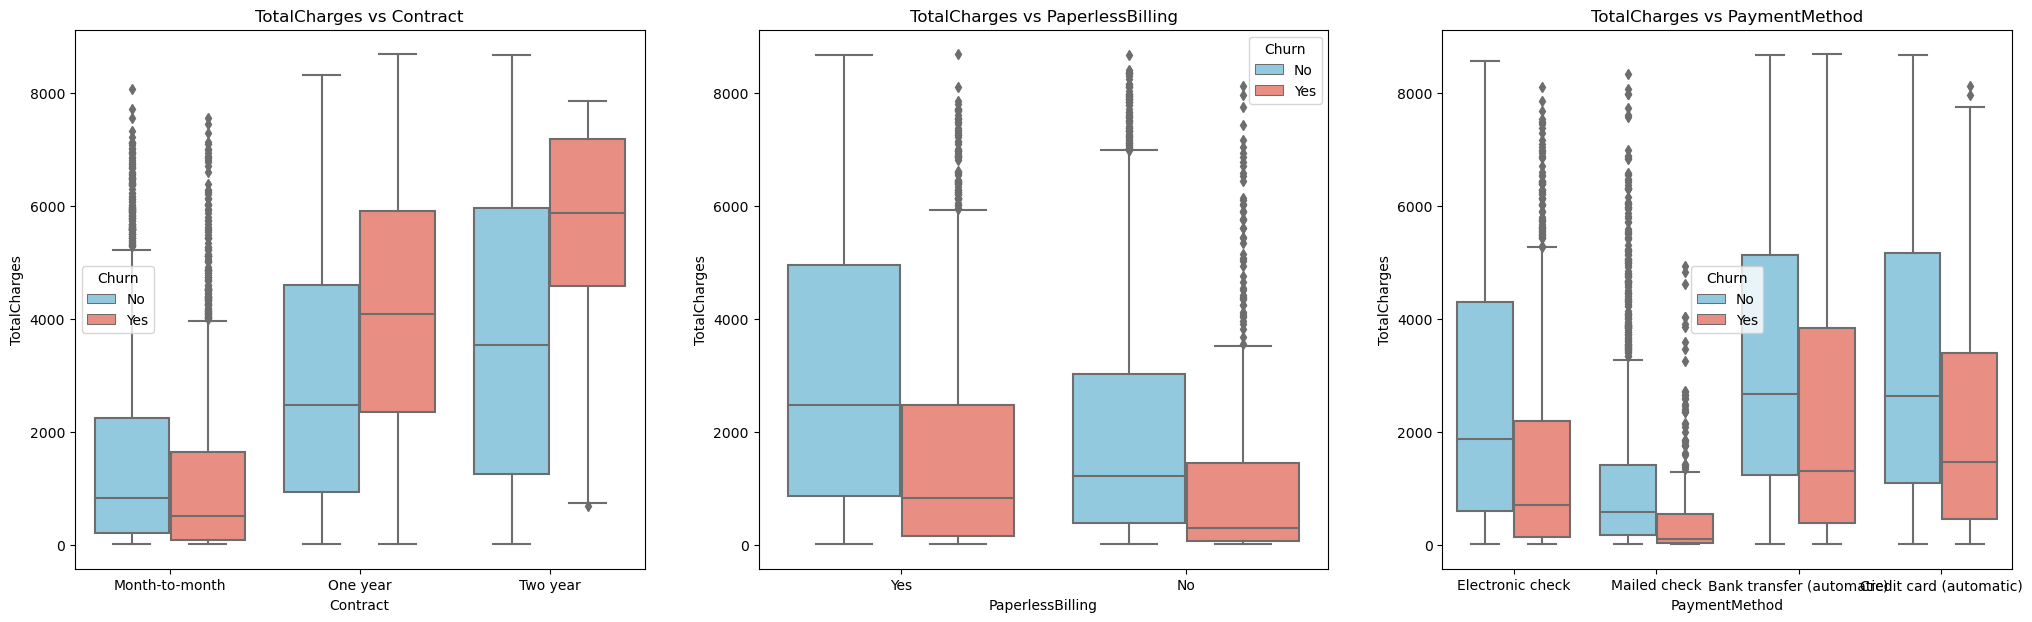

In [45]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

for i in range(len(list_3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = list_3[i],y = 'TotalCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + list_3[i]);

* Los valores medios de los clientes que deciden darse de baja de los servicios que tienen contratos de un año y dos años son altos, alrededor de 4000 y 6000 respectivamente. Algunos clientes con contratos de dos años incluso pagaron alrededor de 7000.

* En cuanto al método de pago, los clientes dudan en pagar usando cheque electrónico para un rango más corto de 0 a 2000, mientras que para la transferencia bancaria (automática) y la tarjeta de crédito (automática) este rango es de alrededor de 0 a 4000.

**3.9 Variables Categoricas vs Variables Numéricas en relacion a la variable objetivo (Churn)**

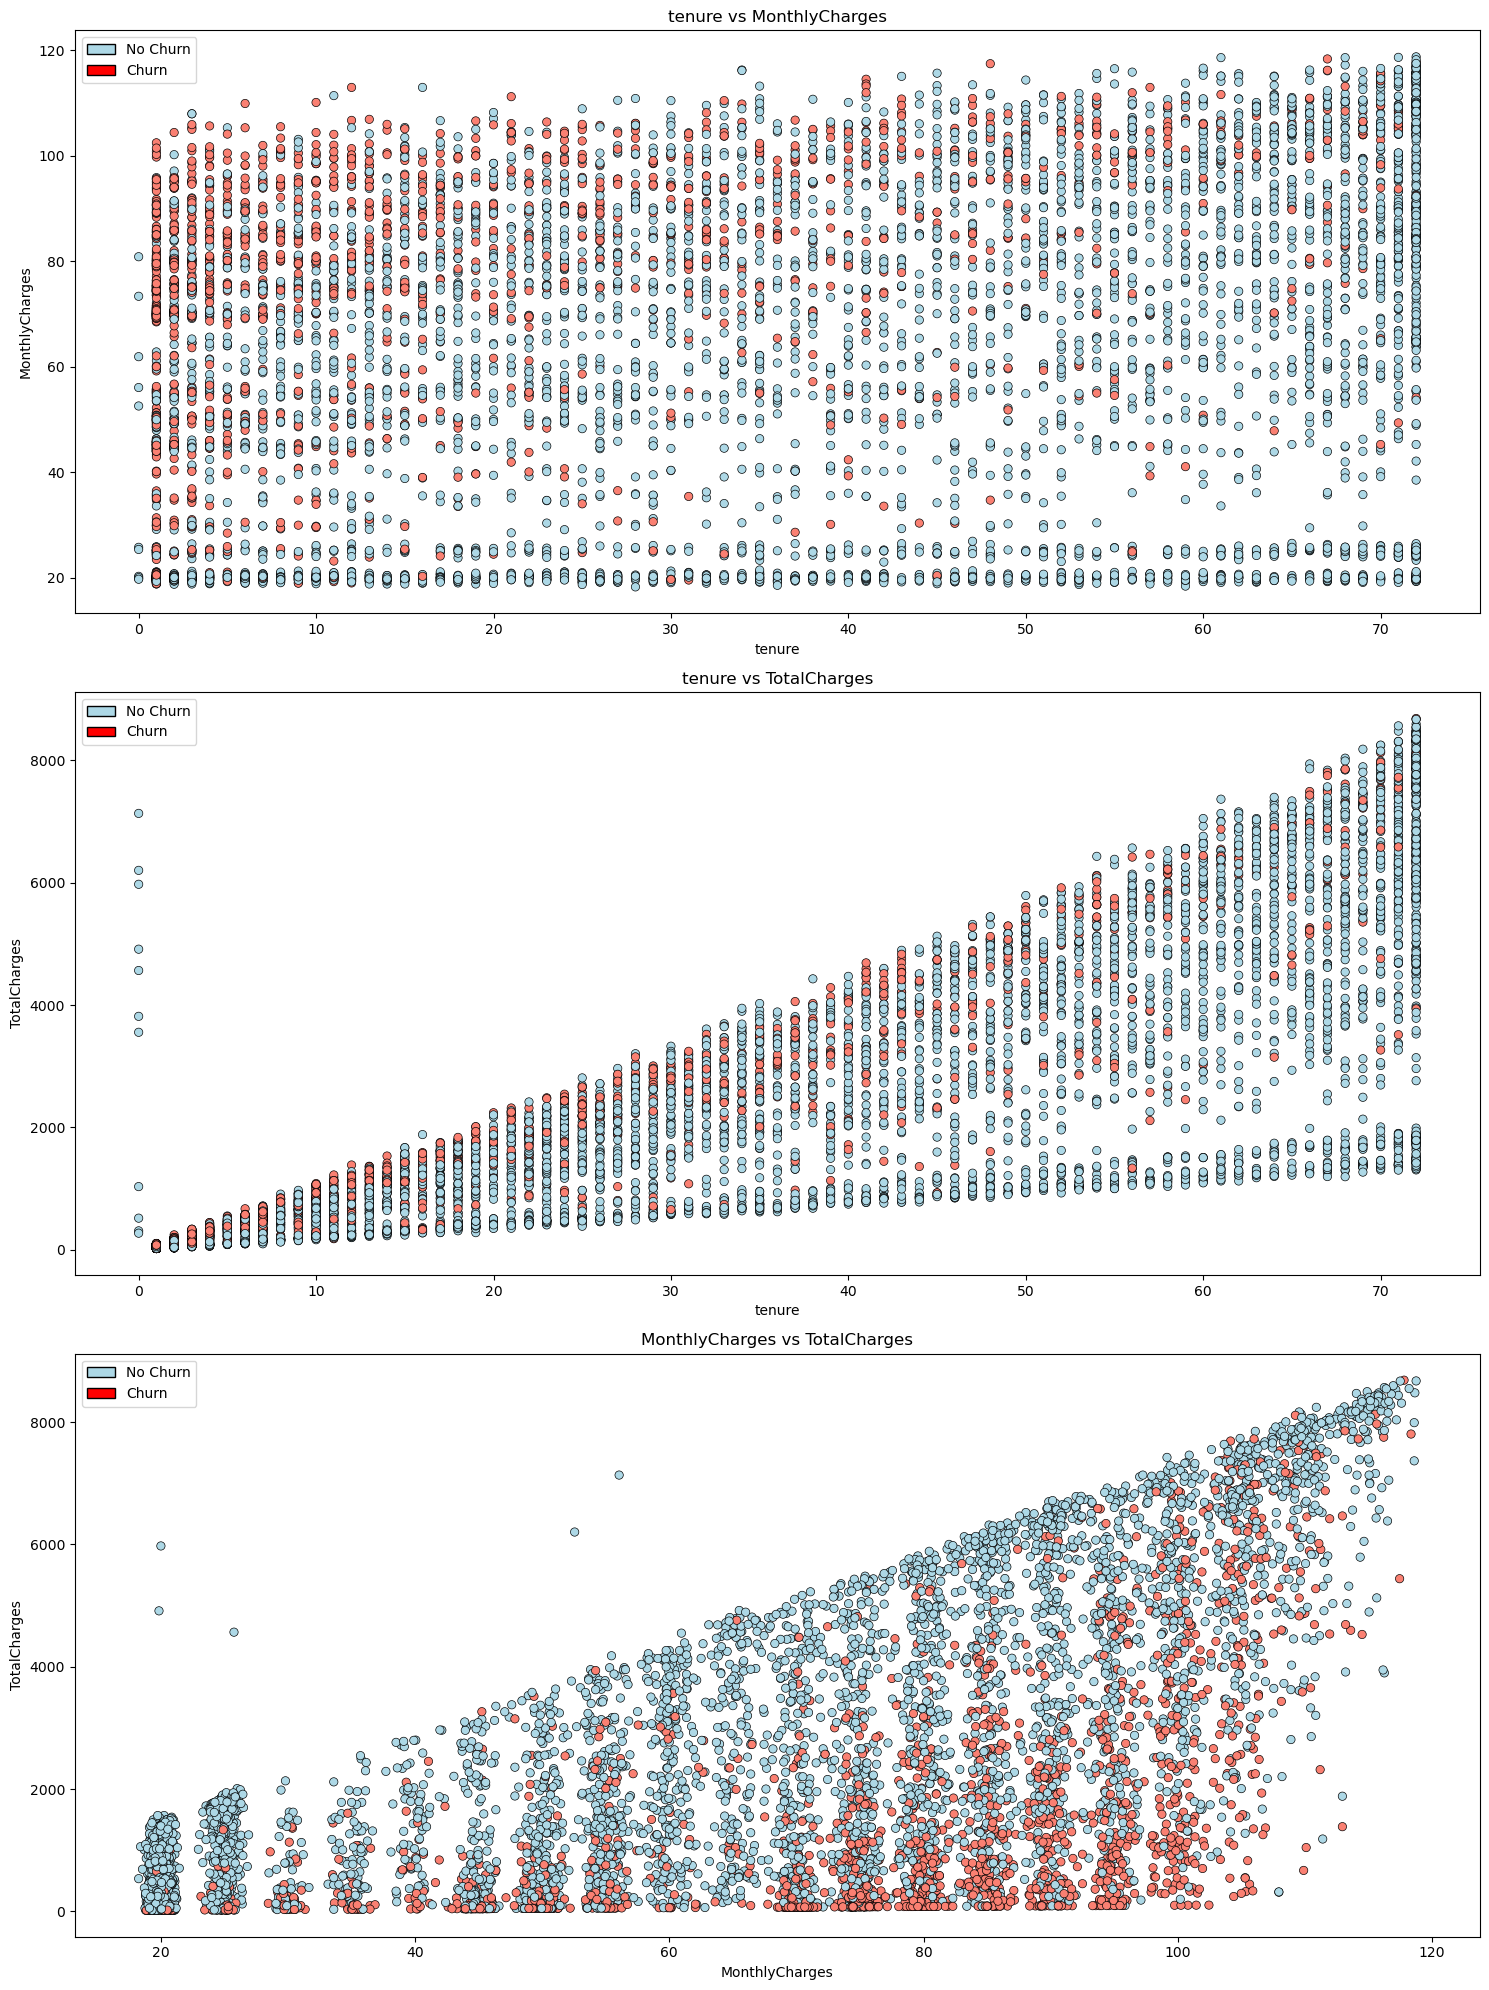

In [46]:
a = 0
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,20))
# Definir la paleta con llaves 0 y 1
palette_dict = {0: "lightblue", 1: "salmon"}

# Definir los parches para la leyenda
legend_elements = [mpatches.Patch(facecolor='lightblue', edgecolor='black', label='No Churn'),
                   mpatches.Patch(facecolor='red', edgecolor='black', label='Churn')]

for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(3, 1, a)
            sns.scatterplot(x=numerical_features[i],
                            y=numerical_features[j],
                            data=df,
                            hue='Churn',
                            palette=palette_dict,
                            edgecolor='black')
            plt.legend(handles=legend_elements, loc='upper left')
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

plt.tight_layout()
plt.show()


* Para el período de tenencia de 0 a 20 meses, la cancelación de clientes ocurre en cualquier valor de cargos mensuales. Sin embargo, para un período de tenencia de 20 a 60 meses, los clientes en el extremo superior de los valores de cargos mensuales, es decir, entre 70 y 120, comienzan a darse de baja de los servicios.

* En cuanto a la relación entre TotalCharges y tenencia, a medida que aumenta la tenencia, también aumentan los TotalCharges. Los clientes que optan por cancelar sus planes son aquellos que son cobrados con el monto más alto durante su período de tenencia, junto con algunos clientes cuyos cargos totales se encuentran en el rango medio.

* Los clientes parecen haber decidido cancelar sus suscripciones cuando los cargos mensuales alcanzan los 70 y más.

## **Resumen de Analisis exploratorio de datos:**

**Basado en el análisis exploratorio de datos (EDA), el siguiente orden o rango de valores tiende a resultar en la cancelación de clientes:**

**Variables Categóricas (Orden):**

* gender: Masculino = Femenino
* SeniorCitizen: No SeniorCitizen > SeniorCitizen
* Partner: Sin Pareja > Pareja
* Dependents: Sin Dependientes > Dependientes
* PhoneService: ServicioTelefónico > Sin ServicioTelefónico
* MultipleLines: MúltiplesLíneas > Sin MúltiplesLíneas > Sin ServicioTelefónico
* InternetService: Fibra Óptica > DSL > Sin Servicio de Internet
* OnlineSecurity: Ausente > Presente > Sin Servicio de Internet
* OnlineBackup: Ausente > Presente > Sin Servicio de Internet
* DeviceProtection: Ausente > Presente > Sin Servicio de Internet
* TechSupport: Ausente > Presente > Sin Servicio de Internet
* StreamingTV: Ausente > Presente > Sin Servicio de Internet
* StreamingMovies: Ausente > Presente > Sin Servicio de Internet
* Contract: Mes a Mes > Un Año > Dos Años
* PaperlessBilling: Presente > Ausente
* PaymentMethod: Cheque Electrónico > Cheque por Correo > Transferencia Bancaria (automática) > Tarjeta de Crédito (automática)

**Variables Numéricas (Rango):**

* tenure: 1 - 5 meses
* MonthlyCharges: 65 - 105
* TotalCharges: 0 - 1000

# **4. Ingeniería de Características (FE)**

**4.1 Escalado de datos** 

In [47]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

MinMaxScaler = MinMaxScaler() #Para la normalizacion de los datos
StandarScaler = StandardScaler() #Para el escalado de los datos.

df.drop(columns = ['MonthlyCharges_Group','TotalCharges_Group'], inplace = True)

df['tenure'] = MinMaxScaler.fit_transform(df[['tenure']])
df['MonthlyCharges'] = MinMaxScaler.fit_transform(df[['MonthlyCharges']])
df['TotalCharges'] = MinMaxScaler.fit_transform(df[['TotalCharges']])
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0    0.01             0   
1       1              0        0           0    0.47             1   
2       1              0        0           0    0.03             1   
3       1              0        0           0    0.62             0   
4       0              0        0           0    0.03             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2            0.12          0.00      0  
1                 0              3            0.39          0.22      0  
2                 1              3            0.35          0.01      1  
3                 0              0            0.24          0.21      0  
4                 1              2            0.52          0.02      1


Es crucial escalar los datos en el aprendizaje automático porque los modelos no entienden inherentemente las unidades de los valores de las características. Tratan cada entrada como un valor numérico sin tener en cuenta su significado en el mundo real. Por lo tanto, la escalabilidad se vuelve necesaria para asegurar que todas las características contribuyan por igual a las predicciones del modelo.

**Hay dos opciones principales para escalar los datos:**

**1. Normalización:** Esta técnica se aplica a características cuyos datos no siguen una distribución normal (gaussiana). Reescala los valores de una característica a un rango entre 0 y  En nuestro caso, características como tenure, MonthlyCharges y TotalCharges, que mostraron una distribución sesgada a la derecha y bimodal, se normalizan.

**2. Estandarización:** Este método se utiliza para características que siguen una distribución normal o tienen valores significativamente más grandes o más pequeños que los de otras características. La estandarización transforma los valores de una característica para que tengan una media de 0 y una desviación estándar de 1. En tus datos, ninguna de las características requiere estandarización según el análisis proporcionado.

Al aplicar la normalización y la estandarización de manera apropiada, te aseguras de que tus características estén en una escala similar, lo que puede mejorar el rendimiento y la estabilidad de los modelos de aprendizaje automático, especialmente aquellos sensibles a las escalas de características, como los algoritmos basados en distancias o las redes neuronales.






**4.2 Matrix de Correlación**

<Axes: >

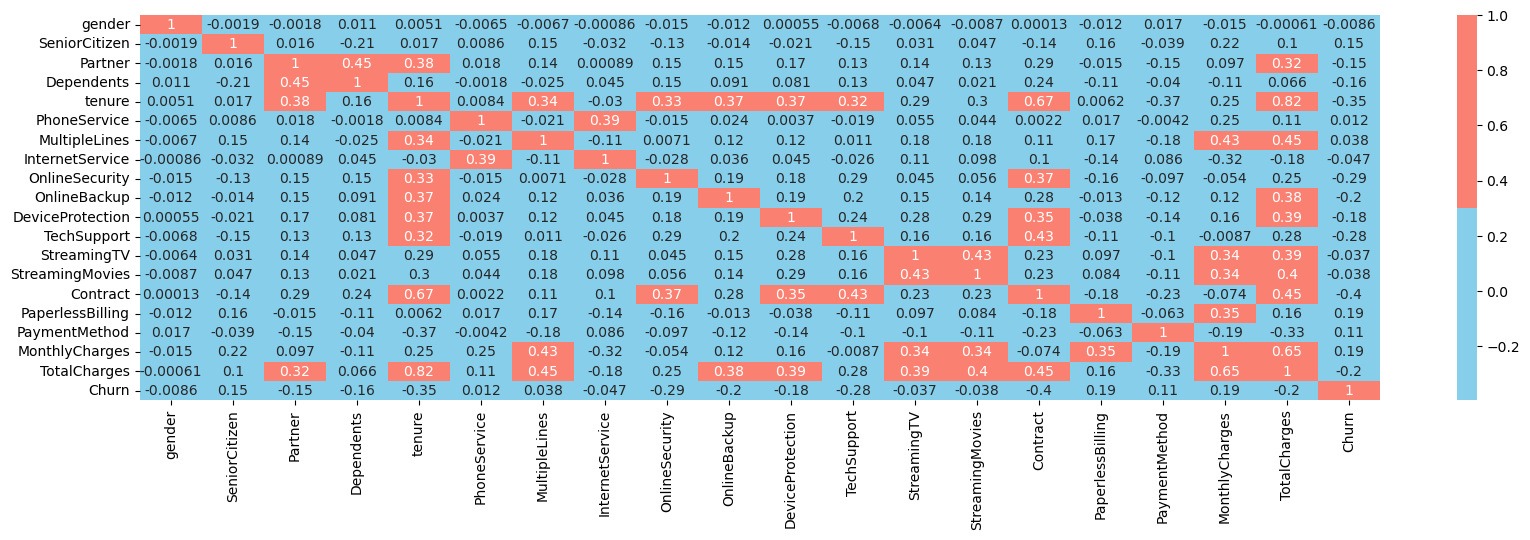

In [48]:
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(),cmap= colors, annot = True)

* **Es una matriz enorme con demasiadas características. Solo revisaremos la correlación con respecto a "Churn".**

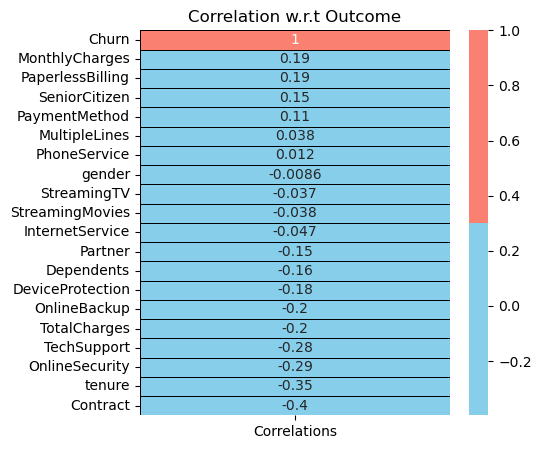

In [49]:
Matrix_Corr = df.corrwith(df['Churn']).sort_values(ascending = False).to_frame()
Matrix_Corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(Matrix_Corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');


* MulipleLines, PhoneService, género, StreamingTV, StreamingMovies e InternetService no muestran ningún tipo de correlación. Eliminamos las características con un coeficiente de correlación entre (-0.1, 0.1).

* Las características restantes muestran una correlación significativa positiva o negativa.

**4.3 Selección de Variables para Variables categóricas:**

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif 

**Test Cuadrados Chi**

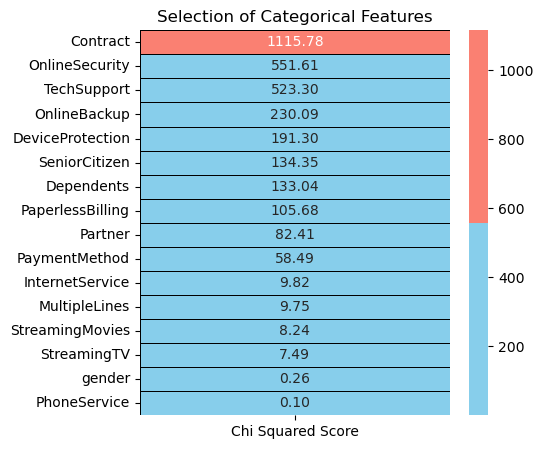

In [51]:
features = df.loc[:,categorical_features]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');


* **PhoneService, gender, StreamingTV, StreamingMovies, MultipleLines, and InternetService muestran una baja correlacion con Churn**

**4.4 Selección de Variables para Variables numéricas:**

In [52]:
from sklearn.feature_selection import f_classif

**Test de ANNOVA**

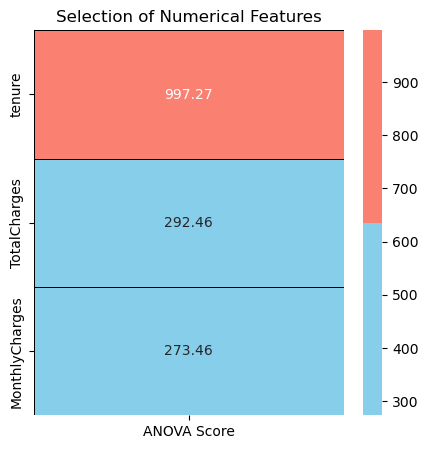

In [53]:
features = df.loc[:,numerical_features]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');


* Según el test de ANOVA, cuanto mayor sea el valor del puntaje de ANOVA, mayor será la importancia de la característica.

* De acuerdo a los resultados anteriores, necesitamos incluir todas las características numéricas para el modelado.

In [54]:
df.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df.head()

SeniorCitizen  Partner  Dependents  tenure  OnlineSecurity  OnlineBackup  \
0              0        1           0    0.01               0             2   
1              0        0           0    0.47               2             0   
2              0        0           0    0.03               2             2   
3              0        0           0    0.62               2             0   
4              0        0           0    0.03               0             0   

   DeviceProtection  TechSupport  Contract  PaperlessBilling  PaymentMethod  \
0                 0            0         0                 1              2   
1                 2            0         1                 0              3   
2                 0            0         0                 1              3   
3                 2            2         1                 0              0   
4                 0            0         0                 1              2   

   MonthlyCharges  TotalCharges  Churn  
0            0.12          0.00      0  
1            0.39          0.22      0  
2            0.35          0.01      1  
3            0.24          0.21      0  
4            0.52          0.02      1

# **5. Análisis de Predicción**

**5.1 Desequilibrio de clases**

A partir del Análisis Exploratorio de Datos (EDA), se observa que el conjunto de datos está desbalanceado (con un 26% de casos positivos para la Churn y un 74% de casos negativos de Churn), por lo que es esencial balancear los datos para asegurar que el modelo no se sesgue hacia la clase mayoritaria. Con este fin, se utiliza la Técnica de Sobremuestreo Sintético de la Clase Minoritaria (SMOTE, por sus siglas en inglés), la cual genera muestras sintéticas para la clase minoritaria. A su vez se utiliza
RandomUnderSampler para reducir la clase mayoritaria.

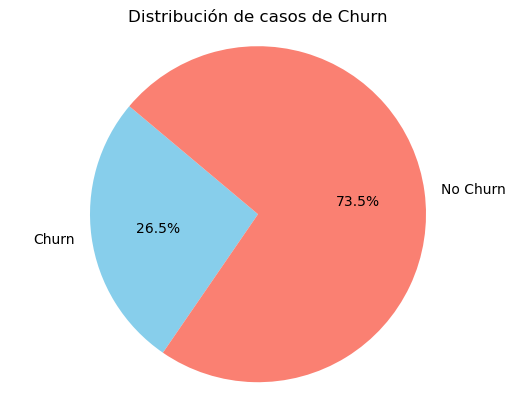

In [55]:
#Mostramos la distribucion de casos para confirmar

# Porcentajes de casos de diabetes
positivos_Churn = (df['Churn'] == 1).sum()
negativos_Churn = (df['Churn'] == 0).sum()
porcentajes = [positivos_Churn, negativos_Churn]

# Etiquetas para los porcentajes
etiquetas = ['Churn', 'No Churn']

# Colores para las porciones
colores = colors

# Crear el gráfico de torta
plt.pie(porcentajes, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)

# Título del gráfico
plt.title('Distribución de casos de Churn')

# Mostrar el gráfico
plt.axis('equal')
plt.show()

In [56]:
pip install lightgbm

In [57]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import ADASYN
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

### **Técnicas de Remuestreo**

* **SMOTE (Synthetic Minority Over-sampling Technique):**

SMOTE es una técnica de sobremuestreo utilizada para abordar el desequilibrio de clases en conjuntos de datos, específicamente cuando la clase minoritaria está subrepresentada. Lo que hace SMOTE es generar muestras sintéticas para la clase minoritaria mediante la interpolación de instancias existentes en el espacio de características. Básicamente, SMOTE crea nuevas instancias sintéticas de la clase minoritaria mediante la combinación de ejemplos cercanos de la misma clase.

* **RandomUnderSampler**:

El RandomUnderSampler es una técnica de remuestreo utilizada en el contexto de problemas de desequilibrio de clases en conjuntos de datos de aprendizaje automático.

El RandomUnderSampler aborda este problema seleccionando aleatoriamente una muestra de la clase mayoritaria (o clases) para que esté más equilibrada con respecto a la clase minoritaria. Esto se logra eliminando aleatoriamente instancias de la clase mayoritaria hasta que la proporción de clases en el conjunto de datos sea más equitativa.

In [58]:
# Definimos la estrategia de sobre muestreo y sub muestreo con random_state
over = SMOTE(sampling_strategy=0.5, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

In [59]:
#Separamos los datos en objetivo y las variables a utilizar

X = df.drop('Churn', axis=1)
y = df['Churn']

### **5.2 Pipeline**

Las pipelines de imblearn, son herramientas poderosas utilizadas para automatizar y estructurar flujos de trabajo en el procesamiento de datos desbalanceados en problemas de aprendizaje automático.

**Algunos de los principales beneficios son:**

1. Preprocesamiento y remuestreo integrados: Las pipelines de imblearn permiten combinar pasos de preprocesamiento de datos, como escalado, selección de características, con técnicas de remuestreo específicas para abordar el desequilibrio de clases, como SMOTE o RandomUnderSampler.

2. Facilitan la replicación y validación cruzada: Al encapsular todos los pasos de preprocesamiento, remuestreo y modelado en una sola entidad, las pipelines facilitan la replicación de experimentos y la aplicación de validación cruzada de manera más eficiente.

3. Evitan fugas de datos: Al tener todos los pasos de procesamiento dentro de la pipeline, se reduce el riesgo de fugas de datos, ya que las transformaciones se aplican de manera consistente a los datos en cada iteración.

In [60]:
#Creamos una PipeLine que preprocese los datos y luego entrene al clasificador


clf = imbPipeline(steps=[
                        ('over', over),
                        ('under',under),
                        ('classifier', RandomForestClassifier(random_state=42))
                        ])

### **5.3 Construcción del modelo y Ajuste de hiperparámetros**

Se construye una Pipeline que primero aplica los pasos de preprocesamiento y luego entrena un modelo en los datos. Utilizamos un modelo de RandomForestClassifier, que es un algoritmo popular y potente para tareas de clasificación.

Los hiperparámetros del modelo se ajustan utilizando GridSearchCV, que realiza una búsqueda exhaustiva sobre los valores de parámetro especificados para el estimador. El mejor modelo en rendimiento se selecciona basado en la validación cruzada.

In [61]:
#Definimos los Hiperparámetros y los valores a testear

param_grid_clf = {
    'classifier__n_estimators': [100, 150],
    'classifier__criterion': ['entropy'],
    'classifier__max_depth': [16, 18],
    'classifier__min_samples_split': [2, 3, 4],
    'classifier__min_samples_leaf': [1, 2, 3]
}

In [62]:
# Create Grid Search object
clf_grid_search = GridSearchCV(clf, param_grid_clf, cv=5)

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf_grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", clf_grid_search.best_params_)

Best Parameters:  {'classifier__criterion': 'entropy', 'classifier__max_depth': 16, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}


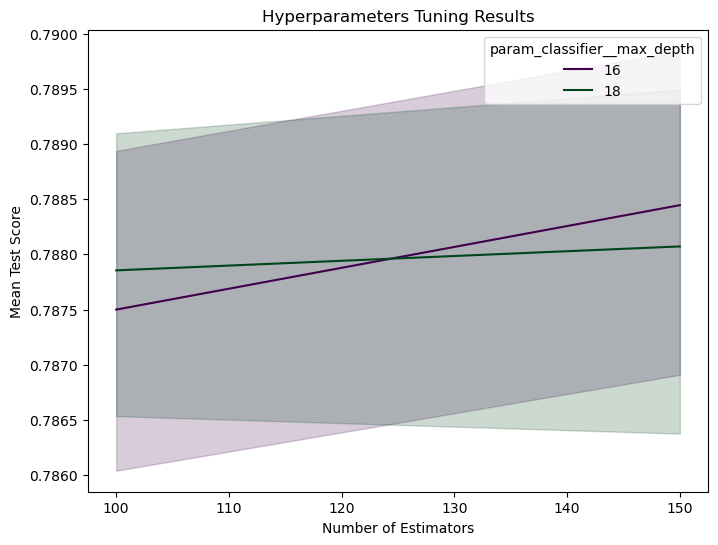

In [63]:
#Transformamos los resultados del GridSearchCV a un Dataframe y los graficamos.

resulst_df = pd.DataFrame(clf_grid_search.cv_results_)
plt.figure(figsize=(8,6))
sns.lineplot(data=resulst_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='PRGn')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

In [64]:
#Realizamos las predicciones en el conjunto de prueba utilizando el mejor modelo encontrado

y_pred = clf_grid_search.predict(X_test)

#Evaluamos el modelo
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f"PR-AUC Balanceado: {pr_auc}")

Model Accuracy:  0.8026969481902059
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1036
           1       0.63      0.61      0.62       373

    accuracy                           0.80      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409

PR-AUC Balanceado: 0.6716403280907002


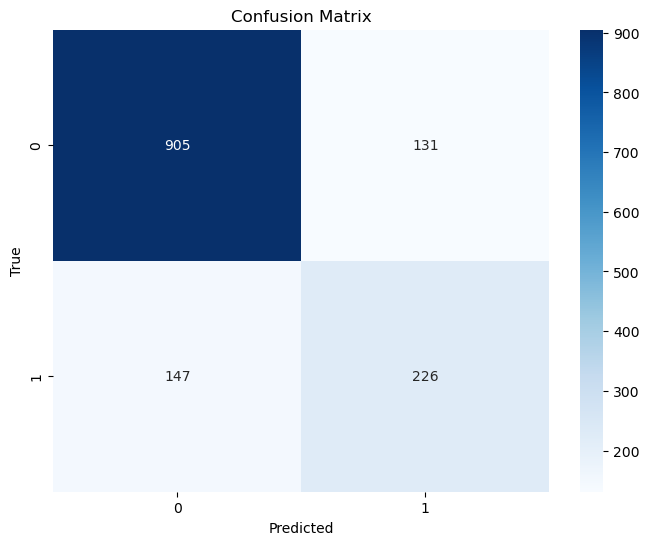

In [65]:
#Graficamos la matriz de confusión

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

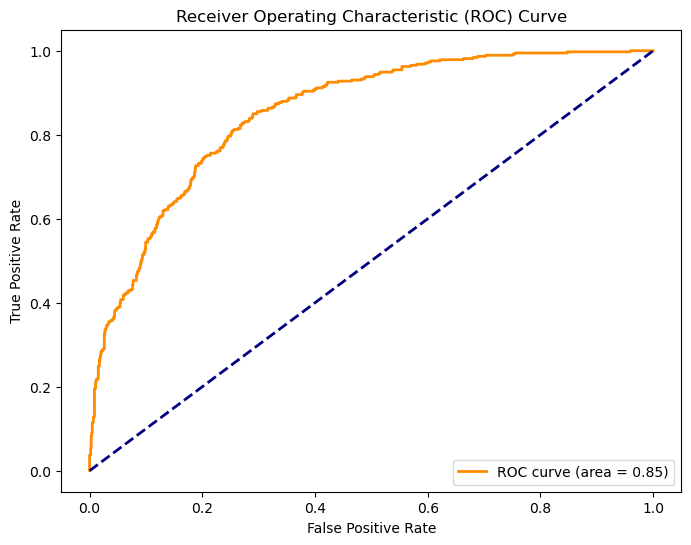

In [66]:
# Calcula las probabilidades de predicción para la clase positiva
y_score = clf_grid_search.predict_proba(X_test)[:,1]

# Calcula la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, _ = roc_curve(y_test, y_score)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Decision tree**

In [67]:
#Creamos una PipeLine que preprocese los datos y luego entrene al clasificador


dtree = imbPipeline(steps=[
                        ('over', over),
                        ('under',under),
                        ('classifier', DecisionTreeClassifier(random_state=42))
                        ])

In [68]:
#Definimos los Hiperparámetros y los valores a testear

param_grid_dtree = {
    'classifier__criterion': ['gini'],
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    }


In [69]:
# Create Grid Search object
grid_search_dtree = GridSearchCV(dtree, param_grid_dtree, cv=5)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search_dtree.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search_dtree.best_params_)

Best Parameters:  {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}


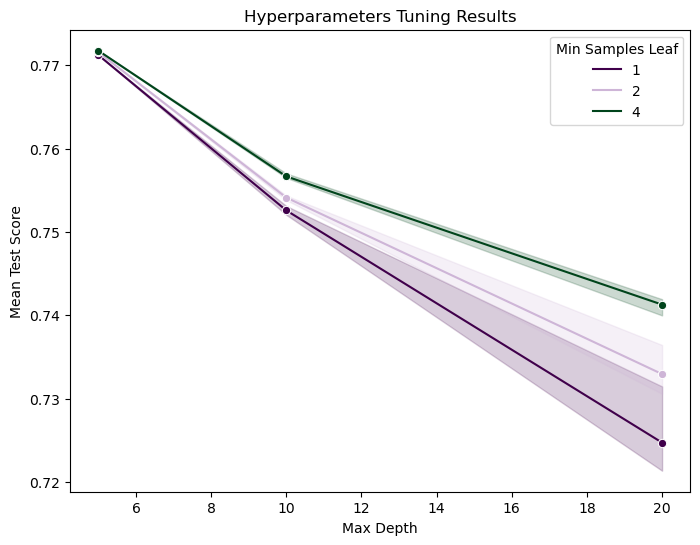

In [70]:
#Transformamos los resultados del GridSearchCV a un Dataframe y los graficamos.

resulst_df = pd.DataFrame(grid_search_dtree.cv_results_)
plt.figure(figsize=(8,6))
sns.lineplot(data=resulst_df, 
             x='param_classifier__max_depth', 
             y='mean_test_score', 
             hue='param_classifier__min_samples_leaf', 
             palette='PRGn',
             marker='o')

plt.title('Hyperparameters Tuning Results')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.legend(title='Min Samples Leaf')
plt.show()

In [71]:
#Realizamos las predicciones en el conjunto de prueba utilizando el mejor modelo encontrado

y_pred = grid_search_dtree.predict(X_test)

#Evaluamos el modelo
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f"PR-AUC Balanceado: {pr_auc}")

Model Accuracy:  0.7863733144073811
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1036
           1       0.58      0.68      0.63       373

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.79      0.79      1409

PR-AUC Balanceado: 0.6732001380076291


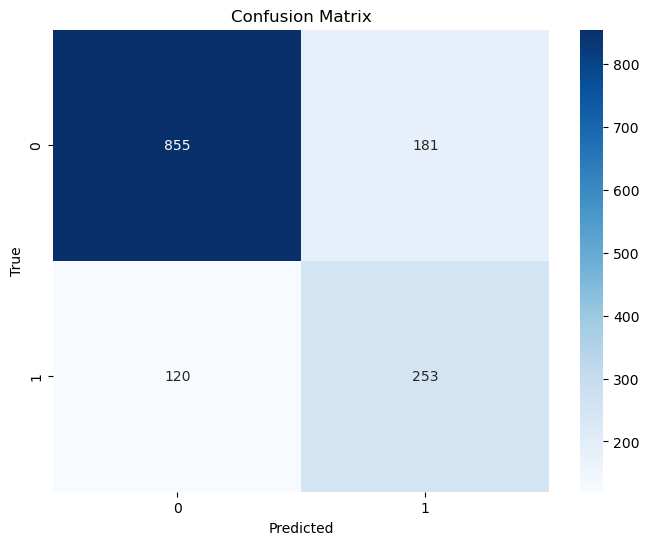

In [72]:
#Graficamos la matriz de confusión

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

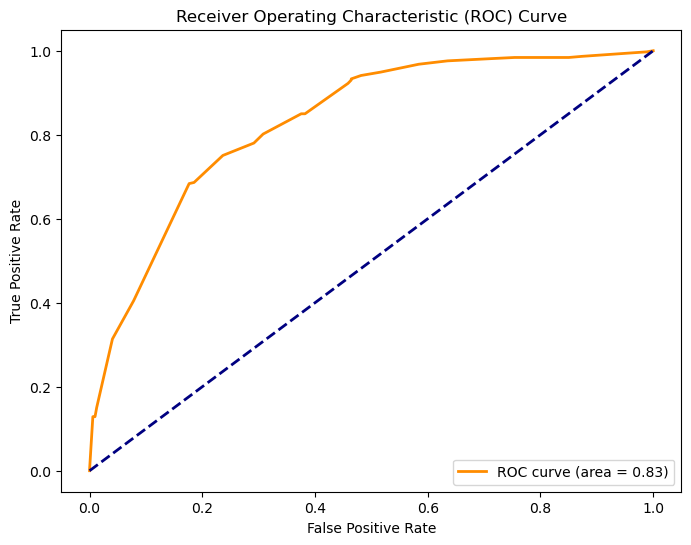

In [73]:
# Calcula las probabilidades de predicción para la clase positiva
y_score = grid_search_dtree.predict_proba(X_test)[:,1]

# Calcula la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, _ = roc_curve(y_test, y_score)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**XGBoost**

In [74]:
#Creamos una PipeLine que preprocese los datos y luego entrene al clasificador

xgb = imbPipeline(steps=[
    ('over', over),
    ('under', under),
    ('classifier', XGBClassifier(eval_metric='logloss',  random_state=7))
])

In [75]:
# Definimos los Hiperparámetros y los valores a testear

param_grid_xgb = {
    'classifier__n_estimators':[200,250,300],
    'classifier__learning_rate':[0.01,0.05,0.1],
    'classifier__max_depth':[4,6,8],
    'classifier__subsample':[0.4,0.6,0.8],
    'classifier__colsample_bytree':[0.5,0.7,0.9],
}

In [76]:
# Create Grid Search object
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)

# Split data into train and test sets
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search_xgb.fit(x_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search_xgb.best_params_)

Best Parameters:  {'classifier__colsample_bytree': 0.5, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 4, 'classifier__n_estimators': 300, 'classifier__subsample': 0.4}


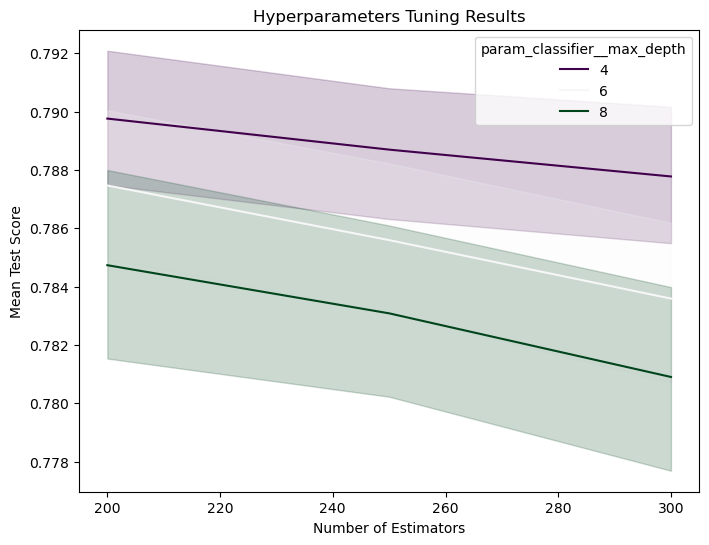

In [77]:
#Transformamos los resultados del GridSearchCV a un Dataframe y los graficamos.

resulst_df = pd.DataFrame(grid_search_xgb.cv_results_)
plt.figure(figsize=(8,6))
sns.lineplot(data=resulst_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='PRGn')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

In [78]:
#Realizamos las predicciones en el conjunto de prueba utilizando el mejor modelo encontrado

y_pred_xgb_balanced = grid_search_xgb.predict(X_test)


#Evaluamos el modelo
print("Model Accuracy: ", accuracy_score(y_test, y_pred_xgb_balanced))
print(classification_report(y_test,y_pred_xgb_balanced))


precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb_balanced)
pr_auc = auc(recall, precision)
print(f"PR-AUC Balanceado: {pr_auc}")

Model Accuracy:  0.8168914123491838
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1036
           1       0.66      0.64      0.65       373

    accuracy                           0.82      1409
   macro avg       0.77      0.76      0.76      1409
weighted avg       0.82      0.82      0.82      1409

PR-AUC Balanceado: 0.6971278919815944


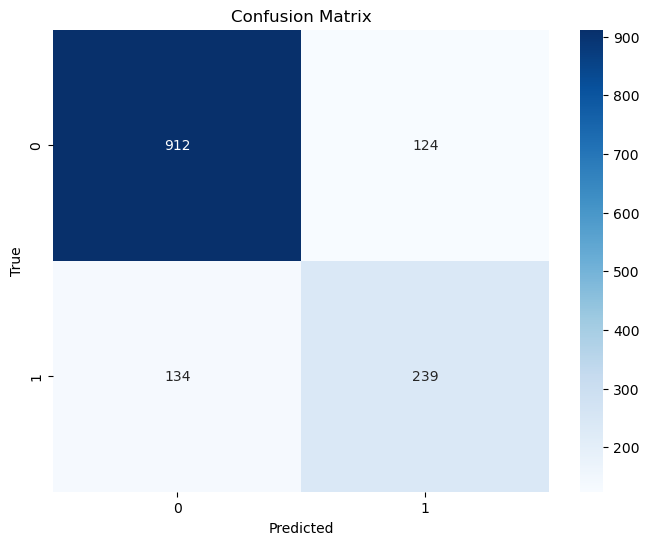

In [79]:
#Graficamos la matriz de confusión

cm = confusion_matrix(y_test,y_pred_xgb_balanced)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

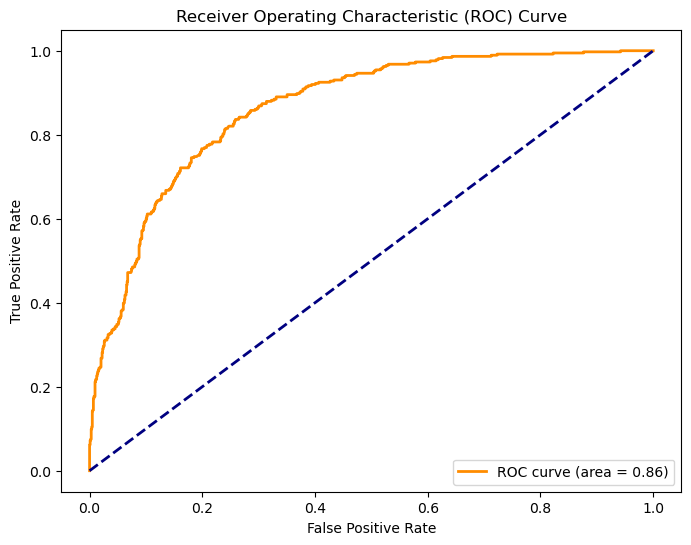

In [80]:
# Calcula las probabilidades de predicción para la clase positiva
y_score_xgb_balanced = grid_search_xgb.predict_proba(X_test)[:,1]

# Calcula la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, _ = roc_curve(y_test, y_score_xgb_balanced)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


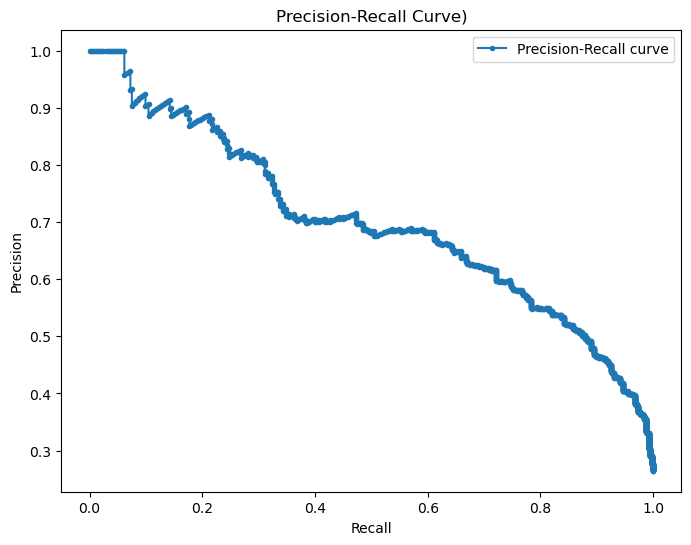

Área bajo la curva Precision-Recall: 0.6980


In [81]:
# Curva Precision-Recall con el mejor cutoff
precision, recall, _ = precision_recall_curve(y_test, y_score_xgb_balanced)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve)')
plt.legend()
plt.show()

# Área bajo la curva Precision-Recall
pr_auc = auc(recall, precision)
print(f"Área bajo la curva Precision-Recall: {pr_auc:.4f}")

In [82]:
from sklearn.metrics import f1_score

# Optimización del cutoff para maximizar el F1-score de la clase 1
best_f1 = 0
best_cutoff = 0.5
cutoffs = np.linspace(0.1, 0.9, 500)

for cutoff in cutoffs:
    y_pred_adjusted_xgb_balanced = (y_score_xgb_balanced >= cutoff).astype(int)
    f1 = f1_score(y_test, y_pred_adjusted_xgb_balanced, pos_label=1)
    if f1 > best_f1:
        best_f1 = f1
        best_cutoff = cutoff

print(f"Mejor cutoff encontrado: {best_cutoff:.2f} con F1-score: {best_f1:.4f}")

Mejor cutoff encontrado: 0.44 con F1-score: 0.6650


              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1036
           1       0.62      0.72      0.67       373

    accuracy                           0.81      1409
   macro avg       0.76      0.78      0.77      1409
weighted avg       0.82      0.81      0.81      1409

PR-AUC Balanceado: 0.7059816576778927


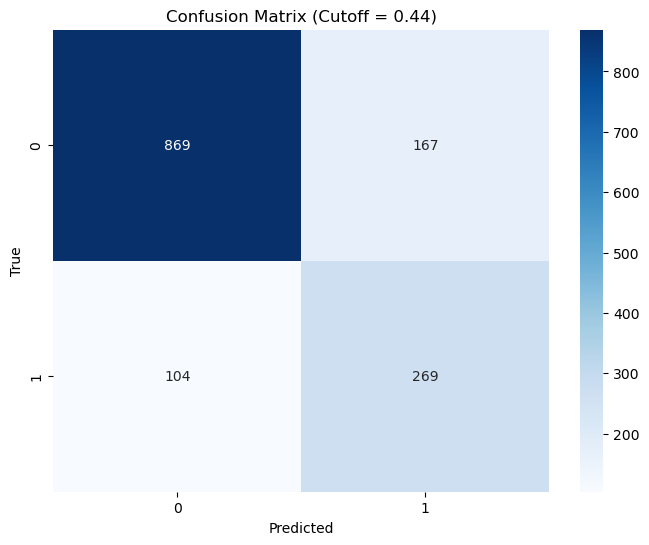

In [83]:
# Predicción final con el mejor cutoff
y_pred_final_xgb_balanced = (y_score_xgb_balanced >= best_cutoff).astype(int)
print(classification_report(y_test, y_pred_final_xgb_balanced))

precision, recall, _ = precision_recall_curve(y_test, y_pred_final_xgb_balanced)
pr_auc = auc(recall, precision)
print(f"PR-AUC Balanceado: {pr_auc}")

# Matriz de confusión con el nuevo cutoff
cm_final = confusion_matrix(y_test, y_pred_final_xgb_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (Cutoff = {best_cutoff:.2f})')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

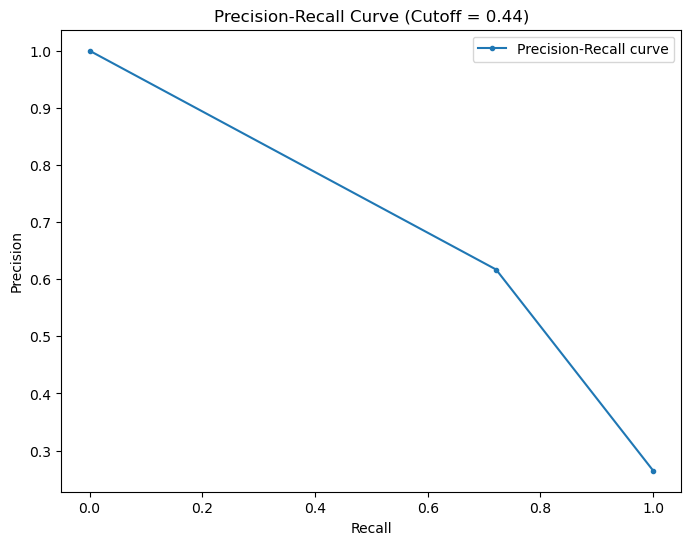

Área bajo la curva Precision-Recall: 0.7060


In [84]:
# Curva Precision-Recall con el mejor cutoff
precision, recall, _ = precision_recall_curve(y_test, y_pred_final_xgb_balanced)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Cutoff = {best_cutoff:.2f})')
plt.legend()
plt.show()

# Área bajo la curva Precision-Recall
pr_auc = auc(recall, precision)
print(f"Área bajo la curva Precision-Recall: {pr_auc:.4f}")


**LightGMB**

In [85]:
#Creamos una PipeLine que preprocese los datos y luego entrene al clasificador

lgmb = imbPipeline(steps=[
    ('over', over),
    ('under', under),
    ('classifier', LGBMClassifier(random_state=42))
])

In [86]:
#Definimos los Hiperparámetros y los valores a testear

param_grid_lgmb = {
    'classifier__n_estimators':[250,300],
    'classifier__learning_rate':[0.01,0.1],
    'classifier__max_depth':[7,8],
    'classifier__subsample':[0.7,0.8],
    'classifier__colsample_bytree':[0.8,0.9],
    'classifier__scale_pos_weight':[1, (y_train == 0).sum() / (y_train == 1).sum()]
}

In [87]:
# Create Grid Search object
grid_search_lgmb = GridSearchCV(lgmb, param_grid_lgmb, cv=5)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search_lgmb.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search_lgmb.best_params_)

Best Parameters:  {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 8, 'classifier__n_estimators': 250, 'classifier__scale_pos_weight': 1, 'classifier__subsample': 0.7}


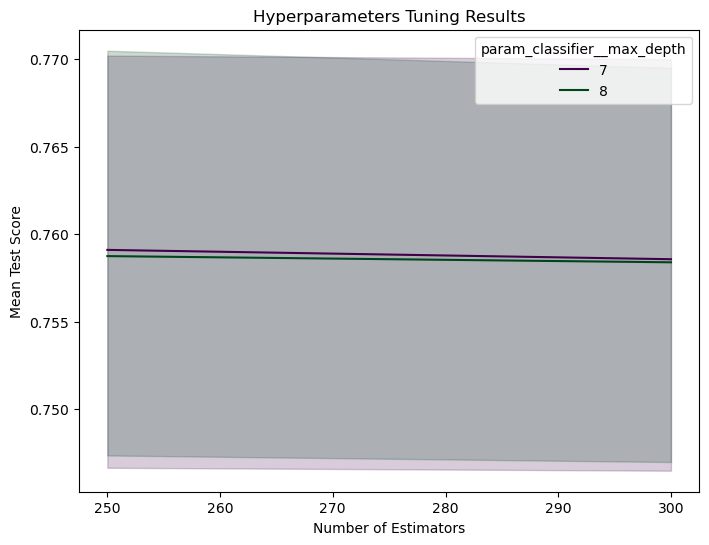

In [88]:
#Transformamos los resultados del GridSearchCV a un Dataframe y los graficamos.

resulst_df = pd.DataFrame(grid_search_lgmb.cv_results_)
plt.figure(figsize=(8,6))
sns.lineplot(data=resulst_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='PRGn')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

In [89]:
#Realizamos las predicciones en el conjunto de prueba utilizando el mejor modelo encontrado

y_pred = grid_search_lgmb.predict(X_test)

#Evaluamos el modelo
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f"PR-AUC Balanceado: {pr_auc}")

Model Accuracy:  0.8112136266855926
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1036
           1       0.65      0.61      0.63       373

    accuracy                           0.81      1409
   macro avg       0.76      0.75      0.75      1409
weighted avg       0.81      0.81      0.81      1409

PR-AUC Balanceado: 0.6831886755919871


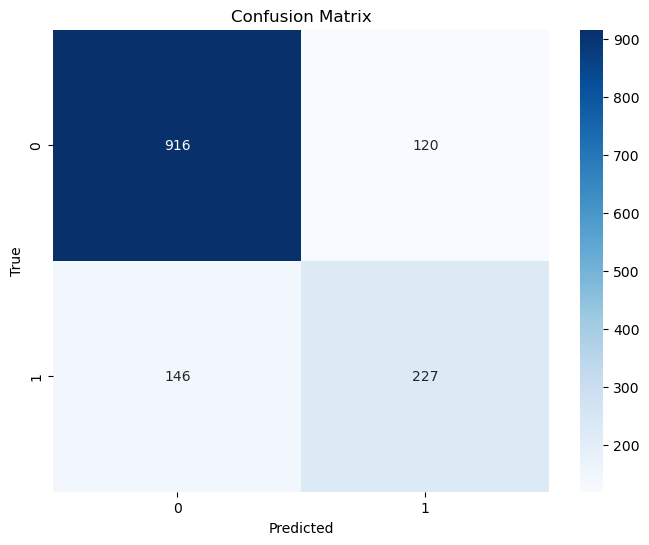

In [90]:
#Graficamos la matriz de confusión

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

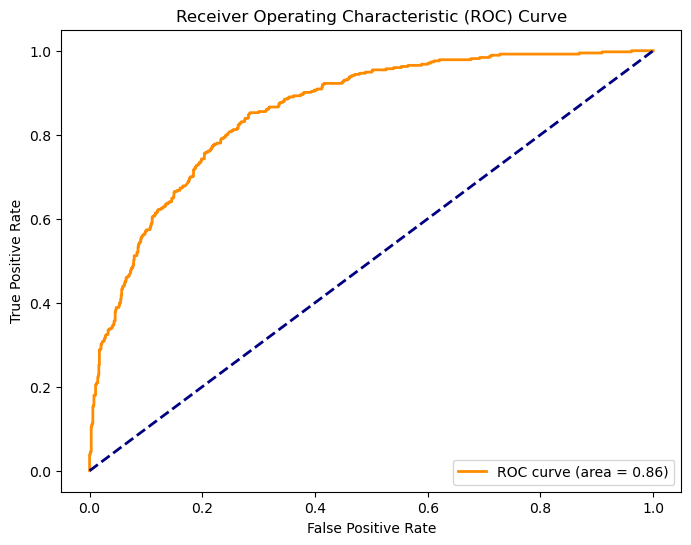

In [91]:
# Calcula las probabilidades de predicción para la clase positiva
y_score = grid_search_lgmb.predict_proba(X_test)[:,1]

# Calcula la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, _ = roc_curve(y_test, y_score)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# <center><div style="font-family: Trebuchet MS; background-color: lightblue; color: white; padding: 12px; line-height: 1;">Resultados de algoritmos</div></center>

<table border="1" cellspacing="0" cellpadding="10" style="width:100%; border-collapse: collapse; font-family: Trebuchet MS;">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th>Modelo</th>
      <th>Accuracy</th>
      <th>Precision (Clase 0)</th>
      <th>Recall (Clase 0)</th>
      <th>F1-score (Clase 0)</th>
      <th>Precision (Clase 1)</th>
      <th>Recall (Clase 1)</th>
      <th>F1-score (Clase 1)</th>
      <th>Macro avg F1</th>
      <th>Weighted avg F1</th>
      <th>ROC AUC</th>
      <th>PR Curve</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Random Forest Balanced</td>
      <td>80.27%</td>
      <td>86%</td>
      <td>87%</td>
      <td>87%</td>
      <td>63%</td>
      <td>61%</td>
      <td>62%</td>
      <td>74%</td>
      <td>80%</td>
      <td>85%</td>
      <td>67.16%</td>
    </tr>
    <tr>
      <td>Decision Tree Balanced</td>
      <td>78.64%</td>
      <td>88%</td>
      <td>83%</td>
      <td>85%</td>
      <td>58%</td>
      <td>68%</td>
      <td>63%</td>
      <td>74%</td>
      <td>79%</td>
      <td>83%</td>
      <td>67.32%</td>
    </tr>
    <tr style="background-color: yellow;">
      <td>XGBoost Balanced</td>
      <td>81.69%</td>
      <td>87%</td>
      <td>88%</td>
      <td>88%</td>
      <td>66%</td>
      <td>64%</td>
      <td>65%</td>
      <td>76%</td>
      <td>82%</td>
      <td>86%</td>
      <td>69.71%</td>
    </tr>
    <tr>
      <td>LightGBM Balanced</td>
      <td>81.12%</td>
      <td>86%</td>
      <td>88%</td>
      <td>87%</td>
      <td>65%</td>
      <td>61%</td>
      <td>63%</td>
      <td>75%</td>
      <td>81%</td>
      <td>86%</td>
      <td>68.32%</td>
    </tr>
  </tbody>
</table>


**Comparacion de modelos balanceado vs no balanceado**

**RANDOM FOREST UNBALANCED**

In [92]:
#Creamos una PipeLine que preprocese los datos y luego entrene al clasificador


clf_unbalanced = imbPipeline(steps=[
                        ('classifier', RandomForestClassifier(random_state=42))
                        ])

In [93]:
# Create Grid Search object
grid_search_clf_unbalanced = GridSearchCV(clf_unbalanced, param_grid_dtree, cv=5)

#Split data into train and test sets
x_train_unbalanced, X_test_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the model
grid_search_clf_unbalanced.fit(x_train_unbalanced, y_train_unbalanced)

# Print the best parameters
print("Best Parameters: ", grid_search_clf_unbalanced.best_params_)

Best Parameters:  {'classifier__criterion': 'gini', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}


In [94]:
#Realizamos las predicciones en el conjunto de prueba utilizando el mejor modelo encontrado

y_pred_unbalanced = grid_search_clf_unbalanced.predict(X_test_unbalanced)

#Evaluamos el modelo
print("Model Accuracy: ", accuracy_score(y_test_unbalanced, y_pred_unbalanced))
print(classification_report(y_test_unbalanced,y_pred_unbalanced))

Model Accuracy:  0.8048261178140526
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.68      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



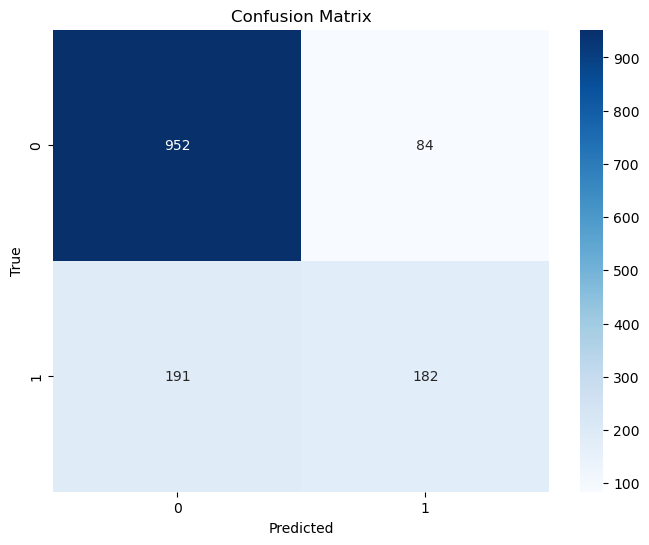

In [95]:
#Graficamos la matriz de confusión

cm = confusion_matrix(y_test_unbalanced,y_pred_unbalanced)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

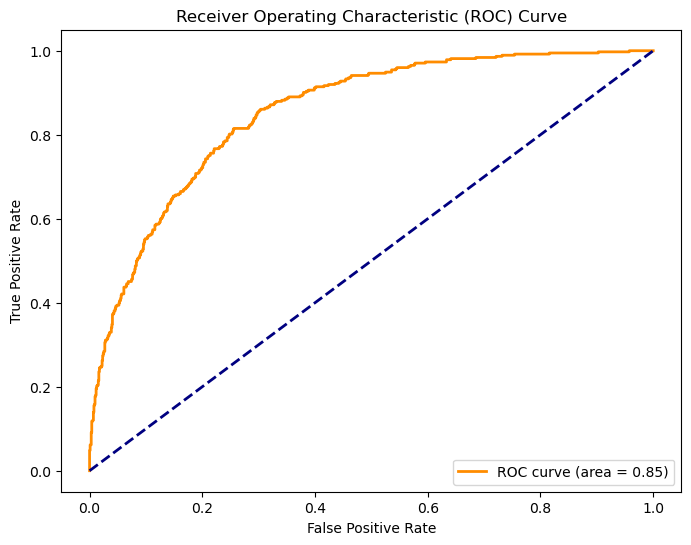

In [96]:
# Calcula las probabilidades de predicción para la clase positiva
y_score_unbalanced = grid_search_clf_unbalanced.predict_proba(X_test_unbalanced)[:,1]

# Calcula la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, _ = roc_curve(y_test_unbalanced, y_score_unbalanced)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**DECISION TREE UNBALANCED**

In [97]:
#Creamos una PipeLine que preprocese los datos y luego entrene al clasificador

dtree_unbalanced = imbPipeline(steps=[
                        ('classifier', DecisionTreeClassifier(random_state=42))
                        ])

In [98]:
#Creamos el objeto GridSearchCV
grid_search_dtree_unbalanced = GridSearchCV(dtree_unbalanced, param_grid_dtree, cv=5)

#Separamos en conjunto de entrenamiento y prueba
x_train_unbalanced, X_test_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenamos el modelo
grid_search_dtree_unbalanced.fit(x_train_unbalanced, y_train_unbalanced)

#Mostramos los mejors hiperparametros
print("Best Parameters: ", grid_search_dtree_unbalanced.best_params_)

Best Parameters:  {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}


In [99]:
#Realizamos las predicciones en el conjunto de prueba utilizando el mejor modelo encontrado

y_pred_unbalanced = grid_search_dtree_unbalanced.predict(X_test_unbalanced)

#Evaluamos el modelo
print("Model Accuracy: ", accuracy_score(y_test_unbalanced, y_pred_unbalanced))
print(classification_report(y_test_unbalanced,y_pred_unbalanced))

Model Accuracy:  0.794889992902768
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.65      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



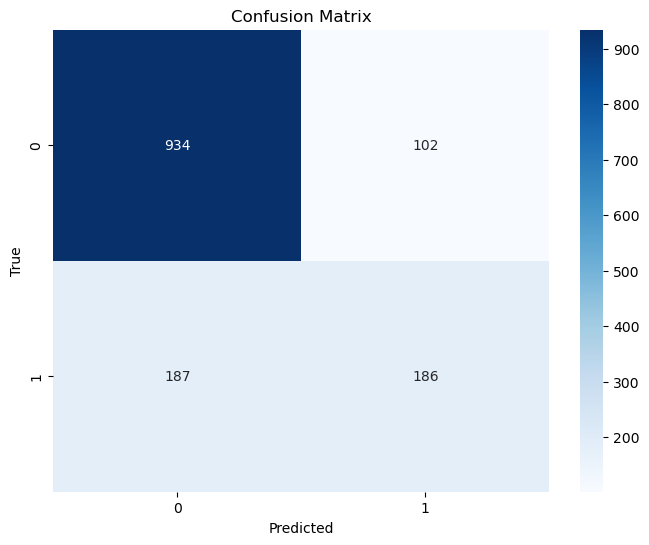

In [100]:
#Graficamos la matriz de confusión

cm = confusion_matrix(y_test_unbalanced,y_pred_unbalanced)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

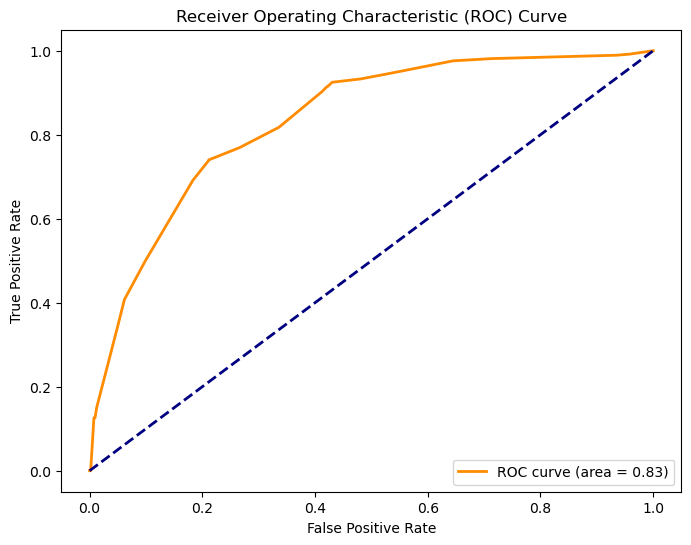

In [101]:
# Calcula las probabilidades de predicción para la clase positiva
y_score_unbalanced = grid_search_dtree_unbalanced.predict_proba(X_test_unbalanced)[:,1]

# Calcula la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, _ = roc_curve(y_test_unbalanced, y_score_unbalanced)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Xgboost Unbalanced**

In [102]:
#Creamos una PipeLine que preprocese los datos y luego entrene al clasificador (modelo sin balanceo de clases)

xgb_unbalanced = imbPipeline(steps=[
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])

In [103]:
#Creamos el objeto GridSearchCV
grid_search_xgb_unbalanced = GridSearchCV(xgb_unbalanced, param_grid_xgb, cv=5)

#Separamos en conjunto de entrenamiento y prueba
x_train_unbalanced, X_test_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenamos el modelo
grid_search_xgb_unbalanced.fit(x_train_unbalanced, y_train_unbalanced)

#Mostramos los mejors hiperparametros
print("Best Parameters: ", grid_search_xgb_unbalanced.best_params_)

Best Parameters:  {'classifier__colsample_bytree': 0.9, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 4, 'classifier__n_estimators': 300, 'classifier__subsample': 0.4}


In [104]:
#Realizamos las predicciones en el conjunto de prueba utilizando el mejor modelo encontrado

y_pred_xgb_unbalanced = grid_search_xgb_unbalanced.predict(X_test_unbalanced)

#Evaluamos el modelo
print("Model Accuracy: ", accuracy_score(y_test_unbalanced, y_pred_xgb_unbalanced))
print(classification_report(y_test_unbalanced,y_pred_xgb_unbalanced))

precision, recall, _ = precision_recall_curve(y_test_unbalanced, y_pred_xgb_unbalanced)
pr_auc = auc(recall, precision)
print(f"PR-AUC Balanceado: {pr_auc}")

Model Accuracy:  0.8112136266855926
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

PR-AUC Balanceado: 0.6678897107778465


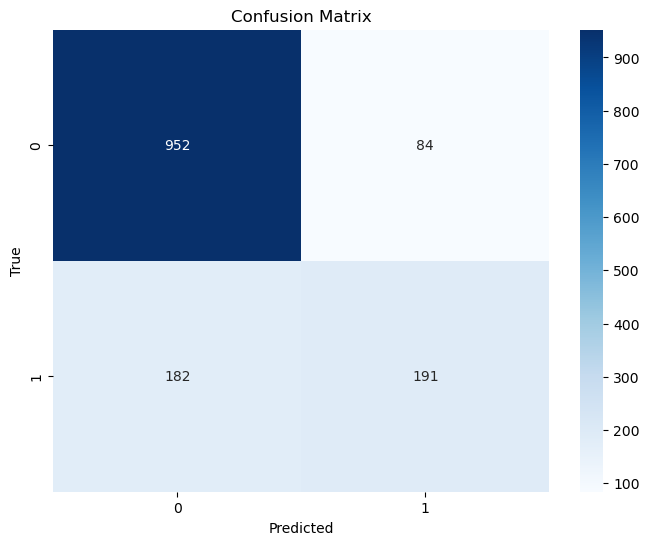

In [105]:
#Graficamos la matriz de confusión

cm = confusion_matrix(y_test_unbalanced,y_pred_xgb_unbalanced)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

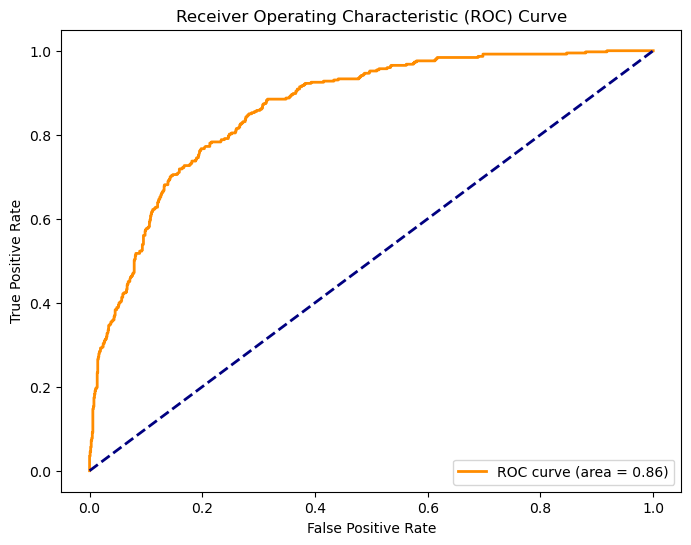

In [106]:
# Calcula las probabilidades de predicción para la clase positiva
y_score_xgb_unbalanced = grid_search_xgb_unbalanced.predict_proba(X_test_unbalanced)[:,1]

# Calcula la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, _ = roc_curve(y_test_unbalanced, y_score_xgb_unbalanced)

# Calcula el área bajo la curva ROC (AUC)
roc_auc_xgb_unbalanced = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb_unbalanced)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

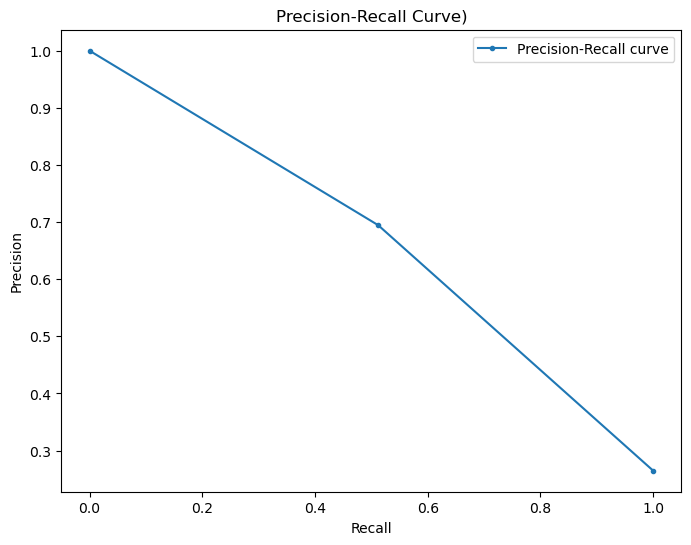

Área bajo la curva Precision-Recall: 0.6679


In [107]:
# Curva Precision-Recall con el mejor cutoff
precision, recall, _ = precision_recall_curve(y_test_unbalanced, y_pred_xgb_unbalanced)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve)')
plt.legend()
plt.show()

# Área bajo la curva Precision-Recall
pr_auc = auc(recall, precision)
print(f"Área bajo la curva Precision-Recall: {pr_auc:.4f}")

In [108]:
# Optimización del cutoff para maximizar el F1-score de la clase 1
best_f1 = 0
best_cutoff = 0.5
cutoffs = np.linspace(0.1, 0.9, 500)

for cutoff in cutoffs:
    y_pred_adjusted_xgb_unbalanced = (y_score_xgb_unbalanced >= cutoff).astype(int)
    f1 = f1_score(y_test, y_pred_adjusted_xgb_unbalanced, pos_label=1)
    if f1 > best_f1:
        best_f1 = f1
        best_cutoff = cutoff

print(f"Mejor cutoff encontrado: {best_cutoff:.2f} con F1-score: {best_f1:.4f}")

Mejor cutoff encontrado: 0.39 con F1-score: 0.6675


              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1036
           1       0.64      0.70      0.67       373

    accuracy                           0.82      1409
   macro avg       0.76      0.78      0.77      1409
weighted avg       0.82      0.82      0.82      1409



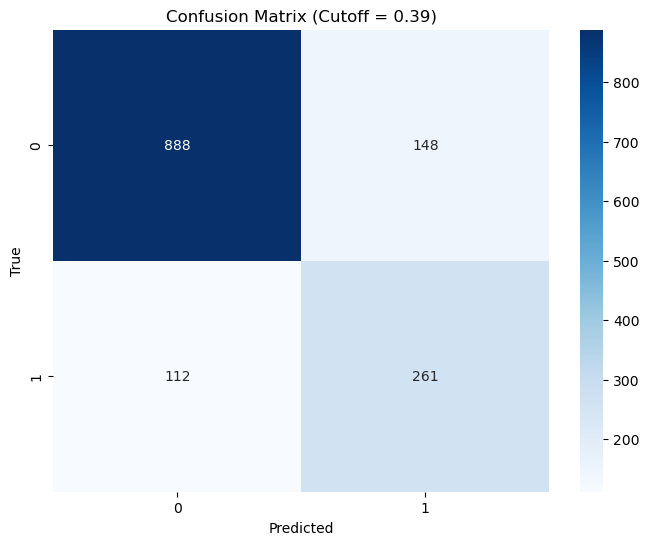

In [109]:
# Predicción final con el mejor cutoff
y_pred_final_xgb_unbalanced = (y_score_xgb_unbalanced >= best_cutoff).astype(int)
print(classification_report(y_test_unbalanced, y_pred_final_xgb_unbalanced))

# Matriz de confusión con el nuevo cutoff
cm_final = confusion_matrix(y_test_unbalanced, y_pred_final_xgb_unbalanced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (Cutoff = {best_cutoff:.2f})')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**LGBM UNBALANCED**

In [110]:
#Creamos una PipeLine que preprocese los datos y luego entrene al clasificador (modelo sin balanceo de clases)

lgmb_unbalanced = imbPipeline(steps=[
    ('classifier', LGBMClassifier(random_state=42))
])

In [111]:
#Creamos el objeto GridSearchCV
grid_search_lgmb_unbalanced = GridSearchCV(lgmb_unbalanced, param_grid_lgmb, cv=5)

#Separamos en conjunto de entrenamiento y prueba
x_train_unbalanced, X_test_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenamos el modelo
grid_search_lgmb_unbalanced.fit(x_train_unbalanced, y_train_unbalanced)

#Mostramos los mejors hiperparametros
print("Best Parameters: ", grid_search_lgmb_unbalanced.best_params_)

Best Parameters:  {'classifier__colsample_bytree': 0.9, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 8, 'classifier__n_estimators': 300, 'classifier__scale_pos_weight': 1, 'classifier__subsample': 0.7}


In [112]:
#Realizamos las predicciones en el conjunto de prueba utilizando el mejor modelo encontrado

y_pred_unbalanced = grid_search_lgmb_unbalanced.predict(X_test_unbalanced)

#Evaluamos el modelo
print("Model Accuracy: ", accuracy_score(y_test_unbalanced, y_pred_unbalanced))
print(classification_report(y_test_unbalanced,y_pred_unbalanced))

Model Accuracy:  0.8076650106458482
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



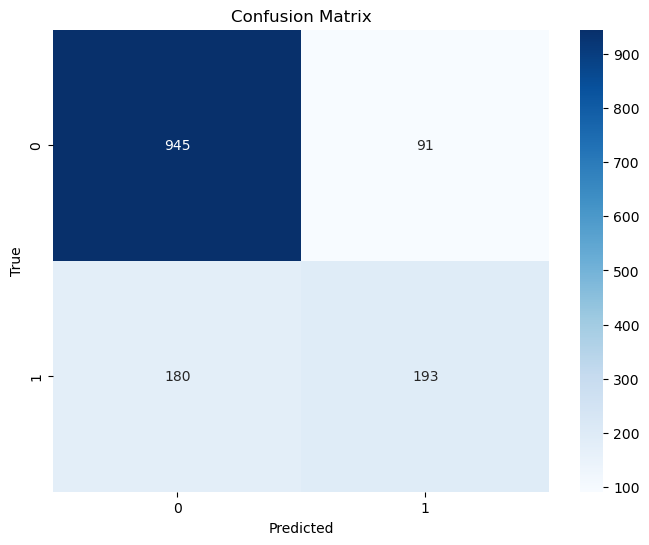

In [113]:
#Graficamos la matriz de confusión

cm = confusion_matrix(y_test_unbalanced,y_pred_unbalanced)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

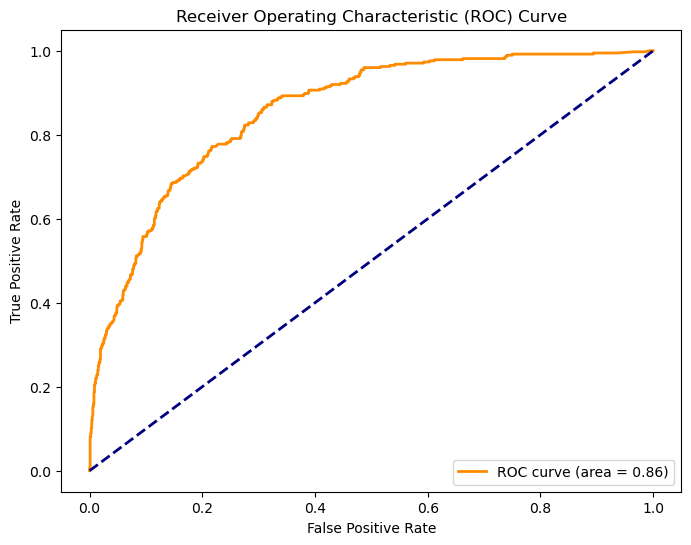

In [114]:
# Calcula las probabilidades de predicción para la clase positiva
y_score_unbalanced = grid_search_lgmb_unbalanced.predict_proba(X_test_unbalanced)[:,1]

# Calcula la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, _ = roc_curve(y_test_unbalanced, y_score_unbalanced)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Resultados de modelos desbalanceados:**

# <center><div style="font-family: Trebuchet MS; background-color: lightblue; color: white; padding: 12px; line-height: 1;">Resultados de algoritmos (Unbalanced)</div></center>

<table border="1" cellspacing="0" cellpadding="10" style="width:100%; border-collapse: collapse; font-family: Trebuchet MS;">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th>Modelo</th>
      <th>Accuracy</th>
      <th>Precision (Clase 0)</th>
      <th>Recall (Clase 0)</th>
      <th>F1-score (Clase 0)</th>
      <th>Precision (Clase 1)</th>
      <th>Recall (Clase 1)</th>
      <th>F1-score (Clase 1)</th>
      <th>Macro avg F1</th>
      <th>Weighted avg F1</th>
      <th>ROC AUC</th>
      <th>PR Curve</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Random Forest Unbalanced</td>
      <td>80.48%</td>
      <td>83%</td>
      <td>92%</td>
      <td>87%</td>
      <td>68%</td>
      <td>49%</td>
      <td>57%</td>
      <td>72%</td>
      <td>79%</td>
      <td>85%</td>
      <td>65.39%</td>
    </tr>
    <tr>
      <td>Decision Tree Unbalanced</td>
      <td>79.49%</td>
      <td>83%</td>
      <td>90%</td>
      <td>87%</td>
      <td>65%</td>
      <td>50%</td>
      <td>56%</td>
      <td>71%</td>
      <td>79%</td>
      <td>83%</td>
      <td>63.86%</td>
    </tr>
    <tr style="background-color: yellow;">
      <td>XGBoost Unbalanced</td>
      <td>81.12%</td>
      <td>84%</td>
      <td>92%</td>
      <td>88%</td>
      <td>69%</td>
      <td>51%</td>
      <td>59%</td>
      <td>73%</td>
      <td>80%</td>
      <td>86%</td>
      <td>66.79%</td>
    </tr>
    <tr>
      <td>LightGBM Unbalanced</td>
      <td>80.77%</td>
      <td>84%</td>
      <td>91%</td>
      <td>87%</td>
      <td>68%</td>
      <td>52%</td>
      <td>59%</td>
      <td>73%</td>
      <td>80%</td>
      <td>86%</td>
      <td>66.24%</td>
    </tr>
  </tbody>
</table>


**Comparacion entre conjunto de entrenamiento antes y despues del balanceo de datos**

Clases en el conjunto desbalanceado (original): Counter({0: 4138, 1: 1496})
Clases en el conjunto balanceado: Counter({0: 4138, 1: 2069})


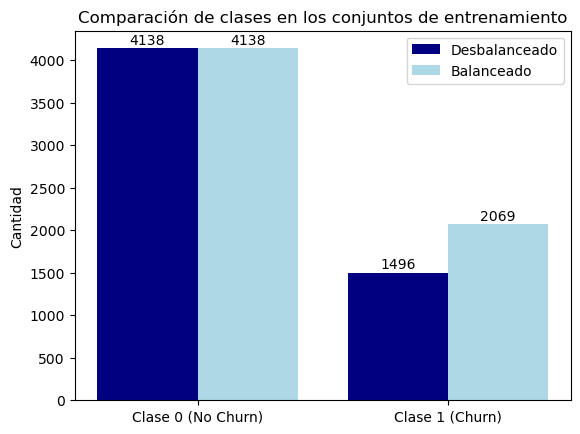

In [115]:
from collections import Counter

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Comparación de clases en el conjunto original
class_counts_original = Counter(y_train)
print("Clases en el conjunto desbalanceado (original):", class_counts_original)

# Obtenemos los datos balanceados utilizando la pipeline
X_balanced, y_balanced = xgb.named_steps['over'].fit_resample(X_train, y_train)
X_balanced, y_balanced = xgb.named_steps['under'].fit_resample(X_balanced, y_balanced)

# Comparación de clases en el conjunto balanceado
class_counts_balanced = Counter(y_balanced)
print("Clases en el conjunto balanceado:", class_counts_balanced)

# Visualización de las clases antes y después del balanceo
labels = ['Clase 0 (No Churn)', 'Clase 1 (Churn)']
counts_original = [class_counts_original[0], class_counts_original[1]]
counts_balanced = [class_counts_balanced[0], class_counts_balanced[1]]

x = range(len(labels))

# Creación de la gráfica de barras
plt.bar(x, counts_original, width=0.4, label='Desbalanceado', align='center', color='navy')
plt.bar([p + 0.4 for p in x], counts_balanced, width=0.4, label='Balanceado', align='center', color='lightblue')

# Etiquetas para los valores
for i, value in enumerate(counts_original):
    plt.text(i, value + 50, str(value), ha='center', color='black', fontsize=10)
for i, value in enumerate(counts_balanced):
    plt.text(i + 0.4, value + 50, str(value), ha='center', color='black', fontsize=10)

# Personalización del gráfico
plt.xticks([p + 0.2 for p in x], labels)
plt.ylabel('Cantidad')
plt.title('Comparación de clases en los conjuntos de entrenamiento')
plt.legend()
plt.show()


# <center><div style="font-family: Trebuchet MS; background-color: lightblue; color: white; padding: 12px; line-height: 1;">Comparación de algoritmos XGBoost (Balanceado vs No Balanceado)</div></center>

<table border="1" cellspacing="0" cellpadding="5" style="width:100%; border-collapse: collapse; font-family: Trebuchet MS;">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th>Modelo</th>
      <th>Algoritmo</th>
      <th>Accuracy</th>
      <th>Precision (Clase 0)</th>
      <th>Recall (Clase 0)</th>
      <th>F1-score (Clase 0)</th>
      <th>Precision (Clase 1)</th>
      <th>Recall (Clase 1)</th>
      <th>F1-score (Clase 1)</th>
      <th>Macro avg F1</th>
      <th>Weighted avg F1</th>
      <th>ROC AUC</th>
      <th>PR Curve</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: yellow;">
      <td>Balanceado</td>
      <td>XGBoost</td>
      <td>81.69%</td>
      <td>87%</td>
      <td>88%</td>
      <td>88%</td>
      <td>66%</td>
      <td>64%</td>
      <td>65%</td>
      <td>76%</td>
      <td>82%</td>
      <td>86%</td>
      <td>69.71%</td>
    </tr>
    <tr>
      <td>No Balanceado</td>
      <td>XGBoost</td>
      <td>81.12%</td>
      <td>84%</td>
      <td>92%</td>
      <td>88%</td>
      <td>69%</td>
      <td>51%</td>
      <td>59%</td>
      <td>73%</td>
      <td>80%</td>
      <td>86%</td>
      <td>66.79%</td>
    </tr>
  </tbody>
</table>


# <center><div style="font-family: Trebuchet MS; background-color: lightblue; color: white; padding: 12px; line-height: 1;">Comparación Final de Algoritmos (Balanceados vs No Balanceados)</div></center>

<table border="1" cellspacing="0" cellpadding="5" style="width:100%; border-collapse: collapse; font-family: Trebuchet MS;">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th>Modelo</th>
      <th>Algoritmo</th>
      <th>Entrenamiento</th>
      <th>Accuracy</th>
      <th>Precision (Clase 0)</th>
      <th>Recall (Clase 0)</th>
      <th>F1-score (Clase 0)</th>
      <th>Precision (Clase 1)</th>
      <th>Recall (Clase 1)</th>
      <th>F1-score (Clase 1)</th>
      <th>Macro avg F1</th>
      <th>Weighted avg F1</th>
      <th>ROC AUC</th>
      <th>PR Curve</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>Random Forest</td>
      <td>Balanceado</td>
      <td>80.27%</td>
      <td>86%</td>
      <td>87%</td>
      <td>87%</td>
      <td>63%</td>
      <td>61%</td>
      <td>62%</td>
      <td>74%</td>
      <td>80%</td>
      <td>85%</td>
      <td>67.16%</td>
    </tr>
    <tr>
      <td>2</td>
      <td>Decision Tree</td>
      <td>Balanceado</td>
      <td>78.64%</td>
      <td>88%</td>
      <td>83%</td>
      <td>85%</td>
      <td>58%</td>
      <td>68%</td>
      <td>63%</td>
      <td>74%</td>
      <td>79%</td>
      <td>83%</td>
      <td>67.32%</td>
    </tr>
    <tr style="background-color: yellow;">
      <td>3</td>
      <td>XGBoost</td>
      <td>Balanceado</td>
      <td>81.69%</td>
      <td>87%</td>
      <td>88%</td>
      <td>88%</td>
      <td>66%</td>
      <td>64%</td>
      <td>65%</td>
      <td>76%</td>
      <td>82%</td>
      <td>86%</td>
      <td>69.71%</td>
    </tr>
    <tr>
      <td>4</td>
      <td>LightGBM</td>
      <td>Balanceado</td>
      <td>81.12%</td>
      <td>86%</td>
      <td>88%</td>
      <td>87%</td>
      <td>65%</td>
      <td>61%</td>
      <td>63%</td>
      <td>75%</td>
      <td>81%</td>
      <td>86%</td>
      <td>68.32%</td>
    </tr>
    <tr>
      <td>5</td>
      <td>Random Forest</td>
      <td>No Balanceado</td>
      <td>80.48%</td>
      <td>83%</td>
      <td>92%</td>
      <td>87%</td>
      <td>68%</td>
      <td>49%</td>
      <td>57%</td>
      <td>72%</td>
      <td>79%</td>
      <td>85%</td>
      <td>65.39%</td>
    </tr>
    <tr>
      <td>6</td>
      <td>Decision Tree</td>
      <td>No Balanceado</td>
      <td>79.49%</td>
      <td>83%</td>
      <td>90%</td>
      <td>87%</td>
      <td>65%</td>
      <td>50%</td>
      <td>56%</td>
      <td>71%</td>
      <td>79%</td>
      <td>83%</td>
      <td>63.86%</td>
    </tr>
    <tr style="background-color: yellow;">
      <td>7</td>
      <td>XGBoost</td>
      <td>No Balanceado</td>
      <td>81.12%</td>
      <td>84%</td>
      <td>92%</td>
      <td>88%</td>
      <td>69%</td>
      <td>51%</td>
      <td>59%</td>
      <td>73%</td>
      <td>80%</td>
      <td>86%</td>
      <td>66.79%</td>
    </tr>
    <tr>
      <td>8</td>
      <td>LightGBM</td>
      <td>No Balanceado</td>
      <td>80.77%</td>
      <td>84%</td>
      <td>91%</td>
      <td>87%</td>
      <td>68%</td>
      <td>52%</td>
      <td>59%</td>
      <td>73%</td>
      <td>80%</td>
      <td>86%</td>
      <td>66.24%</td>
    </tr>
  </tbody>
</table>


**Importancia de variables de algoritmo final (Xgboost balanceado)**

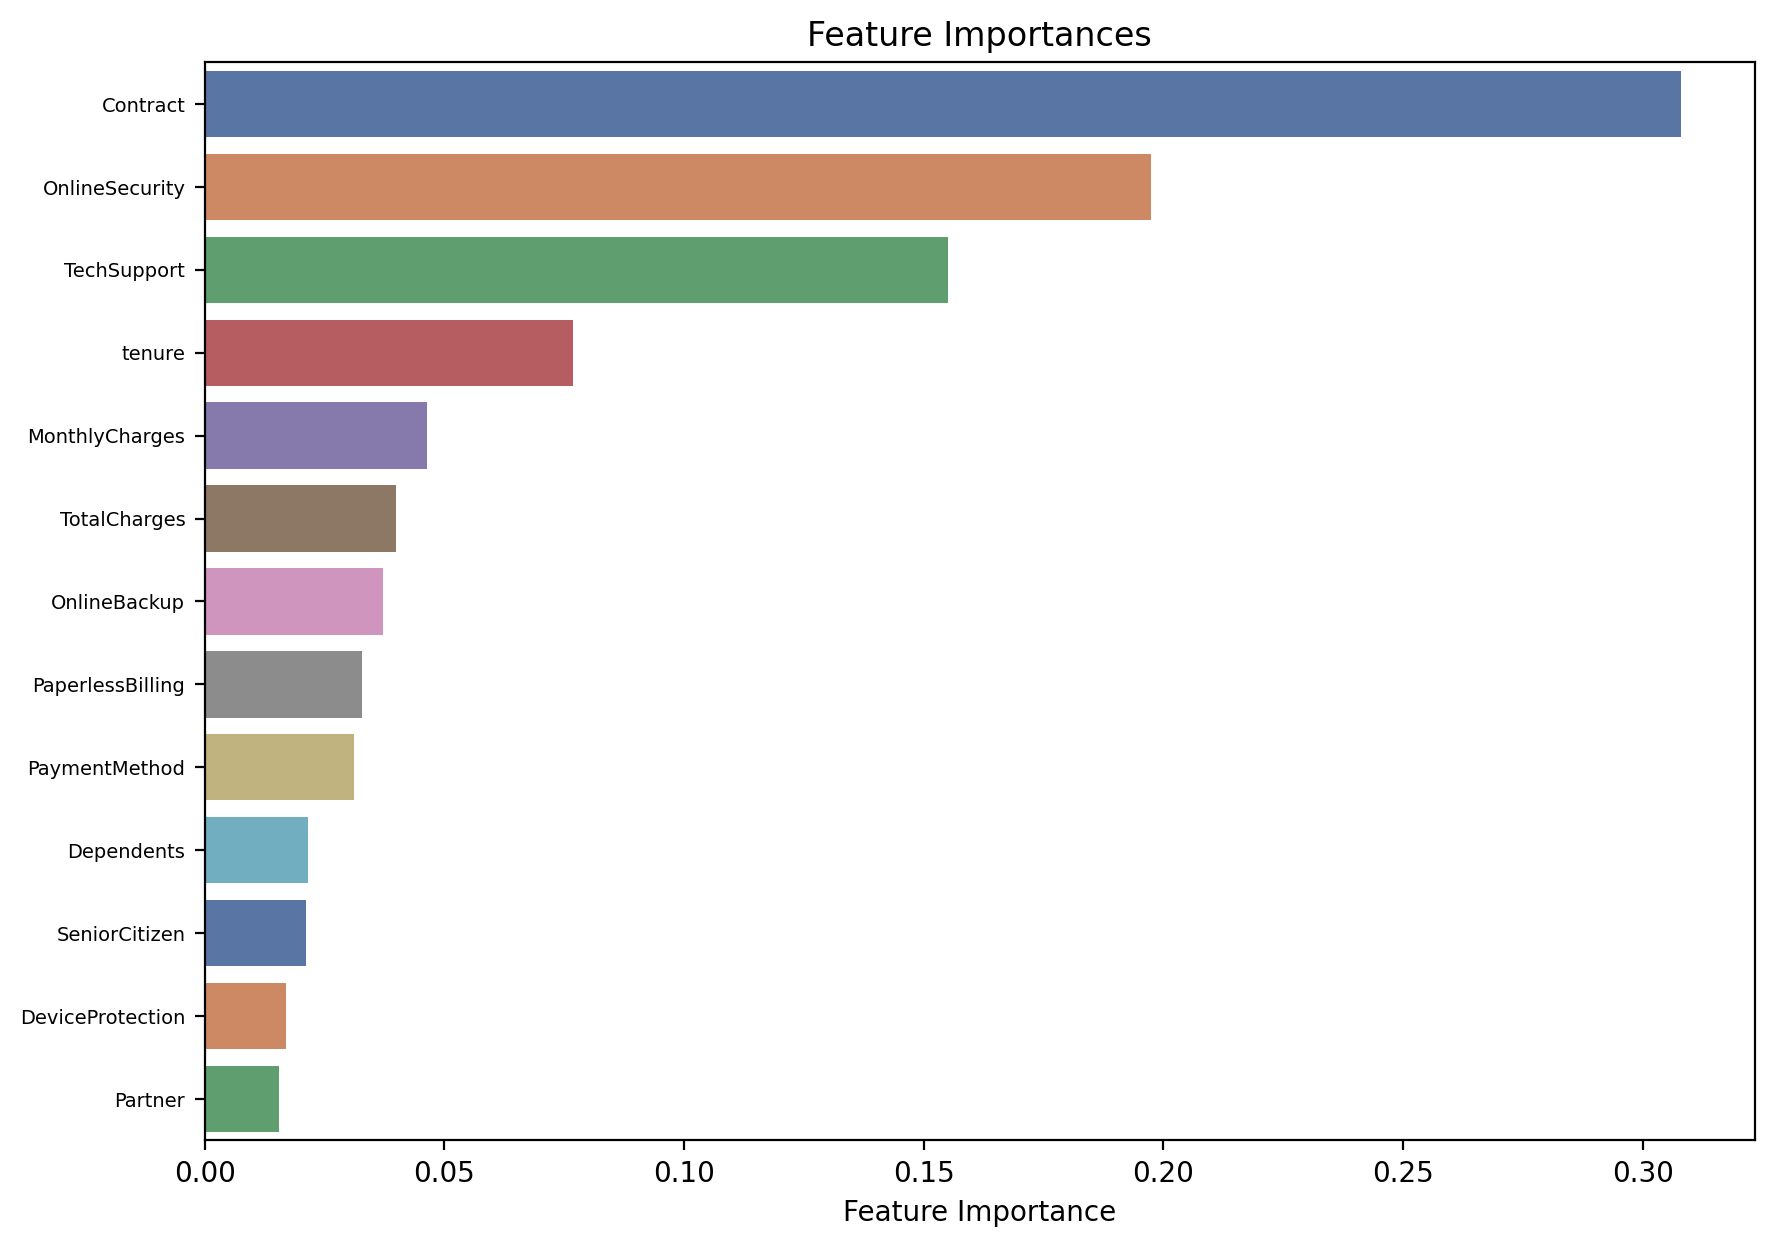

Lista de Variables y su Importancia:
Contract: 0.31
OnlineSecurity: 0.20
TechSupport: 0.16
tenure: 0.08
MonthlyCharges: 0.05
TotalCharges: 0.04
OnlineBackup: 0.04
PaperlessBilling: 0.03
PaymentMethod: 0.03
Dependents: 0.02
SeniorCitizen: 0.02
DeviceProtection: 0.02
Partner: 0.02


In [116]:
# Extraemos el mejor modelo después de GridSearchCV
best_xgb_model = grid_search_xgb.best_estimator_.named_steps['classifier']

# Calculamos la importancia de variables
feature_importances = best_xgb_model.feature_importances_

# Ordenamos las características por su importancia
sorted_indices = np.argsort(feature_importances)[::-1]

# Graficamos la importancia de las variables
plt.figure(figsize=(10, 7), dpi=200)
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices], palette='deep')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.yticks(fontsize=7)
plt.show()

# Imprimimos la lista con la variable y el valor de su importancia
print("Lista de Variables y su Importancia:")
for i in sorted_indices:
    print(f"{X.columns[i]}: {feature_importances[i]:.2f}")

**Interpretación de la Importancia de las Variables en el Modelo de Churn**

El análisis de la importancia de las variables en el modelo XGBoost revela cómo cada característica influye en la predicción del churn. A continuación se detalla la interpretación de cada variable en función de su importancia:

**1. Contract (0.31)**
La variable Contract es la más significativa en el modelo, representando el 31% de la importancia total. Esto indica que el tipo de contrato (por ejemplo, mensual o anual) tiene un impacto crucial en la probabilidad de churn, ya que los clientes con contratos de corto plazo pueden presentar una mayor tendencia a cancelar el servicio.

**2. OnlineSecurity (0.20)**
La característica OnlineSecurity es la segunda más importante, con un 20% de la importancia. Esto sugiere que el acceso a servicios de seguridad en línea juega un papel vital en la retención de clientes, pues una mayor seguridad puede disminuir la probabilidad de churn al aumentar la percepción de valor del servicio.

**3. TechSupport (0.16)**
Con un 16% de importancia, TechSupport demuestra ser un factor relevante para la retención de clientes. Un soporte técnico adecuado puede generar mayor satisfacción y, por ende, reducir la tendencia a cancelar el servicio.

**4. tenure (0.08)**
La variable tenure, que mide** la antigüedad de los clientes, aporta un 8% a la importancia total. Esto implica que el tiempo que un cliente lleva con la compañía influye en su fidelidad, ya que una mayor experiencia y conocimiento del servicio pueden traducirse en una menor probabilidad de churn.

**5. MonthlyCharges (0.05)**
MonthlyCharges, o los cargos mensuales, contribuyen con un 5% de la importancia. Este factor sugiere que el costo recurrente puede impactar la decisión de churn, especialmente si los clientes perciben que el precio no se corresponde con el valor ofrecido.

**6. TotalCharges (0.04)**
La variable TotalCharges representa un 4% de la importancia total, indicando que el monto total abonado por el cliente puede estar relacionado con la percepción global de valor del servicio, afectando la decisión de permanecer o cancelar.

**7. OnlineBackup (0.04)**
Con un 4% de importancia, OnlineBackup sugiere que la disponibilidad de servicios de respaldo en línea tiene un efecto moderado en la retención. La posibilidad de proteger la información puede agregar valor al servicio, incentivando la continuidad.

**8. PaperlessBilling (0.03)**
PaperlessBilling aporta un 3% de importancia, lo que puede indicar que la modalidad de facturación digital, en comparación con la tradicional, influye de manera leve en el comportamiento de churn de los clientes.

**9. PaymentMethod (0.03)**
La variable PaymentMethod, con un 3% de importancia, resalta que la forma en que los clientes realizan sus pagos también incide en la retención. Algunos métodos de pago pueden percibirse como más convenientes o seguros, favoreciendo la permanencia.

**10. Dependents (0.02)**
Dependents muestra un 2% de importancia. Los clientes con dependientes podrían valorar una mayor estabilidad en el servicio, lo que puede reducir su propensión a cancelar.

**11. SeniorCitizen (0.02)**
Con un 2% de importancia, SeniorCitizen sugiere que la condición de ser adulto mayor tiene una influencia leve en la probabilidad de churn, posiblemente debido a preferencias o necesidades específicas de este grupo.

**12. DeviceProtection (0.02)**
DeviceProtection aporta un 2% a la importancia total. Aunque su efecto es marginal, la protección de dispositivos puede sumar valor a la oferta del servicio y contribuir a la retención de clientes.

**13. Partner (0.02)**
Finalmente, Partner contribuye con un 2% de importancia, lo que puede estar relacionado con la estabilidad familiar. Los clientes con pareja podrían valorar la continuidad del servicio como parte de una mayor estabilidad en su vida.

**Resumen:**
Este análisis destaca que las variables relacionadas con el contrato, la seguridad en línea y el soporte técnico son las más determinantes en la predicción del churn. Aunque factores como los cargos mensuales o la protección de dispositivos tienen menor influencia de manera individual, en conjunto proporcionan una visión integral que es clave para diseñar estrategias de retención efectivas.